# Projet 4 - Analysez les ventes de votre entreprise

# Partie II - Analyse des données

Nous allons étudier les ventes de livres en ligne de la société.

Pour se faire nous allons tout d'abord nettoyer les données provenant de la base de donnée, ensuite les analyser pour en tirer les informations pertinentes, et enfin vérifier les corrélations suivantes :

* Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
* Y a-t-il une corrélation entre l'âge des clients et :
    * Le montant total des achats ;
    * La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
    * La taille du panier moyen (en nombre d’articles) ;
    * Les catégories de produits achetés.

## Table des matières

1. __Importation des données__
   
   
2. __Visualisations des données__
    
    1. Colonne birth, age, cat_age et sexe
    2. Colonne price, cat_price et categ
    3. Colonne date, weekday, daytime, month, week, year
    4. Colonne session_amount, session_nb_produit et session_categ
    5. Conclusion
    

3. __Analyses des données__
    
    1. Produits les plus vendus
    2. Les meilleurs clients



## 1. Importation des données

Dans un premier temps, nous allons importer les données

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import P4_03_OCR4 as OCR
%matplotlib inline

sns.set(color_codes = True)
#sns.set(style="whitegrid")

In [2]:
_FONTSIZE_ = 18
_FONTSIZETITLE_ = 24

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}


In [3]:
df_transactions = pd.read_csv('./Export/transactions.csv', parse_dates=[1])
df_transactions_w_october = pd.read_csv('./Export/transactions_w_october.csv', parse_dates=[1])
products = pd.read_csv('./Dataset/products.csv')

Nous allons, maintenant, regarder les dataFrames pour remarquer les valeurs manquantes

## 2. Visualisations des données

Nous allons visualiser les données de chaque colonnes pour avoir une vue global du comportements des acheteurs et du DataSet

In [4]:
df_transactions.describe()

birth          price          categ            age  \
count  310090.000000  310090.000000  310090.000000  310090.000000   
mean     1977.759247      17.430726       0.449476      43.430591   
std        13.624012      17.936220       0.593811      13.631829   
min      1929.000000       0.620000       0.000000      17.000000   
25%      1970.000000       8.990000       0.000000      34.000000   
50%      1980.000000      13.990000       0.000000      42.000000   
75%      1987.000000      19.080000       1.000000      51.000000   
max      2004.000000     300.000000       2.000000      93.000000   

             cat_age      cat_age_2      cat_price        weekday  \
count  310090.000000  310090.000000  310090.000000  310090.000000   
mean        2.010961       2.134013       2.109887       2.995047   
std         0.493180       0.626449       0.557688       2.003414   
min         1.000000       1.000000       1.000000       0.000000   
25%         2.000000       2.000000       2.000000       1.000000   
50%         2.000000       2.000000       2.000000       3.000000   
75%         2.000000       3.000000       2.000000       5.000000   
max         3.000000       3.000000       3.000000       6.000000   

             daytime          month  ...     categ_mean  freq_achat_mean  \
count  310090.000000  310090.000000  ...  310090.000000    310090.000000   
mean       11.514338       6.196388  ...       0.486673        22.357736   
std         6.919547       3.522366  ...       0.358607        81.936318   
min         0.000000       1.000000  ...       0.000000         0.083333   
25%         6.000000       3.000000  ...       0.267979         1.250000   
50%        12.000000       6.000000  ...       0.357143         2.333333   
75%        18.000000       9.000000  ...       0.581395         3.750000   
max        23.000000      12.000000  ...       2.000000       414.833333   

       freq_achat_mean_rounded  norm_prix/livre      bookstore  \
count            310090.000000    310090.000000  310090.000000   
mean                 22.368254        17.430726       0.184201   
std                  81.961661        10.058051       0.387649   
min                   0.000000         4.150000       0.000000   
25%                   1.000000        12.769514       0.000000   
50%                   2.000000        13.881429       0.000000   
75%                   4.000000        16.743333       0.000000   
max                 415.000000       181.990000       1.000000   

       book_total_sold  book_rank_sold  book_total_price  book_rank_price  \
count    310090.000000   310090.000000     310090.000000    310090.000000   
mean        339.979574      498.497901       5777.280882       596.334471   
std         243.130989      529.933097       5950.693901       584.096596   
min           1.000000        1.000000          0.990000         1.000000   
25%         143.000000      122.500000       1509.480000       167.000000   
50%         307.000000      322.500000       3597.600000       416.000000   
75%         480.000000      688.000000       8170.890000       833.000000   
max        1060.000000     3221.500000      31873.380000      3257.500000   

       norm_categ_cat_age  
count       310090.000000  
mean             0.290238  
std              1.143686  
min              0.061403  
25%              0.061403  
50%              0.061403  
75%              0.141651  
max             30.674847  

[8 rows x 34 columns]

### A. Colonne *birth*, *age*, *cat-age* et *sexe*

#### DataFrame avec tous les clients

Nous allons commencer par les colonnes *birth* et *age*. Nous avons l'age maximum à 93 ans et minimum à 17 ans, soit 76 ans. Pour *birth*, nous avons de 1929 à 2004, soit 75 ans. La différence entre *birth* et *age*, *birth* ne change pas pour un client donné, alors que *age* dépends de la date d'achat.

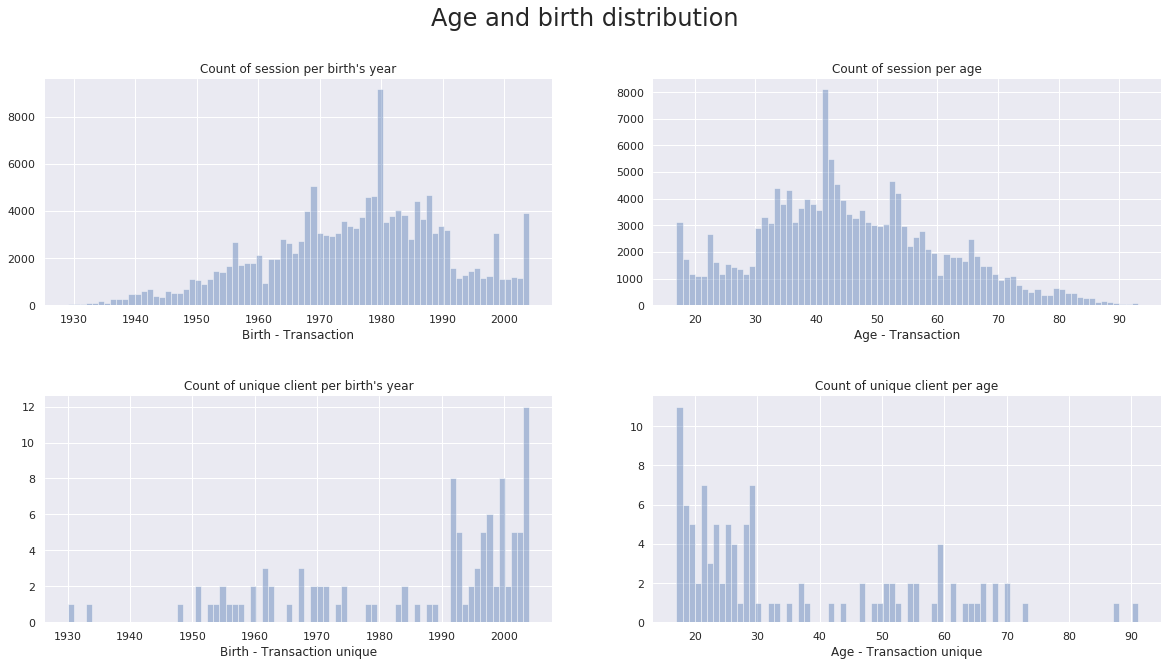

In [5]:
df_trans_drop_session = df_transactions.drop_duplicates('session_id')
df_trans_drop_client_unique = df_trans_drop_session[df_trans_drop_session['nombre_achat_client']  == 1]

fig, axes = plt.subplots(2, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(df_trans_drop_session['birth'], axlabel='Birth - Transaction', kde=False, bins=76, ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot(df_trans_drop_session['age'], axlabel='Age - Transaction', kde=False, bins=76, ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique['birth'], axlabel='Birth - Transaction unique', kde=False, bins=76, ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique['age'], axlabel='Age - Transaction unique', kde=False, bins=76, ax=axes[1, 1]))

ax1.title.set_text('Count of session per birth\'s year')
ax2.title.set_text('Count of session per age')
ax3.title.set_text('Count of unique client per birth\'s year')
ax4.title.set_text('Count of unique client per age')

fig.suptitle("Age and birth distribution", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)
plt.savefig('pictures/age_distribution.png')

plt.show()

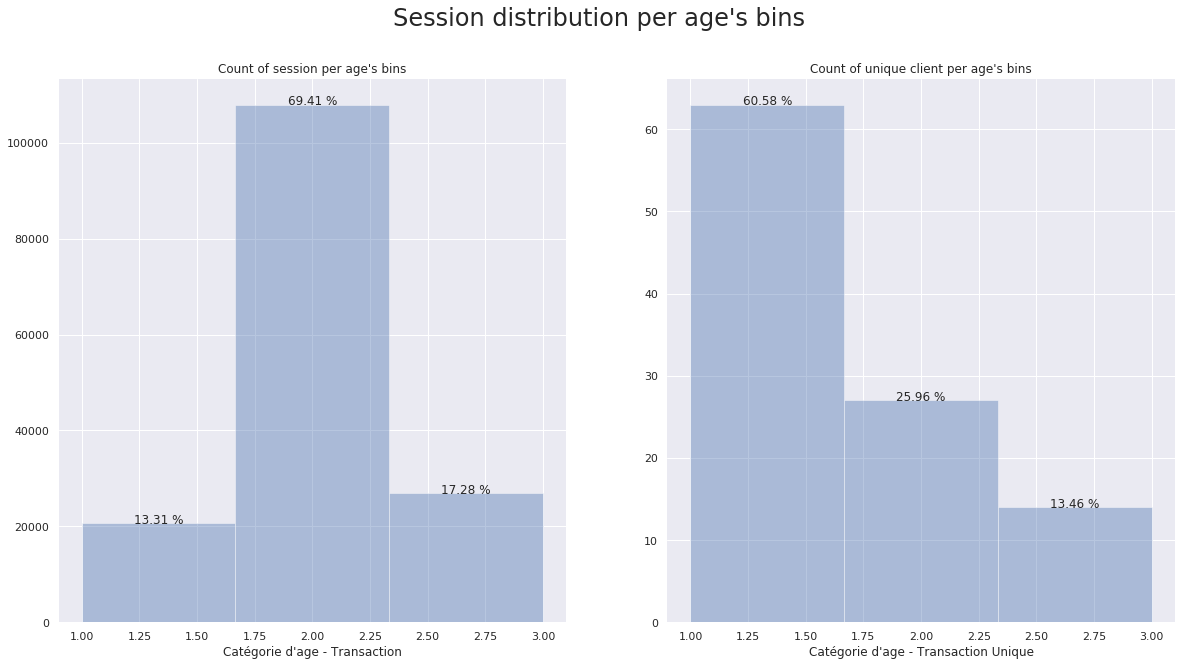

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(df_trans_drop_session['cat_age'], axlabel='Catégorie d\'age - Transaction', kde=False, bins=3, ax=axes[0]))
ax2 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique['cat_age'], axlabel='Catégorie d\'age - Transaction Unique', kde=False, bins=3, ax=axes[1]))

ax1.title.set_text('Count of session per age\'s bins')
ax2.title.set_text('Count of unique client per age\'s bins')

total = float(len(df_trans_drop_session))

ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique))
    
ax2 = OCR.plt_pourcentage(ax2, total)

fig.suptitle("Session distribution per age's bins", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.savefig('pictures/cat_age.png')

Nous remarquons deux choses, premièrement, il a un nombre très important d'achat pour l'age de 41 ans (1980), qui n'existait pas dans la table *customers*. Deuxièmenent, nous remarquons toujours la présence d'un pic pour les personnes nées en 2004. 

Ce pic peut être le signe d'un très bon client. Nous allons vérifier cela.

Nous remarquons, que le nombre de sessions uniques est très important 

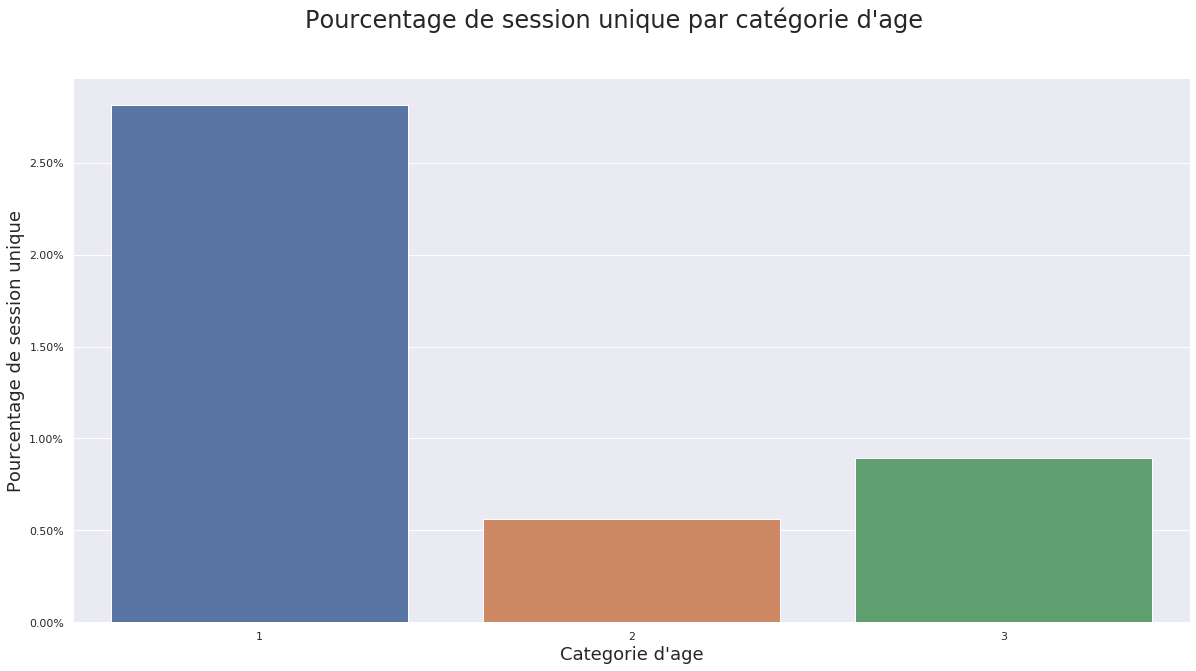

In [7]:
df = df_trans_drop_client_unique.groupby('cat_age')['client_id'].count() / df_transactions.drop_duplicates('client_id').groupby('cat_age')['client_id'].count()

fig, axes = plt.subplots(1, 1, figsize = (20, 10))
ax1 = sns.barplot(x=df.index, y=df.values) 

plt.ylabel("Pourcentage de session unique",fontsize = _FONTSIZE_)
plt.xlabel("Categorie d'age",fontsize = _FONTSIZE_)

axes.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig.suptitle("Pourcentage de session unique par catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.despine(left=True, bottom=True)

Nous voyons que les clients de moins de 30 ans sont ceux qui reviennent moins sur le site, mais dans des proportions très faible.

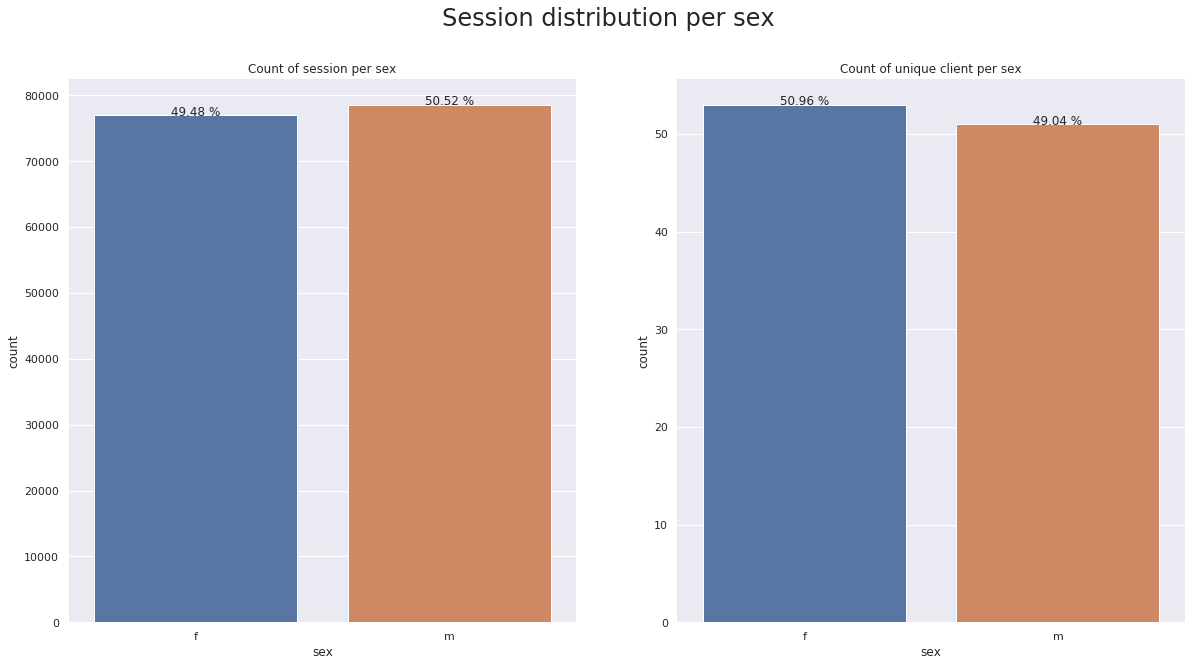

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = sns.countplot(df_trans_drop_session['sex'], ax=axes[0])
ax2 = sns.countplot(df_trans_drop_client_unique['sex'], ax=axes[1])

ax1.title.set_text('Count of session per sex')
ax2.title.set_text('Count of unique client per sex')

fig.suptitle("Session distribution per sex", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)

total = float(len(df_trans_drop_session))
   
ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique))
    
ax2 = OCR.plt_pourcentage(ax2, total)

Nous voyons qu'il y a autant d'homme que de femme qui achete sur le site.

In [9]:
df_transactions[['client_id', 'birth', 'sex', 'nombre_livre_client', 'montant_total', 'norm_prix/livre', 'bookstore']].drop_duplicates(['client_id']).nlargest(10, 'nombre_livre_client')

client_id  birth sex  nombre_livre_client  montant_total  \
3       c_1609   1980   m                11641      148351.06   
33      c_6714   1968   f                 4116       68427.43   
37      c_3454   1969   m                 3095       52016.33   
527     c_4958   1999   m                 2433      135919.10   
1098    c_8026   1978   m                  183        2424.50   
2273    c_7421   1978   m                  178        2406.17   
3095    c_5922   1977   m                  177        2216.32   
3821    c_3263   1985   f                  177        2346.34   
41      c_2595   1974   m                  176        2191.58   
2301     c_760   1980   m                  176        2311.71   

      norm_prix/livre  bookstore  
3           12.743842          1  
33          16.624740          1  
37          16.806569          1  
527         55.864817          1  
1098        13.248634          1  
2273        13.517809          1  
3095        12.521582          0  
3821        13.256158          1  
41          12.452159          1  
2301        13.134716          1

Nous voyons qu'il existe de très bons clients, et cela explique les grandes valeurs obtenues 41 et 42 ans avec le client c_1609, 52 et 53 ans avec les clients c_6714 et c_3454 et 22 ans avec le client c_4958.


De plus, ces 4 clients ont les plus hauts montants de livres achetés. En faisant les tests de corrélation, il serait utile d'écarter ces clients. 


Nous remarquons également que le client c_4958, avec un volume moindre, atteint un montant total assez élevé. Il a un montant par livre très supérieur aux autres.


De plus, le 4 meilleurs clients ont tous achetés au moins un livre plus de 2 fois, ce qui les place dans la catégorie des bibliothécaires


Ainsi, nous allons également, vérifier l'impact de 4 clients sur les données.

In [10]:
f"Le Top 4 Client représente {df_transactions.drop_duplicates('client_id').sort_values(by='montant_total_rang').head(4).sum()['nombre_livre_client'] / df_transactions.drop_duplicates('client_id')['nombre_livre_client'].sum()*100:0.2f} % des transactions"

'Le Top 4 Client représente 6.86 % des transactions'

In [11]:
f"Le Top 4 Client représente {df_transactions.drop_duplicates('client_id').sort_values(by='montant_total_rang').head(4).sum()['montant_total'] / df_transactions.drop_duplicates('client_id')['montant_total'].sum()*100:0.2f} % du montant des transactions"

'Le Top 4 Client représente 7.49 % du montant des transactions'

Nous allons visualiser le rapport *norm_prix/livre* pour vérifier le comportement des acheteur en fonction de l'age et la *categ*

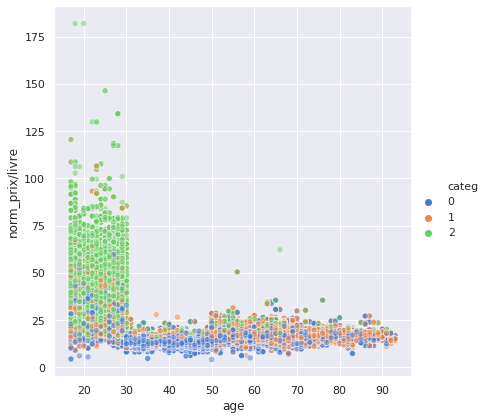

In [12]:
sns.relplot(x="age", y="norm_prix/livre", hue="categ", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_transactions)

sns.despine(left=True, bottom=True)

Nous constatons que la categorie d'age des moins de 30 ans achète de préférences des livres de *categ* 2, qui sont généralement plus chers.

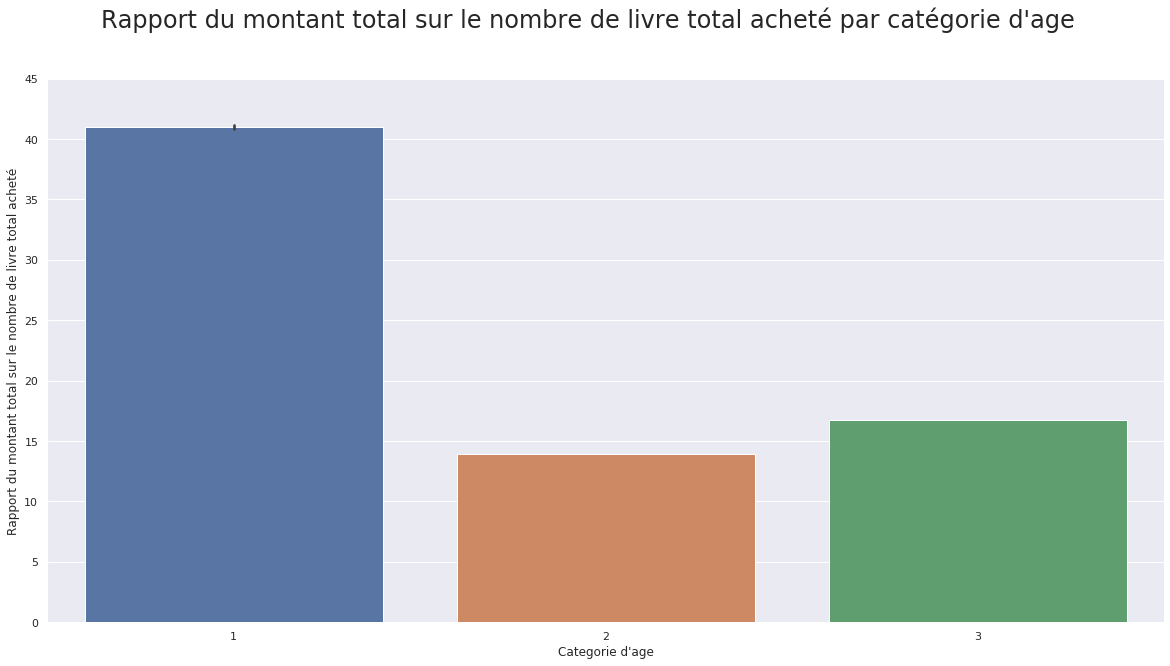

In [13]:
fig, axes = plt.subplots(figsize = (20, 10))
sns.barplot(x="cat_age", y="norm_prix/livre", data=df_transactions)

axes.set(ylim=(0, 45), ylabel="Rapport du montant total sur le nombre de livre total acheté",
       xlabel="Categorie d'age")

fig.suptitle("Rapport du montant total sur le nombre de livre total acheté par catégorie d'age", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)

Nous remarquons que la catégorie des moins de 30 ans à un rapport montant / livre acheté plus de 2 fois plus important que les autres catégorie d'age

In [14]:
df_transactions[(df_transactions['categ'] == 0)]['cat_age'].value_counts(normalize=True)

2    0.870819
3    0.089794
1    0.039387
Name: cat_age, dtype: float64

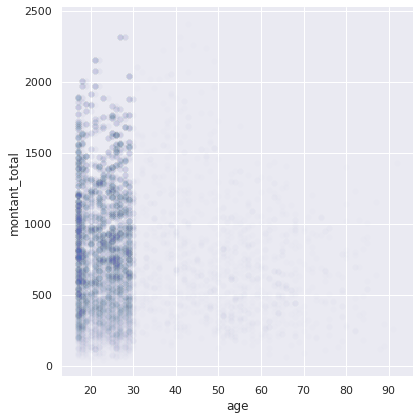

In [15]:
sns.relplot(x="age", y="montant_total", alpha=.01, palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['categ'] == 2)])

sns.despine(left=True, bottom=True)

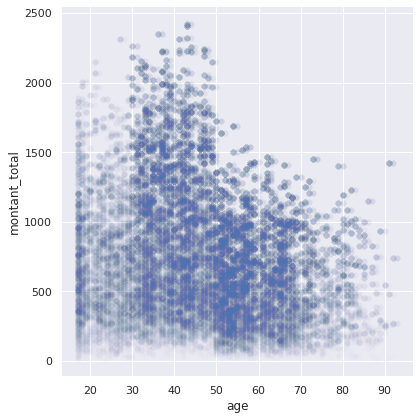

In [16]:
sns.relplot(x="age", y="montant_total", alpha=.01, palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['categ'] == 1)])

sns.despine(left=True, bottom=True)

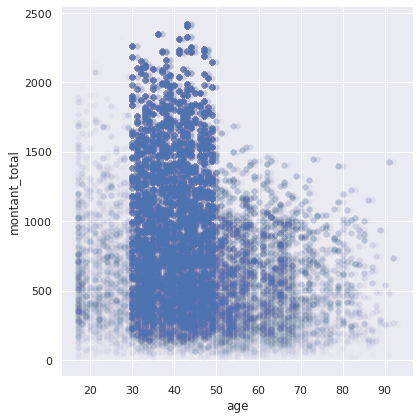

In [17]:
sns.relplot(x="age", y="montant_total", alpha=.01, palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['categ'] == 0)])

sns.despine(left=True, bottom=True)

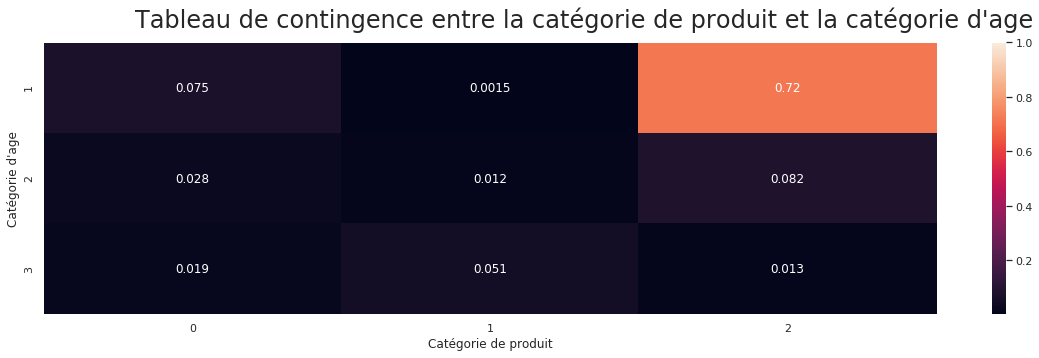

In [18]:
fig, axes = plt.subplots(figsize = (20, 5))

X = 'cat_age'
Y = 'categ'

table, c = OCR.chi_2(X,Y,df_transactions[df_transactions['montant_total_rang'] > 4])

fig.suptitle("Tableau de contingence entre la catégorie de produit et la catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], vmax=1)
plt.xlabel("Catégorie de produit")
plt.ylabel("Catégorie d'age")

plt.savefig('pictures/correlation_cat_age_categ.png')
plt.show()

Nous montrons qu'il existe une corrélation positive entre la catégorie d'age des moins de 30 ans et la catégorie de livre de *categ* 2

In [19]:
X = "categ" # qualitative
Y = "age" # quantitative

OCR.eta_squared(df_transactions[X],df_transactions[Y])

0.11953586879278608

Sans catégorisation des ages, nous ne pouvons pas dégager une corrélation entre l'age et la catégorie de livre achetée

#### DataFrame sans le top 4 clients

Nous créons un nouveau dataFrame sans le top 4 clients

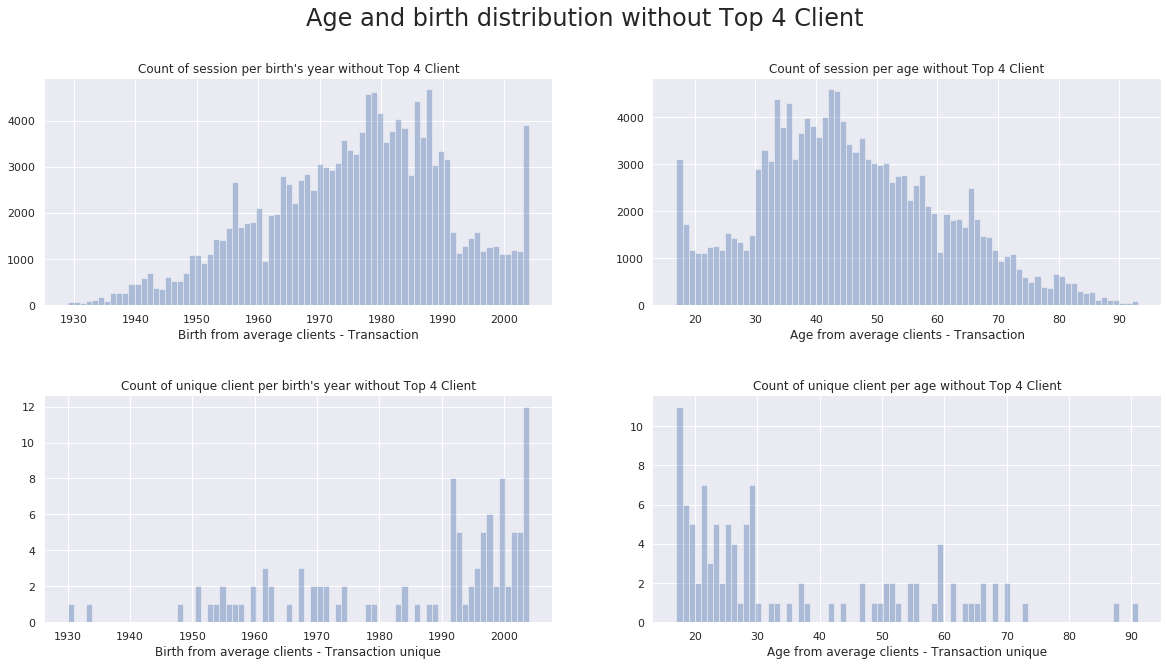

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
ax1 = fig.add_subplot(sns.distplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['birth'], axlabel='Birth from average clients - Transaction', kde=False, bins=76, ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['age'], axlabel='Age from average clients - Transaction', kde=False, bins=76, ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['birth'], axlabel='Birth from average clients - Transaction unique', kde=False, bins=76, ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['age'], axlabel='Age from average clients - Transaction unique', kde=False, bins=76, ax=axes[1, 1]))

ax1.title.set_text('Count of session per birth\'s year without Top 4 Client')
ax2.title.set_text('Count of session per age without Top 4 Client')
ax3.title.set_text('Count of unique client per birth\'s year without Top 4 Client')
ax4.title.set_text('Count of unique client per age without Top 4 Client')

fig.suptitle("Age and birth distribution without Top 4 Client", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

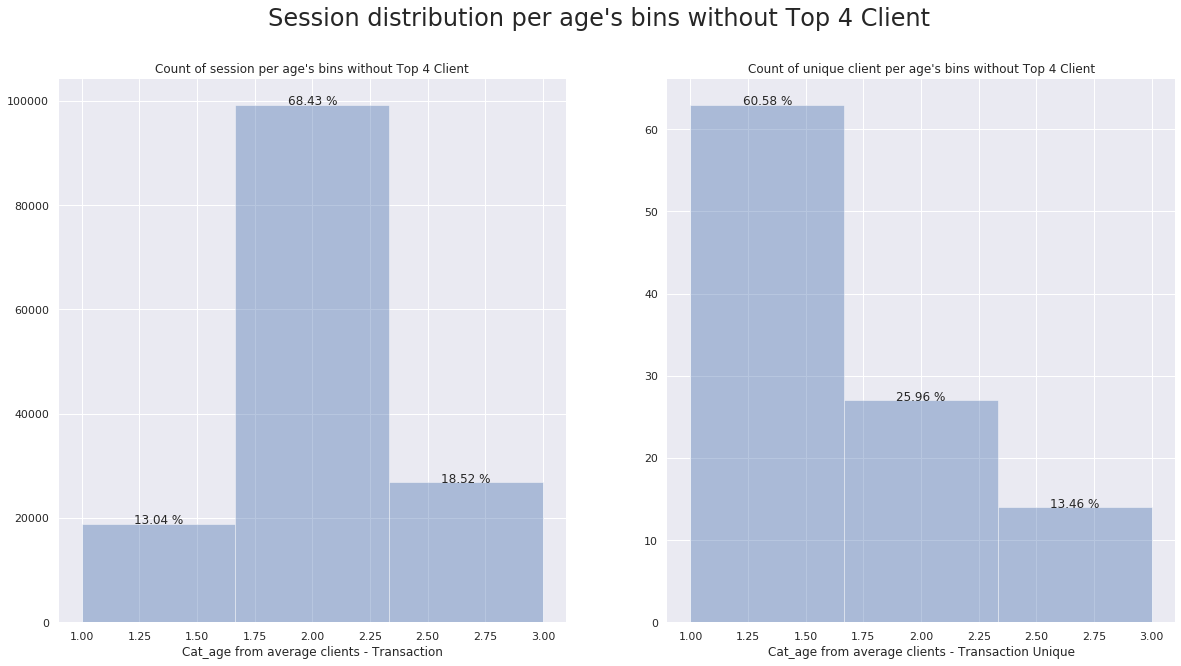

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['cat_age'], axlabel='Cat_age from average clients - Transaction', kde=False, bins=3, ax=axes[0]))
ax2 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['cat_age'], axlabel='Cat_age from average clients - Transaction Unique', kde=False, bins=3, ax=axes[1]))

ax1.title.set_text('Count of session per age\'s bins without Top 4 Client')
ax2.title.set_text('Count of unique client per age\'s bins without Top 4 Client')

total = float(len(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]))

ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4])) 
    
ax2 = OCR.plt_pourcentage(ax2, total)

fig.suptitle("Session distribution per age's bins without Top 4 Client", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)

Nous voyons ici, que la catégorie d'age des 30/49 ans est la plus représentative, avec ou sans le Top 4 Client.

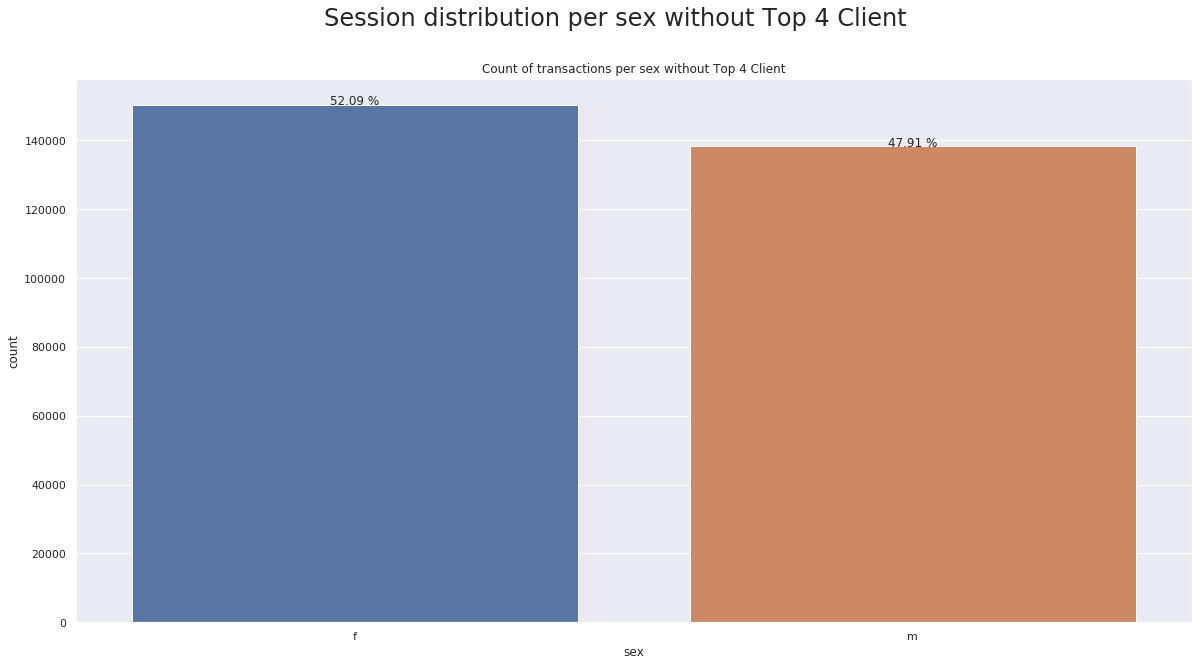

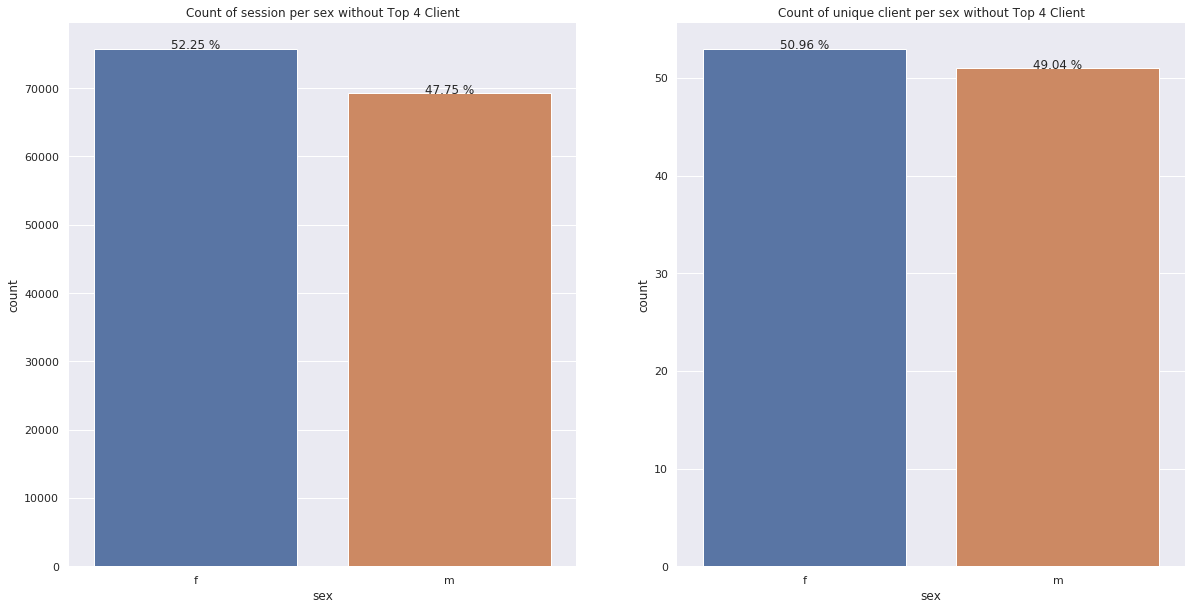

In [22]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
fig.suptitle("Session distribution per sex without Top 4 Client", fontsize= _FONTSIZETITLE_)

ax1 = sns.countplot(df_transactions[df_transactions['montant_total_rang'] > 4]['sex'])
ax1.title.set_text('Count of transactions per sex without Top 4 Client')

total = float(len(df_transactions[df_transactions['montant_total_rang'] > 4]))
ax1 = OCR.plt_pourcentage(ax1, total)

fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = sns.countplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['sex'], ax=axes[0])
ax2 = sns.countplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['sex'], ax=axes[1])

ax1.title.set_text('Count of session per sex without Top 4 Client')
ax2.title.set_text('Count of unique client per sex without Top 4 Client')

sns.despine(left=True, bottom=True)

total = float(len(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]))
ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]))
ax2 = OCR.plt_pourcentage(ax2, total)

L'écart est le sensiblement le même sans le Top 4 Client

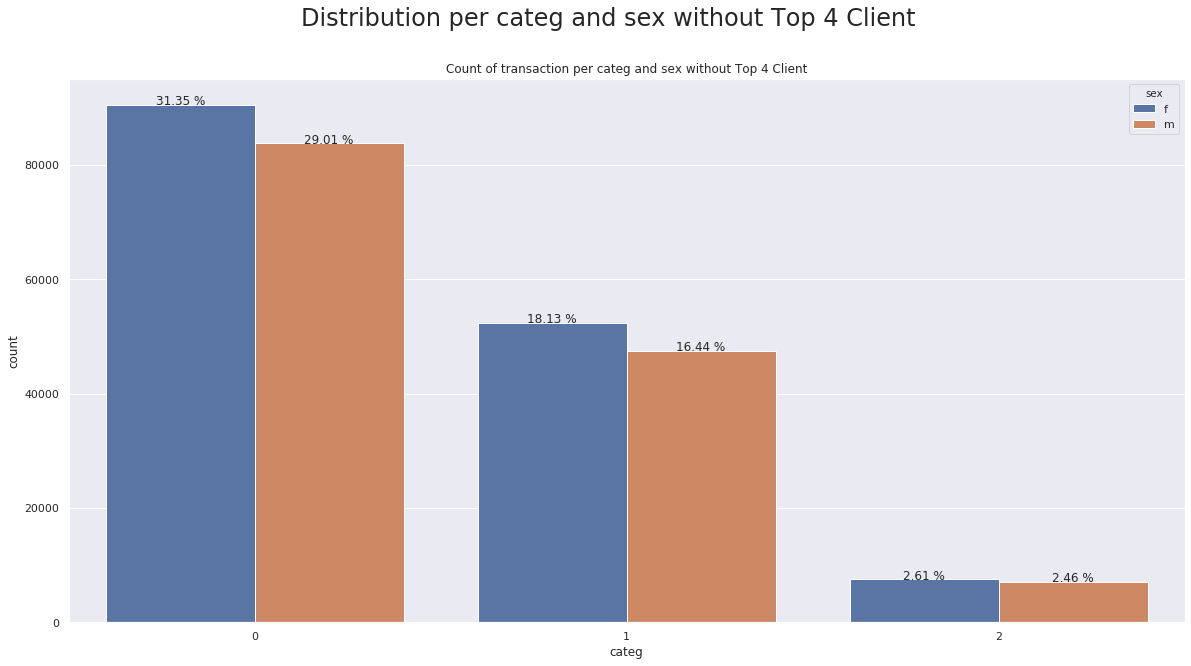

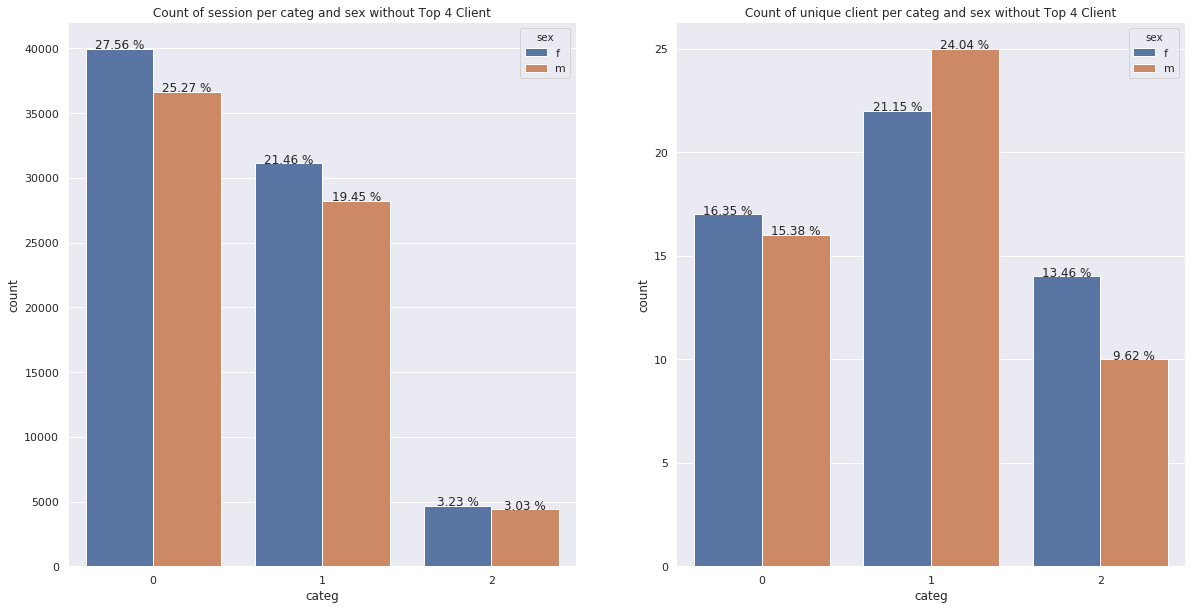

In [23]:
fig, axes = plt.subplots(figsize = (20, 10))

ax1 = sns.countplot(df_transactions[df_transactions['montant_total_rang'] > 4]['categ'], hue=df_transactions[df_transactions['montant_total_rang'] > 4]['sex'])
ax1.title.set_text('Count of transaction per categ and sex without Top 4 Client')

fig.suptitle("Distribution per categ and sex without Top 4 Client", fontsize= _FONTSIZETITLE_)

total = float(len(df_transactions[df_transactions['montant_total_rang'] > 4]))
ax1 = OCR.plt_pourcentage(ax1, total)

fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = sns.countplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['categ'], hue=df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['sex'], ax=axes[0])
ax2 = sns.countplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['categ'], hue=df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['sex'], ax=axes[1])

ax1.title.set_text('Count of session per categ and sex without Top 4 Client')
ax2.title.set_text('Count of unique client per categ and sex without Top 4 Client')

sns.despine(left=True, bottom=True)

total = float(len(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]))

ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]))
    
ax2 = OCR.plt_pourcentage(ax2, total)

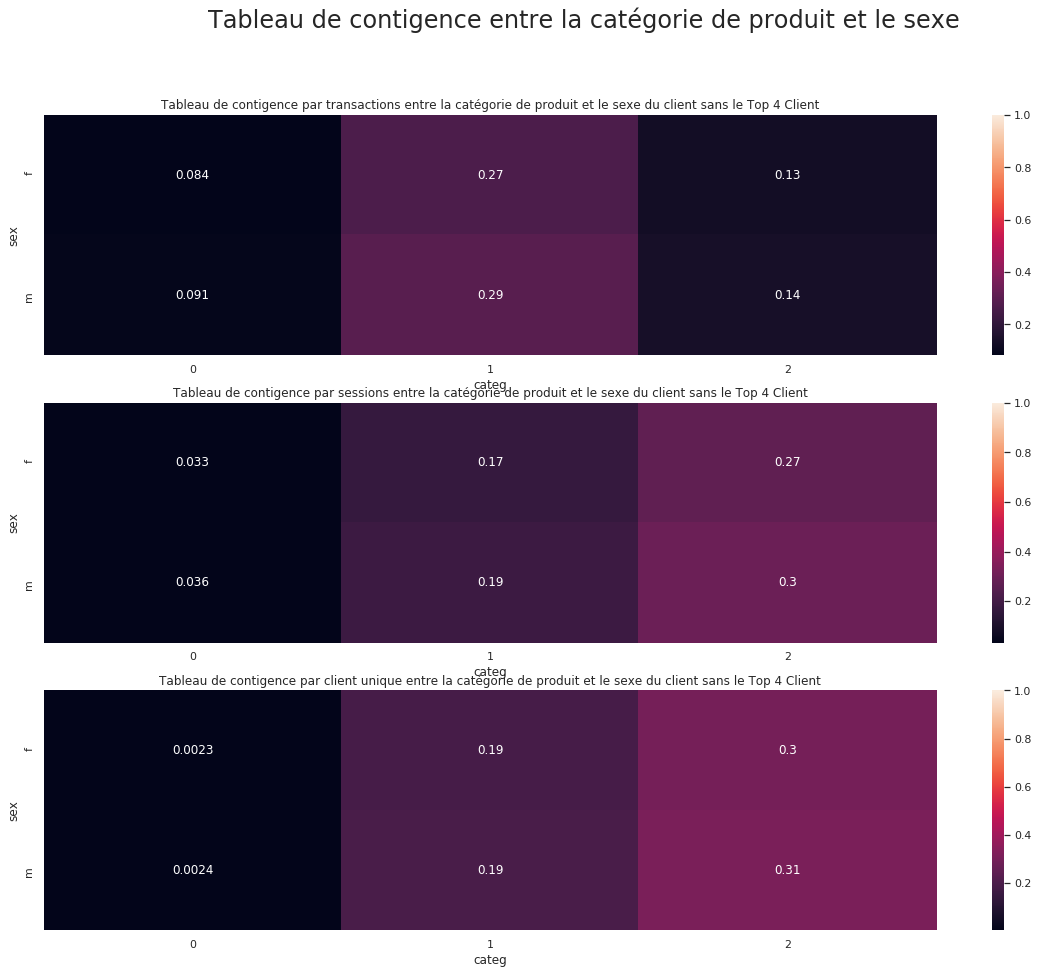

In [24]:
fig, axes = plt.subplots(3, 1, figsize = (20, 15))

X = 'sex'
Y = 'categ'

fig.suptitle("Tableau de contigence entre la catégorie de produit et le sexe", fontsize= _FONTSIZETITLE_)

table, c = OCR.chi_2(X, Y, df_transactions[df_transactions['montant_total_rang'] > 4])
ax1 = sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], vmax=1, ax=axes[0])
ax1.title.set_text('Tableau de contigence par transactions entre la catégorie de produit et le sexe du client sans le Top 4 Client')

table, c = OCR.chi_2(X, Y, df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4])
ax2 = sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], vmax=1, ax=axes[1])
ax2.title.set_text('Tableau de contigence par sessions entre la catégorie de produit et le sexe du client sans le Top 4 Client')

table, c = OCR.chi_2(X, Y, df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4])
ax3 = sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], vmax=1, ax=axes[2])
ax3.title.set_text('Tableau de contigence par client unique entre la catégorie de produit et le sexe du client sans le Top 4 Client')

plt.savefig('pictures/correlation_sex_categ.png')
plt.show()

Nous voyons qu'il n'existe pas de correlation entre le sexe du client et la catégorie de produit.

### B. Colonne *price*, *cat_price*, *categ* , *montant_total* et *bookstore*

#### DataFrame avec tous les clients

Nous allons étudier la colonne *price* et *categ*. Nous allons déterminer si il existe une corrélation entre les deux. Les prix s'échalonne de 0.62 euros à 300 euros. Il existe 3 catégories dans *categ*

D'abord, nous allons regarder la colonne *price*, et la comparer avec la même colonne du fichier *products*

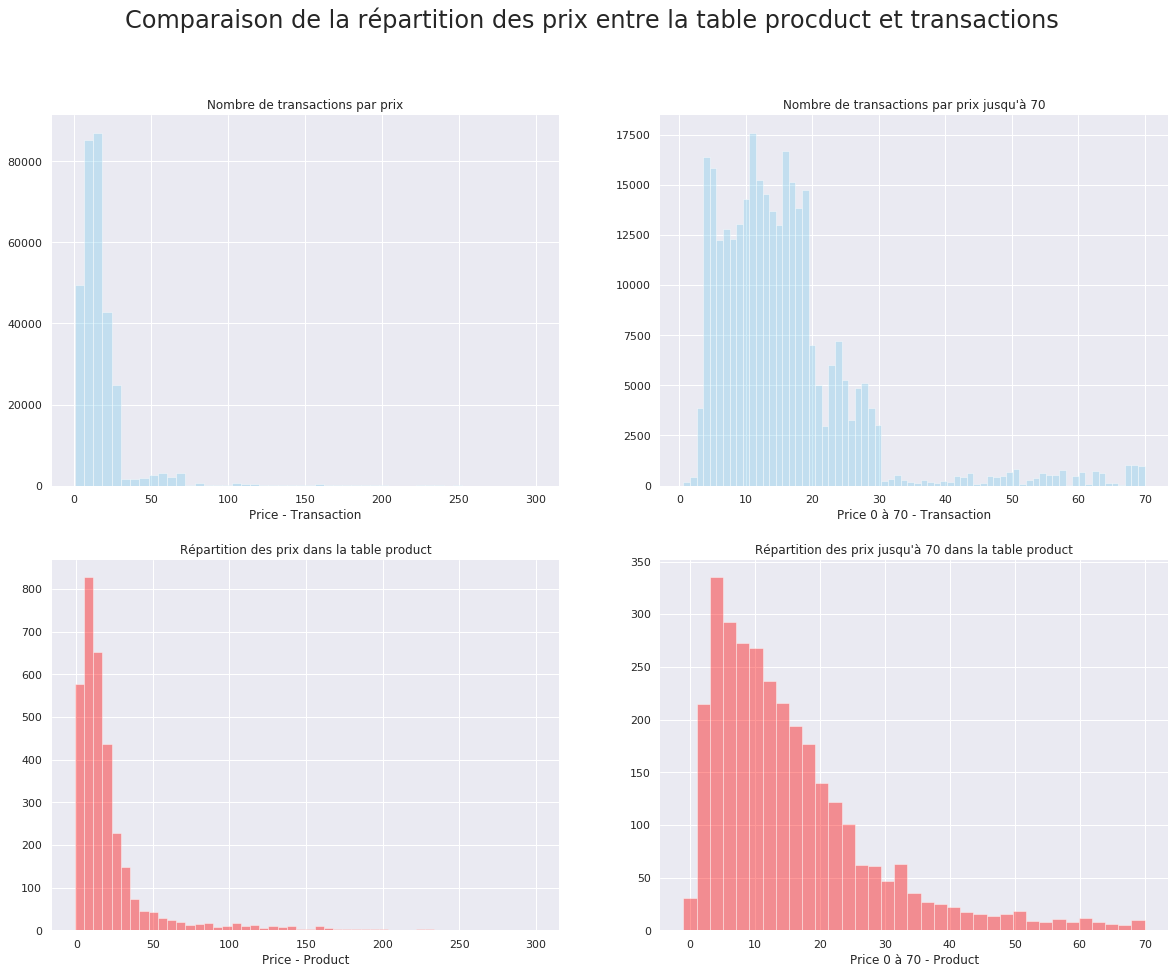

In [25]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))

ax1 = sns.distplot(df_transactions['price'], axlabel='Price - Transaction', color="skyblue", kde=False, bins=50, ax=axes[0, 0])
ax2 = sns.distplot(df_transactions[df_transactions['price'] < 70]['price'], axlabel='Price 0 à 70 - Transaction', color="skyblue", kde=False, bins=70, ax=axes[0, 1])
ax3 = sns.distplot(products['price'], axlabel='Price - Product', color="red", kde=False, ax=axes[1, 0])
ax4 = sns.distplot(products[products['price'] < 70]['price'], axlabel='Price 0 à 70 - Product', color="red", kde=False, bins=35, ax=axes[1, 1])

ax1.title.set_text('Nombre de transactions par prix')
ax2.title.set_text('Nombre de transactions par prix jusqu\'à 70')
ax3.title.set_text('Répartition des prix dans la table product')
ax4.title.set_text('Répartition des prix jusqu\'à 70 dans la table product')

fig.suptitle("Comparaison de la répartition des prix entre la table procduct et transactions", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.savefig('pictures/prix_distribution.png')

Nous remarquons que la répartition des prix entre la référence produit et la commande des produits est différente. Cette différence est plus marquée sur des prix inférieurs à 70 euros. Ce sont les livres entre 10 et 12 euros qui sont les plus vendus. Ensuite, la fourchette entre 6 et 18 euros représente la majorité des ventes.

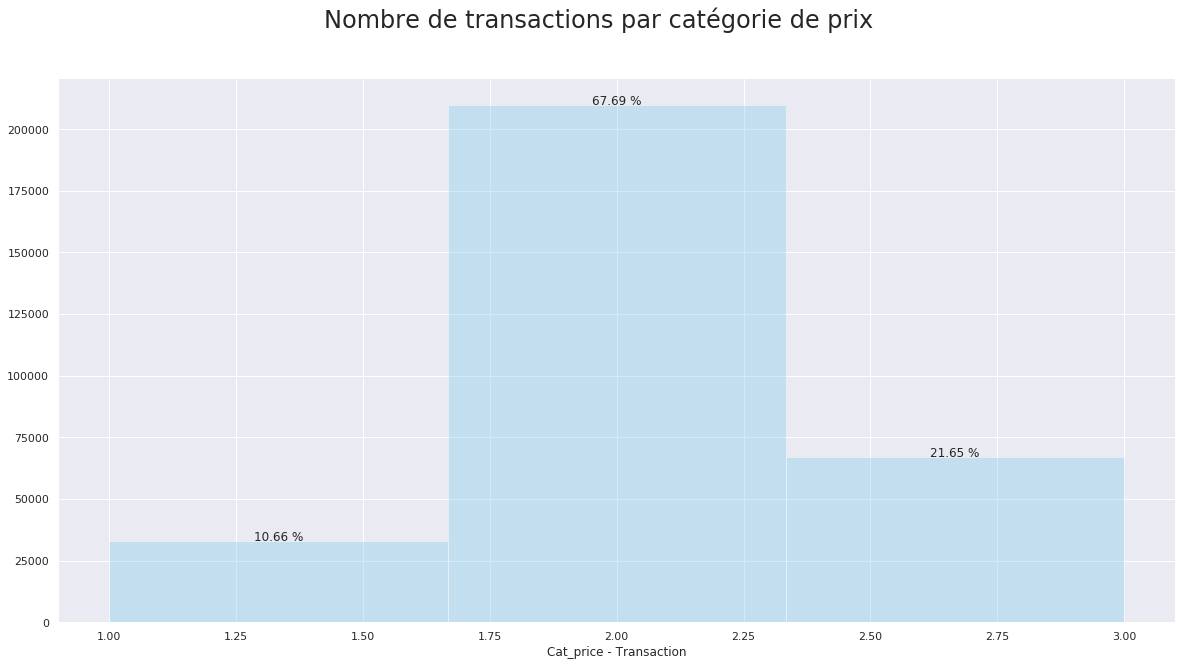

In [26]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
ax1 = sns.distplot(df_transactions['cat_price'], axlabel='Cat_price - Transaction', color="skyblue", kde=False, bins=3)

fig.suptitle('Nombre de transactions par catégorie de prix', fontsize= _FONTSIZETITLE_)

total = float(len(df_transactions))

ax1 = OCR.plt_pourcentage(ax1, total)

sns.despine(left=True, bottom=True)
plt.savefig('pictures/cat_price.png')

La colonne *cat_price* nous montre également que la catégorie de livre la plus vendue est celle dont le prix est situé entre 10 et 19.99 euros.

Nous allons regarder la colonne *categ*, et essaye de comprendre ce qu'elle représente

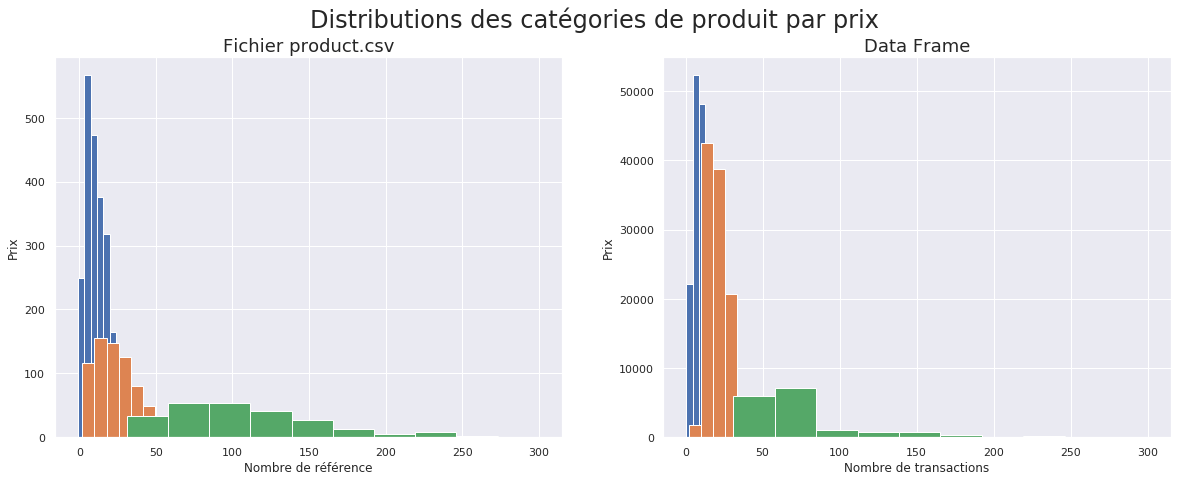

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7))

fig.suptitle('Distributions des catégories de produit par prix', fontsize= _FONTSIZETITLE_)

x0 = products[products['categ'] == 0]['price']
x1 = products[products['categ'] == 1]['price']
x2 = products[products['categ'] == 2]['price']

axes[0].hist(x0)
axes[0].hist(x1)
axes[0].hist(x2)

axes[0].set_title('Fichier product.csv', fontsize= _FONTSIZE_)
axes[0].set_xlabel('Nombre de référence')
axes[0].set_ylabel('Prix')

x0 = df_transactions[df_transactions['categ'] == 0]['price']
x1 = df_transactions[df_transactions['categ'] == 1]['price']
x2 = df_transactions[df_transactions['categ'] == 2]['price']

axes[1].hist(x0)
axes[1].hist(x1)
axes[1].hist(x2)

axes[1].set_title('Data Frame', fontsize= _FONTSIZE_)
axes[1].set_xlabel('Nombre de transactions')
axes[1].set_ylabel('Prix')

plt.savefig('pictures/categ.png')
plt.show()

Nous constatons que *categ* est sensible au prix mais doit représenter des types de livres différents, par exemple, la catégorie 1 représente les livres de poche, la catégorie 2, le livre grand format, et la catégorie 3 les beaux livres comme les encyclopédies. 

In [28]:
products[products['categ'] == 0]['price'].std()

7.568755587526856

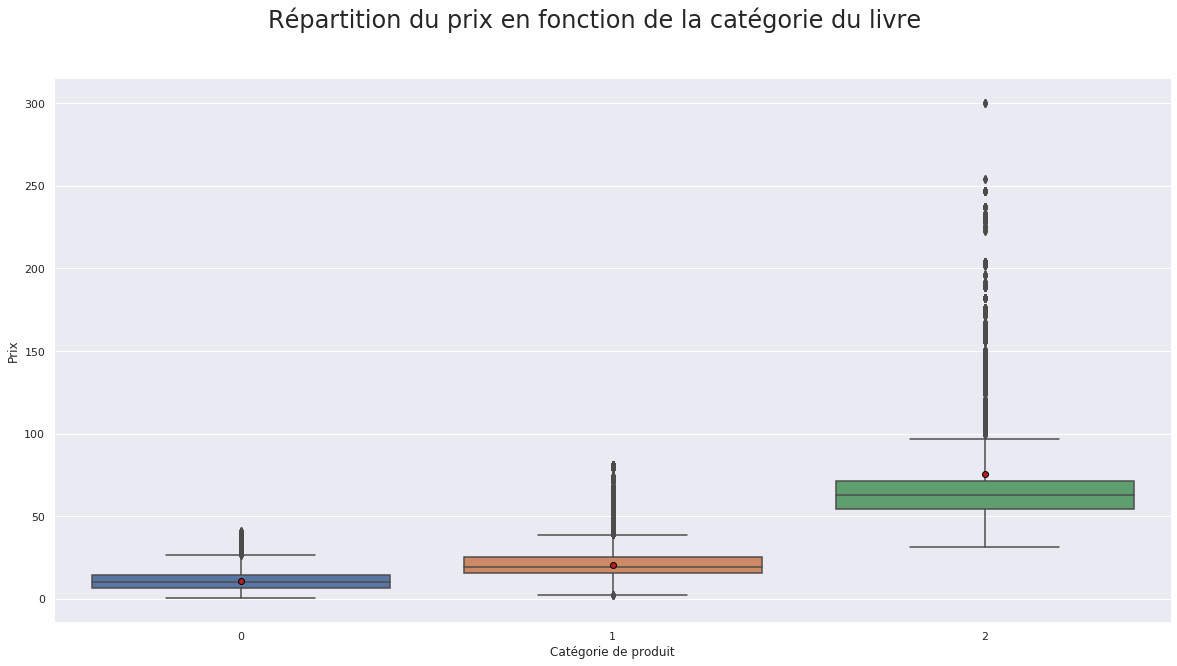

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

fig.suptitle('Répartition du prix en fonction de la catégorie du livre', fontsize= _FONTSIZETITLE_)
ax1 = sns.boxplot(x=df_transactions['categ'], y=df_transactions['price'], meanprops=meanprops, showmeans=True, data=df_transactions)

plt.xlabel("Catégorie de produit")
plt.ylabel("Prix")

sns.despine(left=True, bottom=True)
plt.savefig('pictures/categ_moustache.png')

Nous constatons que les prix de *categ* sont dans un interquartile Q1-Q3 très petit, avec des bornes peu étendue également. Pour les categ 1 et 2, les outliers sont peu étalés, tandis que sur la categ 3, les outliers sont très étalés avec des prix élevés. Il y a une échalonnage des prix qui est plus marqué pour la categ 3.

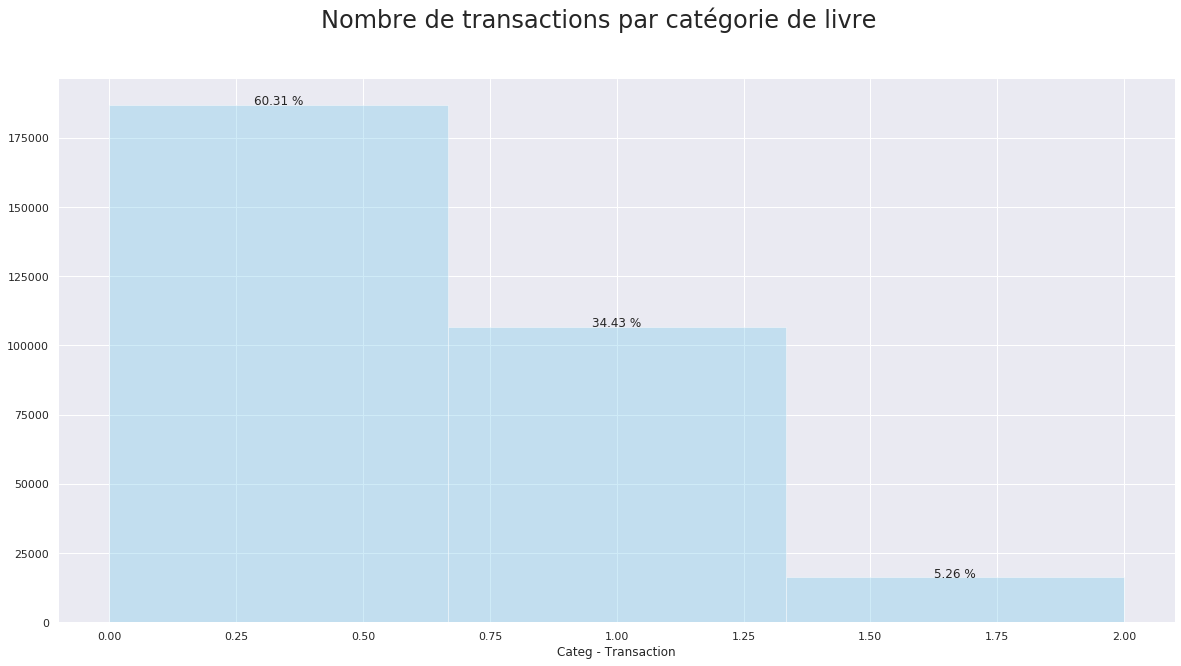

In [30]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
ax1 = sns.distplot(df_transactions['categ'], axlabel='Categ - Transaction', color="skyblue", kde=False, bins=3)

fig.suptitle('Nombre de transactions par catégorie de livre', fontsize= _FONTSIZETITLE_)

total = float(len(df_transactions))

ax1 = OCR.plt_pourcentage(ax1, total)

sns.despine(left=True, bottom=True)
plt.savefig('pictures/categ_distribution.png')

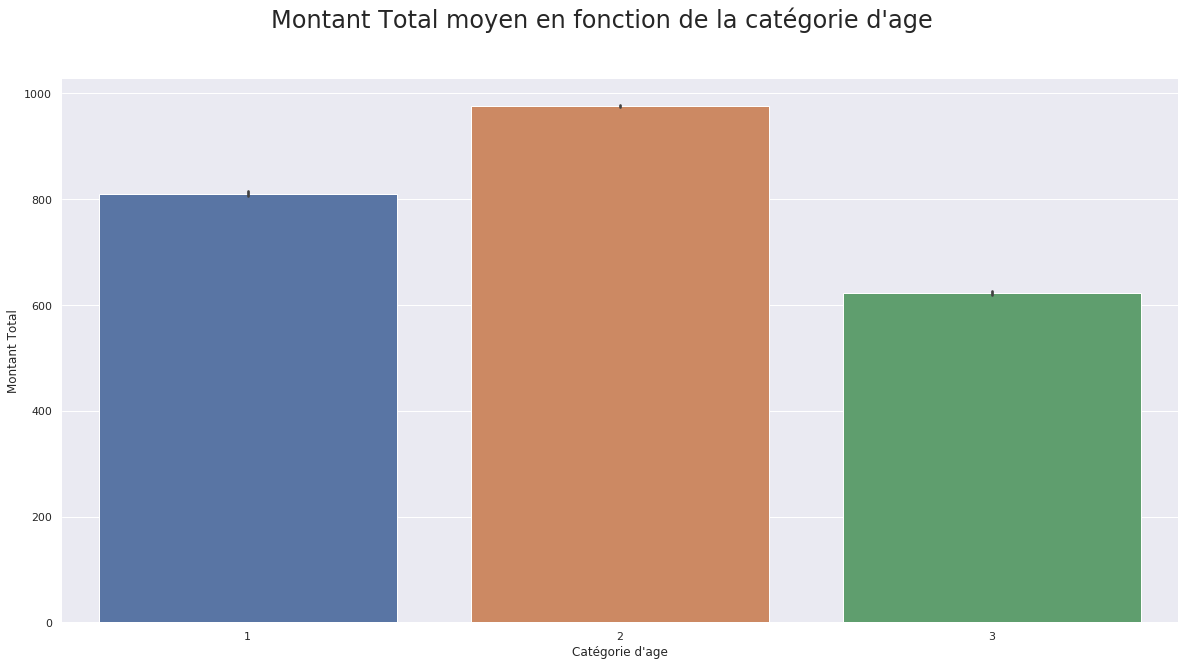

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
fig.suptitle('Montant Total moyen en fonction de la catégorie d\'age', fontsize= _FONTSIZETITLE_)

sns.barplot(x="cat_age", y="montant_total", data=df_transactions[df_transactions['montant_total_rang'] > 4])

plt.xlabel("Catégorie d'age")
plt.ylabel("Montant Total")

sns.despine(left=True, bottom=True)

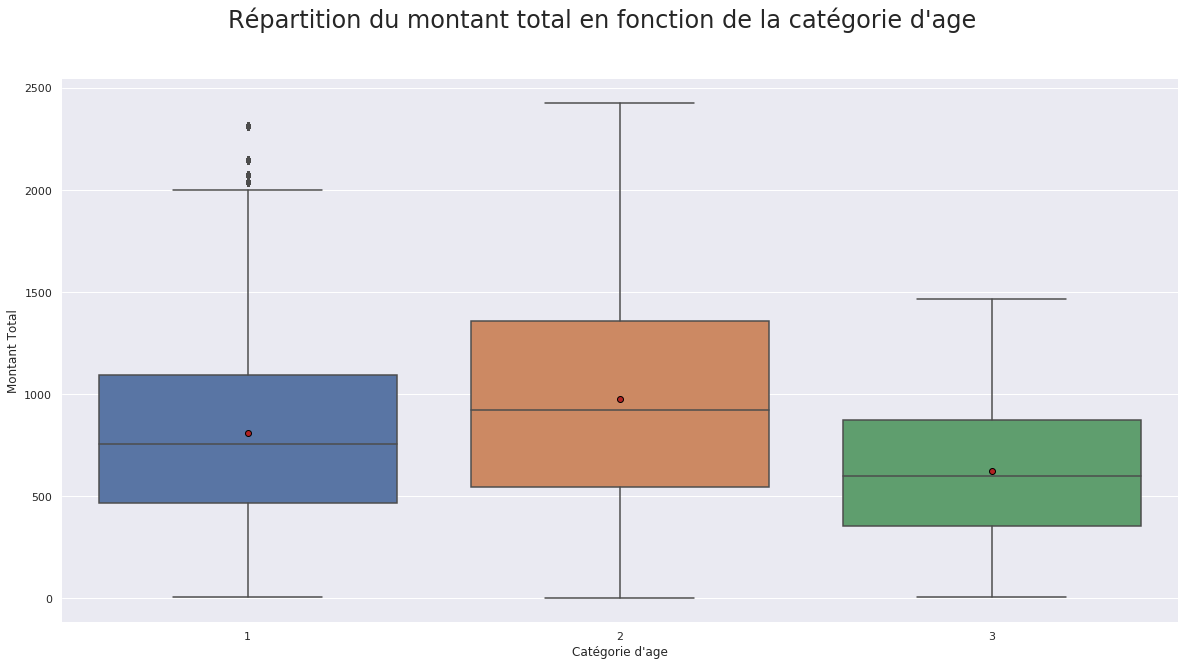

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
fig.suptitle('Répartition du montant total en fonction de la catégorie d\'age', fontsize= _FONTSIZETITLE_)

sns.boxplot(x=df_transactions[df_transactions['montant_total_rang'] > 4]['cat_age'], y=df_transactions[df_transactions['montant_total_rang'] > 4]['montant_total'], meanprops=meanprops, showmeans=True, data=df_transactions)

plt.xlabel("Catégorie d'age")
plt.ylabel("Montant Total")

sns.despine(left=True, bottom=True)

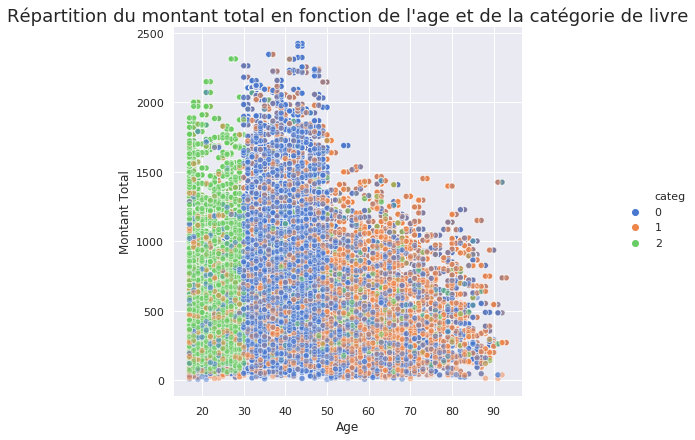

In [33]:
sns.relplot(x="age", y="montant_total", hue="categ", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_transactions[df_transactions['montant_total_rang'] > 4])

plt.title('Répartition du montant total en fonction de l\'age et de la catégorie de livre', fontsize= _FONTSIZE_)

plt.xlabel("Age")
plt.ylabel("Montant Total")

plt.savefig('pictures/plot_categ.png')
sns.despine(left=True, bottom=True)

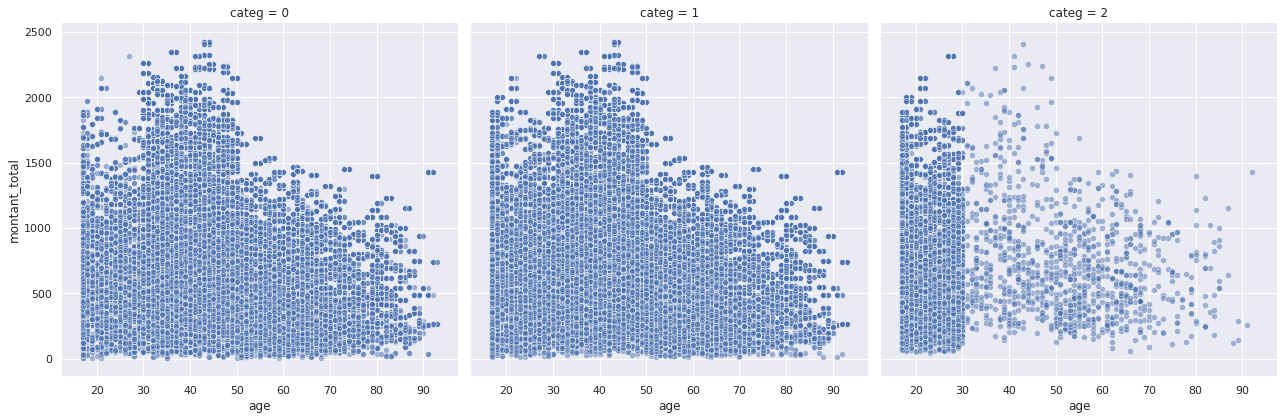

In [34]:
sns.relplot(x="age", y="montant_total", col="categ", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_transactions[df_transactions['montant_total_rang'] > 4])

plt.savefig('pictures/plot_categ_splitted.png')
sns.despine(left=True, bottom=True)

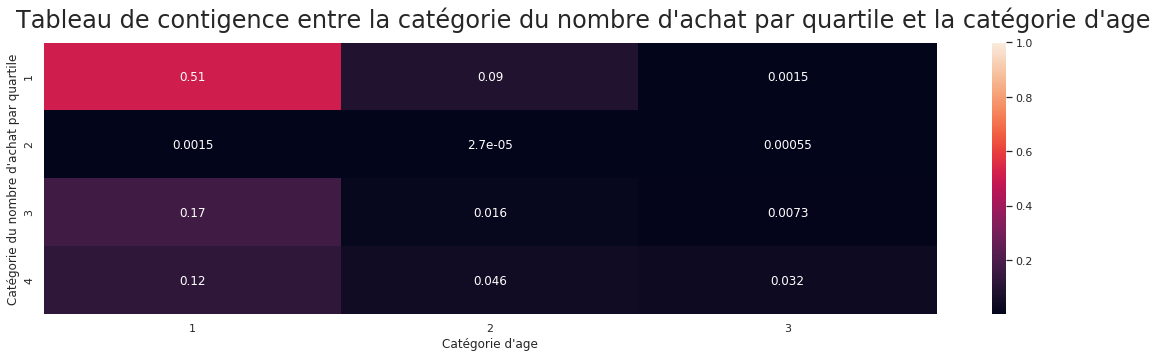

In [35]:
fig, axes = plt.subplots(figsize = (20, 5))

X = 'cat_nb_achat'
Y = 'cat_age'

table, c = OCR.chi_2(X,Y,df_transactions[df_transactions['montant_total_rang'] > 4])

fig.suptitle("Tableau de contigence entre la catégorie du nombre d'achat par quartile et la catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], vmax=1)
plt.xlabel("Catégorie d'age")
plt.ylabel("Catégorie du nombre d'achat par quartile")

plt.savefig('pictures/correlation_nb_achat_cat_age.png')
plt.show()

Nous constatons qu'il existe une corrélation entre la catégorie d'achat la plus faible et la catégorie d'age des moins de 30 ans. Cette catégorie d'age est la moins nombreuse présente sur le site

In [36]:
f"Elle ne représente que {df_transactions['cat_age'].value_counts(normalize=True)[1] * 100:0.2f} % des clients"

'Elle ne représente que 11.62 % des clients'

In [37]:
X = "cat_age" # qualitative
Y = "session_nb_produit_mean" # quantitative
    
f"Le coefficient de corrélation est de {OCR.eta_squared(df_transactions[X],df_transactions[Y]):0.3f}, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

"Le coefficient de corrélation est de 0.212, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

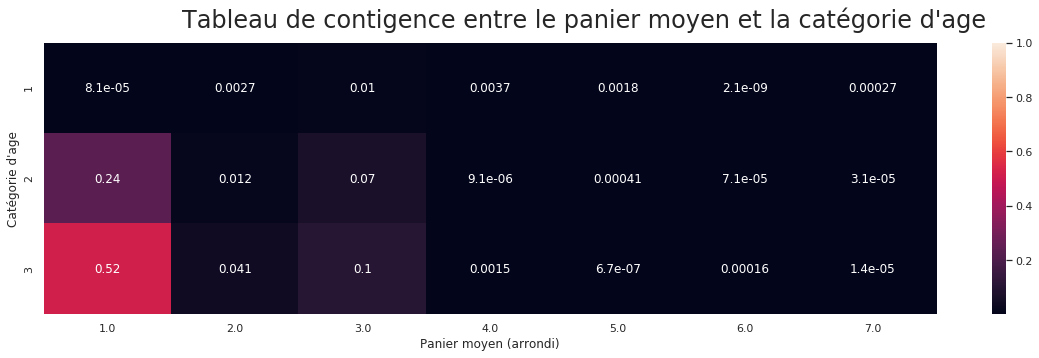

In [38]:
fig, axes = plt.subplots(figsize = (20, 5))

X = 'cat_age_2'
Y = 'session_nb_produit_mean_rounded'

table, c = OCR.chi_2(X,Y,df_transactions[df_transactions['montant_total_rang'] > 4])

fig.suptitle("Tableau de contigence entre le panier moyen et la catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], vmax=1)
plt.xlabel("Panier moyen (arrondi)")
plt.ylabel("Catégorie d'age")

plt.savefig('pictures/correlation_nb_achat_cat_age.png')
plt.show()

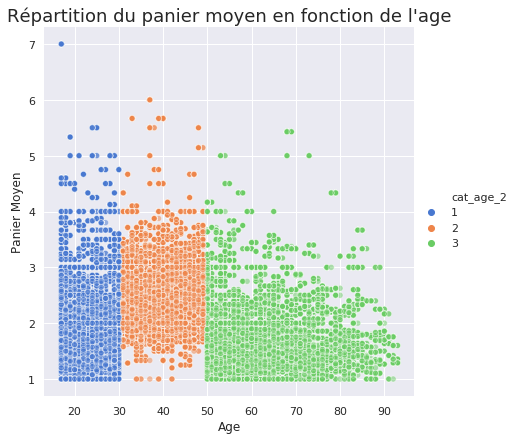

In [39]:
sns.relplot(x="age", y="session_nb_produit_mean", hue='cat_age_2',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_transactions[df_transactions['montant_total_rang'] > 4])

plt.title('Répartition du panier moyen en fonction de l\'age', fontsize= _FONTSIZE_)

plt.xlabel("Age")
plt.ylabel("Panier Moyen")

plt.savefig('pictures/plot_age_panier_moyen.png')
sns.despine(left=True, bottom=True)

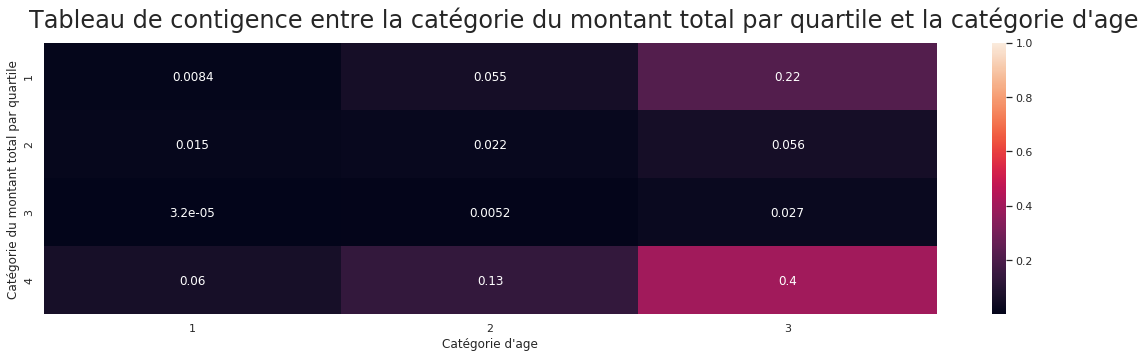

In [40]:
fig, axes = plt.subplots(figsize = (20, 5))

X = 'cat_montant_total'
Y = 'cat_age'

table, c = OCR.chi_2(X,Y,df_transactions[df_transactions['montant_total_rang'] > 4])

fig.suptitle("Tableau de contigence entre la catégorie du montant total par quartile et la catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], vmax=1)
plt.xlabel("Catégorie d'age")
plt.ylabel("Catégorie du montant total par quartile")

plt.savefig('pictures/correlation_montant_achat_cat_age.png')
plt.show()

Il n'y a pas de corrélation franche entre la catégorie du montant d'achat et la catégorie d'age

In [41]:
X = "cat_age" # qualitative
Y = "montant_total" # quantitative
    
f"Le coefficient de corrélation est de {OCR.eta_squared(df_transactions[X],df_transactions[Y]):0.3f}, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

"Le coefficient de corrélation est de 0.010, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

Il n'y a pas de corrélation entre l'age et le montant total

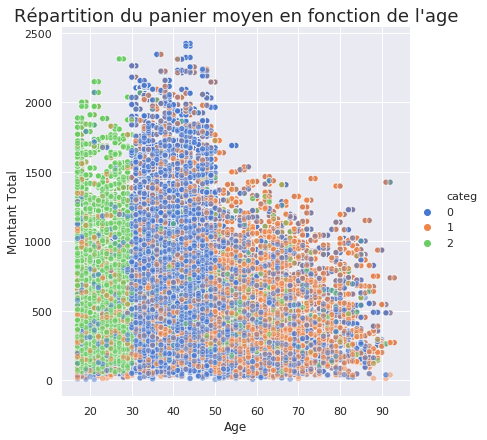

In [42]:
sns.relplot(x="age", y="montant_total", hue='categ',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_transactions[df_transactions['montant_total_rang'] > 4])

plt.title('Répartition du panier moyen en fonction de l\'age', fontsize= _FONTSIZE_)

plt.xlabel("Age")
plt.ylabel("Montant Total")

plt.savefig('pictures/plot_age_montant_total.png')
sns.despine(left=True, bottom=True)

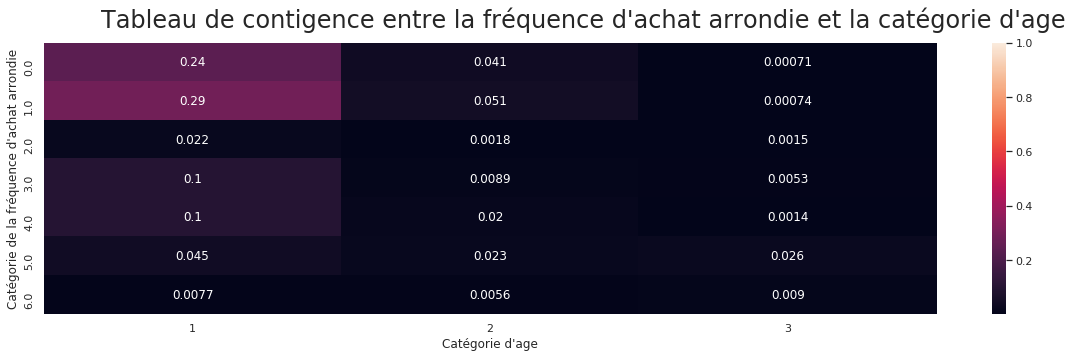

In [43]:
fig, axes = plt.subplots(figsize = (20, 5))

X = 'freq_achat_mean_rounded'
Y = 'cat_age'

table, c = OCR.chi_2(X,Y,df_transactions[df_transactions['montant_total_rang'] > 4])

fig.suptitle("Tableau de contigence entre la fréquence d'achat arrondie et la catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1], vmax=1)
plt.xlabel("Catégorie d'age")
plt.ylabel("Catégorie de la fréquence d'achat arrondie")

plt.savefig('pictures/correlation_frequence_achat_cat_age.png')
plt.show()

In [44]:
X = "cat_age" # qualitative
Y = "freq_achat_mean" # quantitative
    
f"Le coefficient de corrélation est de {OCR.eta_squared(df_transactions[X],df_transactions[Y]):0.3f}, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

"Le coefficient de corrélation est de 0.013, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

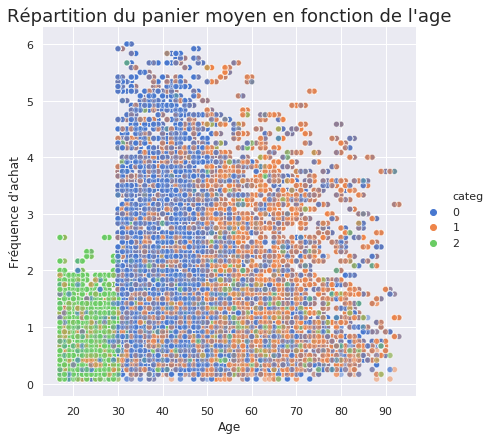

In [45]:
sns.relplot(x="age", y="freq_achat_mean", hue='categ',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_transactions[df_transactions['montant_total_rang'] > 4])

plt.title('Répartition du panier moyen en fonction de l\'age', fontsize= _FONTSIZE_)

plt.xlabel("Age")
plt.ylabel("Fréquence d'achat")

plt.savefig('pictures/plot_age_frequence_achat.png')
sns.despine(left=True, bottom=True)

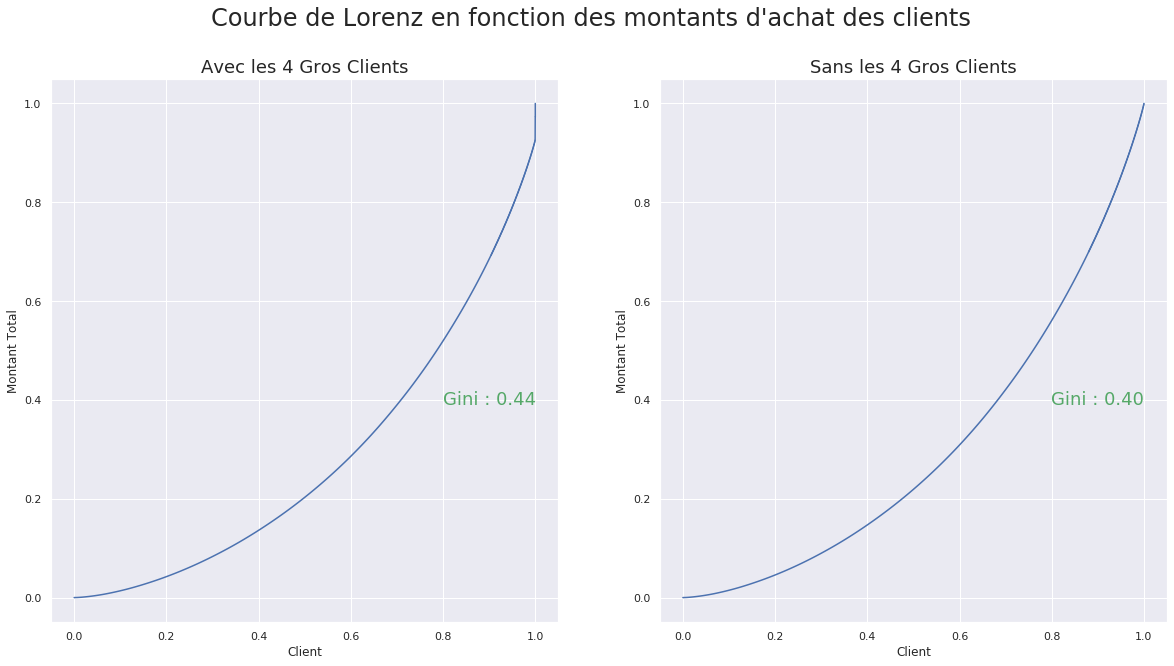

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Courbe de Lorenz en fonction des montants d'achat des clients", fontsize= _FONTSIZETITLE_)

lorenz, n, gini = OCR.lorenz(df_transactions.drop_duplicates('client_id')['montant_total'])
xaxis = np.linspace(1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

axes[0].plot(xaxis,lorenz,drawstyle='steps-post')
axes[0].text(0.9, 0.4, f"Gini : {gini:0.2f}", {'color': 'C2', 'fontsize': 18}, va="center", ha="center")
axes[0].set_title('Avec les 4 Gros Clients', fontsize= _FONTSIZE_)
axes[0].set_xlabel('Client')
axes[0].set_ylabel('Montant Total')

lorenz, n, gini = OCR.lorenz(df_transactions[df_transactions['montant_total_rang'] > 4].drop_duplicates('client_id')['montant_total'])
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

axes[1].plot(xaxis,lorenz,drawstyle='steps-post')
axes[1].text(0.9, 0.4, f"Gini : {gini:0.2f}", {'color': 'C2', 'fontsize': 18}, va="center", ha="center")
axes[1].set_title('Sans les 4 Gros Clients', fontsize= _FONTSIZE_)
axes[1].set_xlabel('Client')
axes[1].set_ylabel('Montant Total')

plt.savefig('pictures/lorenz_gros_client.png')
plt.show()

#### DataFrame sans le top 4 clients

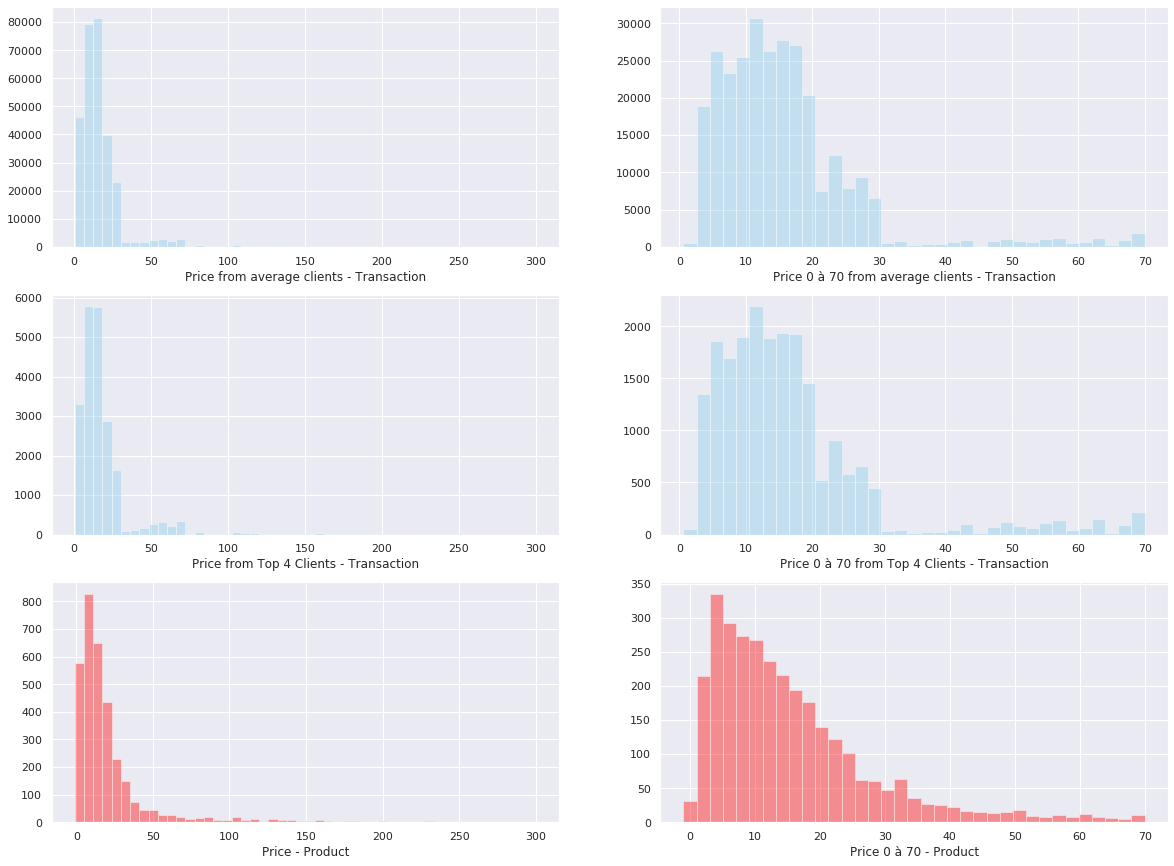

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['price'], axlabel='Price from average clients - Transaction', color="skyblue", kde=False, bins=50, ax=axes[0, 0])
sns.distplot(df_transactions[(df_transactions['price'] < 70) & (df_transactions['montant_total_rang'] > 4)]['price'], axlabel='Price 0 à 70 from average clients - Transaction', color="skyblue", kde=False, bins=35, ax=axes[0, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['price'], axlabel='Price from Top 4 Clients - Transaction', color="skyblue", kde=False, bins=50, ax=axes[1, 0])
sns.distplot(df_transactions[(df_transactions['price'] < 70) & (df_transactions['montant_total_rang'] < 5)]['price'], axlabel='Price 0 à 70 from Top 4 Clients - Transaction', color="skyblue", kde=False, bins=35, ax=axes[1, 1])
sns.distplot(products['price'], axlabel='Price - Product', color="red", kde=False, ax=axes[2, 0])
sns.distplot(products[products['price'] < 70]['price'], axlabel='Price 0 à 70 - Product', color="red", kde=False, bins=35, ax=axes[2, 1])


Nous remarquons que la différence des formes de la courbe des prix des produits achetés par le top 4 des clients ou les clients normaux n'est pas significative.

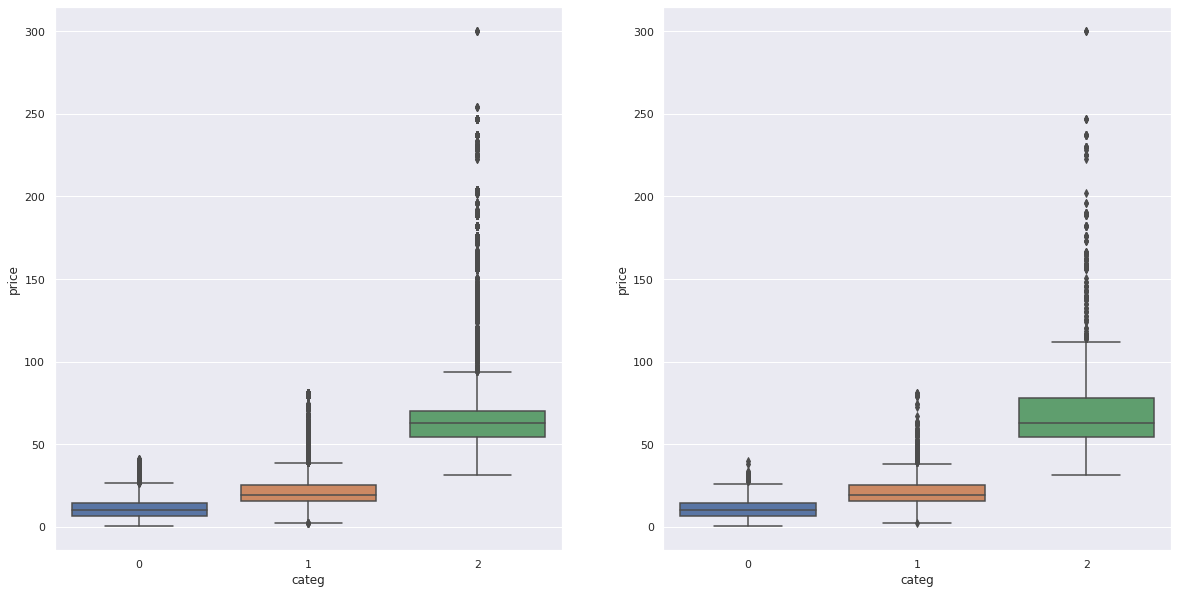

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x=df_transactions[df_transactions['montant_total_rang'] > 4]['categ'], y=df_transactions['price'],data=df_transactions, ax=axes[0])
sns.boxplot(x=df_transactions[df_transactions['montant_total_rang'] < 5]['categ'], y=df_transactions['price'],data=df_transactions, ax=axes[1])

Nous constatons que les deux graphiques sont semblables

### C. Colonne *date*, *weekday*, *daytime*, *month*, *week*, *year*

#### DataFrame avec tous les clients

Nous allons vérifier les colonnes liés aux dates

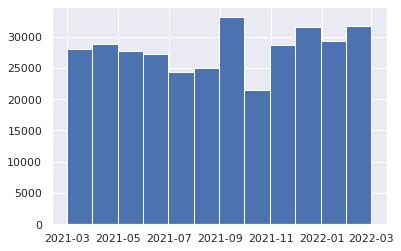

In [49]:
df_transactions_w_october['date'].hist(bins = 12)

In [50]:
df_transactions.nlargest(1, 'date').date

254695   2022-02-28 23:59:58.040472
Name: date, dtype: datetime64[ns]

In [51]:
df_transactions.nsmallest(1, 'date').date

221790   2021-03-01 00:01:07.843138
Name: date, dtype: datetime64[ns]

Nous constatons bien que les dates débutent en mars 2021 et finissent fin février 2022, soit sur 12 mois

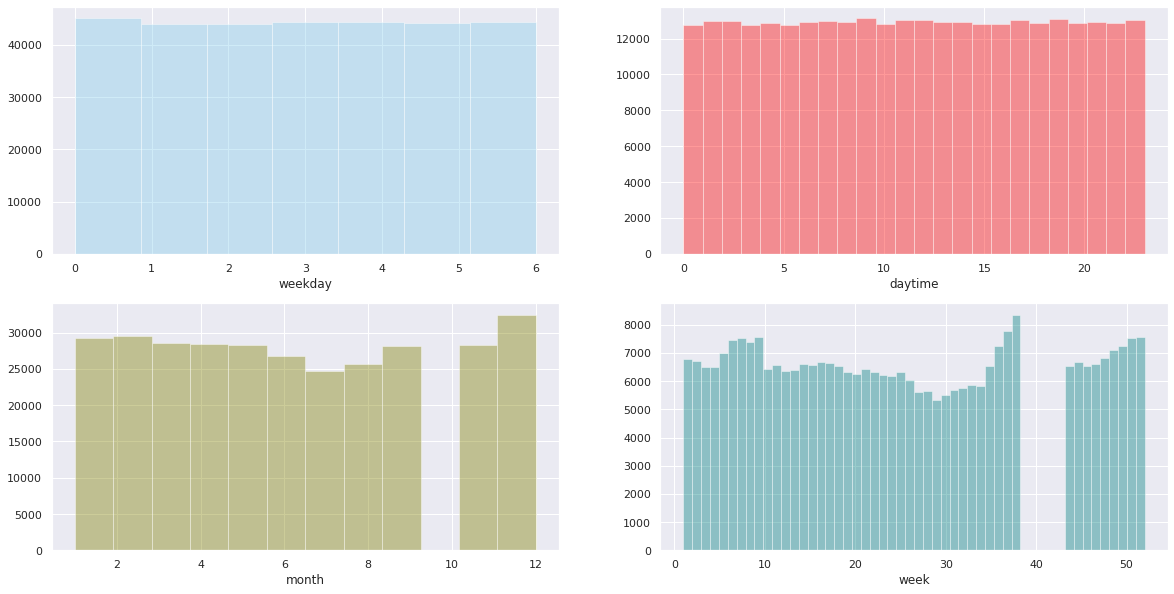

In [52]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions['weekday'], color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions['daytime'], color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions['month'], color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions['week'], color="teal", kde=False, bins=52, ax=axes[1, 1])

Tout d'abord, il existe de moments dans l'année où le volume de vents est plus important. En septembre, à la rentrée, et en novembre et décembre, pendant les fêtes de fin d'année. Nous remarquons, également, que le jour de la semaine et l'heure d'achat non pas d'influence sur le volume de vente. 


Nous allons investiger sur les pics de ventes, mais aussi sur l'influence des jours de la semaine et de l'heure. Egalement, le mois d'octobre est vide, puisque nous l'avons enlever les données qui étaient erronées.

Tout d'abord, nous allons prendre un échantillion de 1 %

In [53]:
df_transactions_sample = df_transactions.sample(3367)

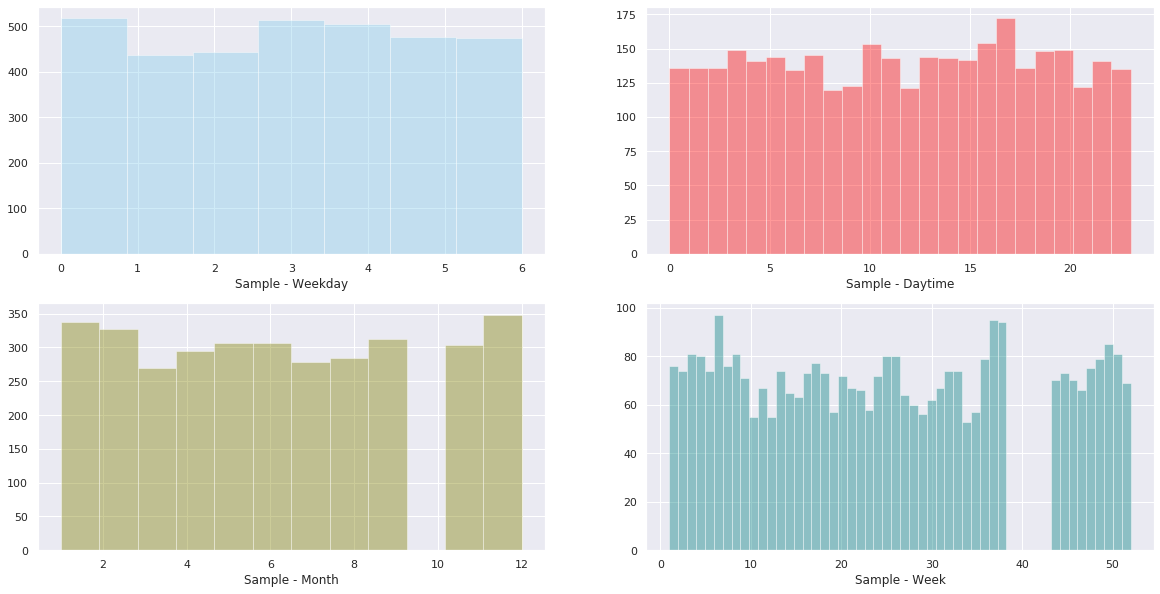

In [54]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions_sample['weekday'], axlabel='Sample - Weekday', color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions_sample['daytime'], axlabel='Sample - Daytime', color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions_sample['month'], axlabel='Sample - Month', color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions_sample['week'], axlabel='Sample - Week', color="teal", kde=False, bins=52, ax=axes[1, 1])

Nous remarquons qu'avec un échantillon de 1 %, la représentation des graphiques est similaire. Egalement, le mois d'octobre est vide, puisque nous l'avons enlever les données qui étaient erronées.

#### DataFrame sans le top 4 clients

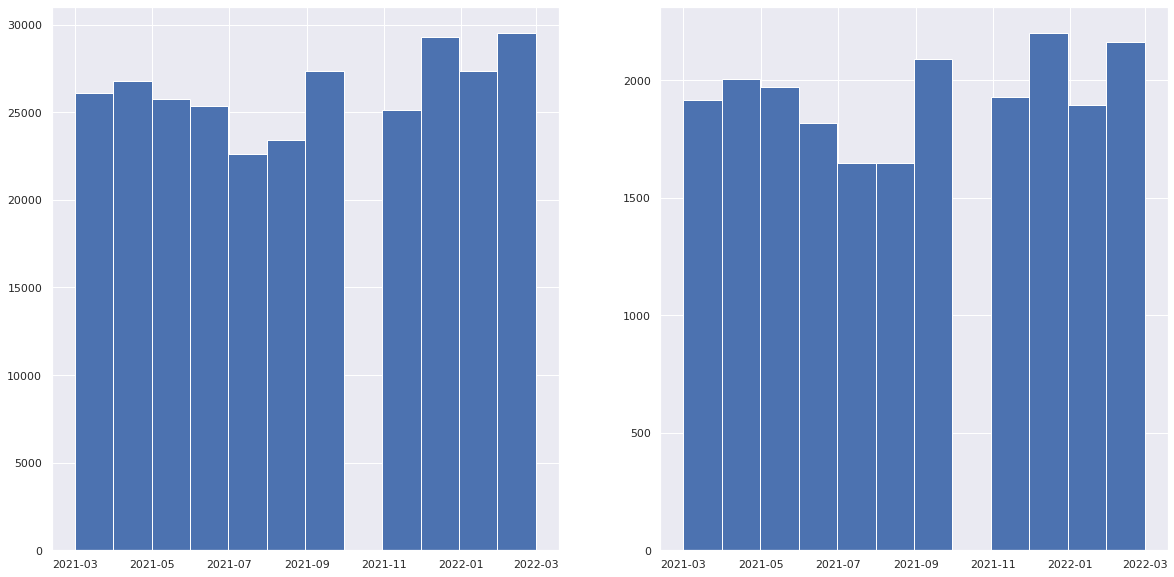

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
df_transactions[df_transactions['montant_total_rang'] > 4]['date'].hist(bins = 12, ax=axes[0])
df_transactions[df_transactions['montant_total_rang'] < 5]['date'].hist(bins = 12, ax=axes[1])

La répartition dans le temps entre les *average* clients et le top 4 est similaire

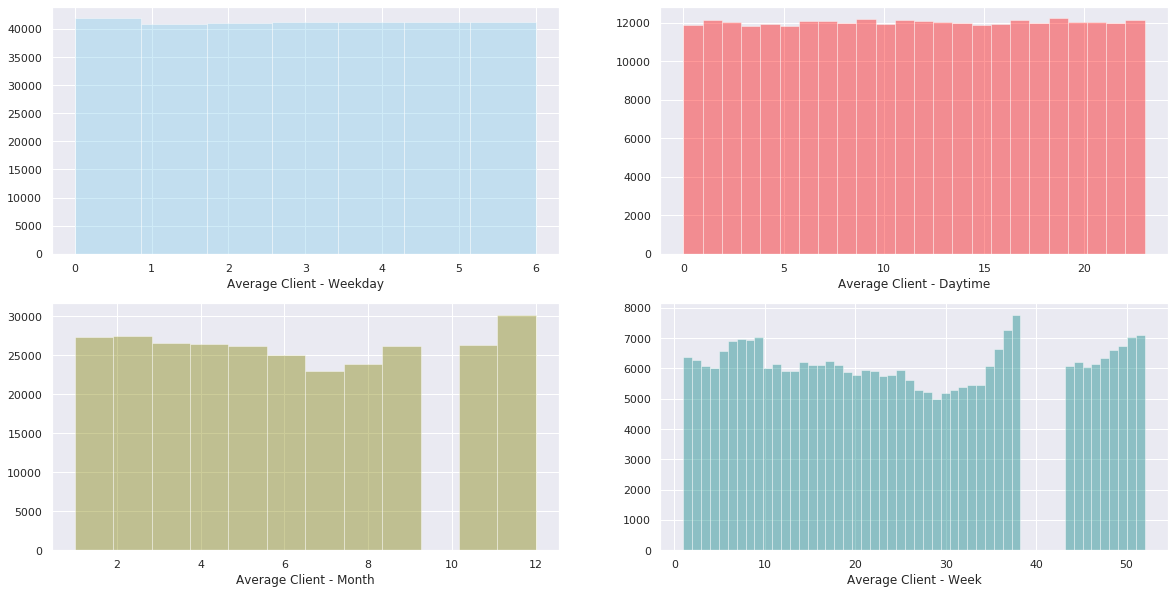

In [56]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['weekday'], axlabel='Average Client - Weekday', color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['daytime'], axlabel='Average Client - Daytime', color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['month'], axlabel='Average Client - Month', color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['week'], axlabel='Average Client - Week', color="teal", kde=False, bins=52, ax=axes[1, 1])

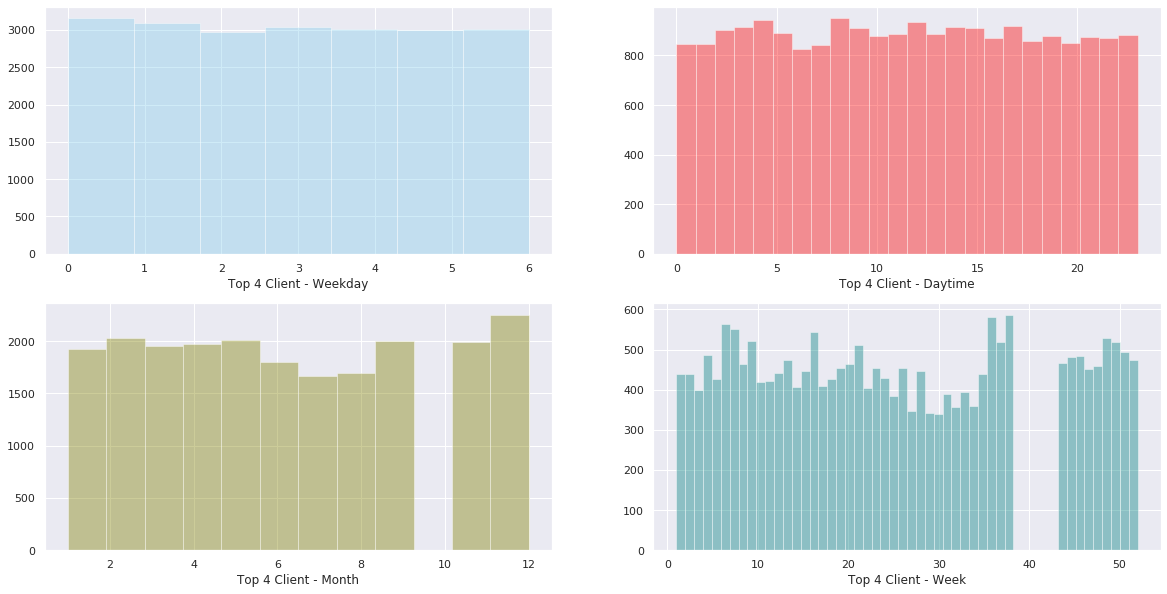

In [57]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['weekday'], axlabel='Top 4 Client - Weekday', color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['daytime'], axlabel='Top 4 Client - Daytime', color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['month'], axlabel='Top 4 Client - Month', color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['week'], axlabel='Top 4 Client - Week', color="teal", kde=False, bins=52, ax=axes[1, 1])

Nous constatons que le Top 4 Client n'a pas une influence significative sur la répartition des achats dans la semaine ou dans la journée. Egalement, le mois d'octobre est vide, puisque nous l'avons enlever les données qui étaient erronées.

### D. Colonne *session_amount*, *session_nb_produit*  et *session_categ*

#### DataFrame avec tous les clients

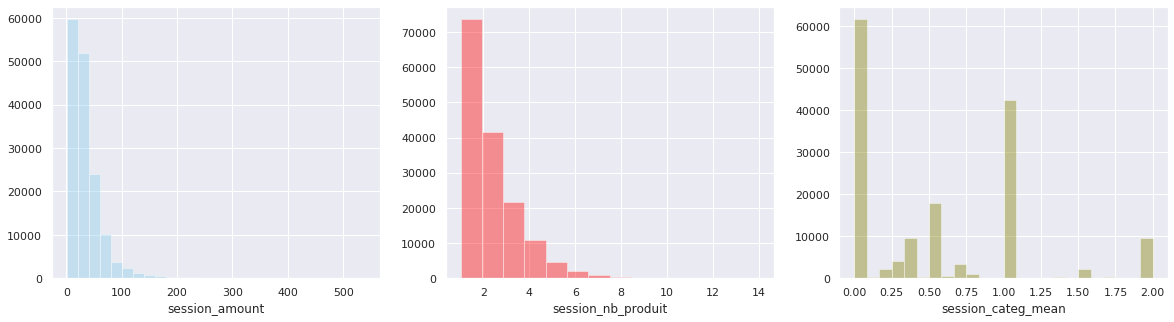

In [58]:
f, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.distplot(df_transactions.drop_duplicates('session_id')['session_amount'], color="skyblue", kde=False, bins=27, ax=axes[0])
sns.distplot(df_transactions.drop_duplicates('session_id')['session_nb_produit'], color="red", kde=False, bins=14, ax=axes[1])
sns.distplot(df_transactions.drop_duplicates('session_id')['session_categ_mean'], color="olive", kde=False, bins=24, ax=axes[2])

Les paniers sont d'un montant entre 0.69 et 40 euros.

#### DataFrame sans le top 4 clients

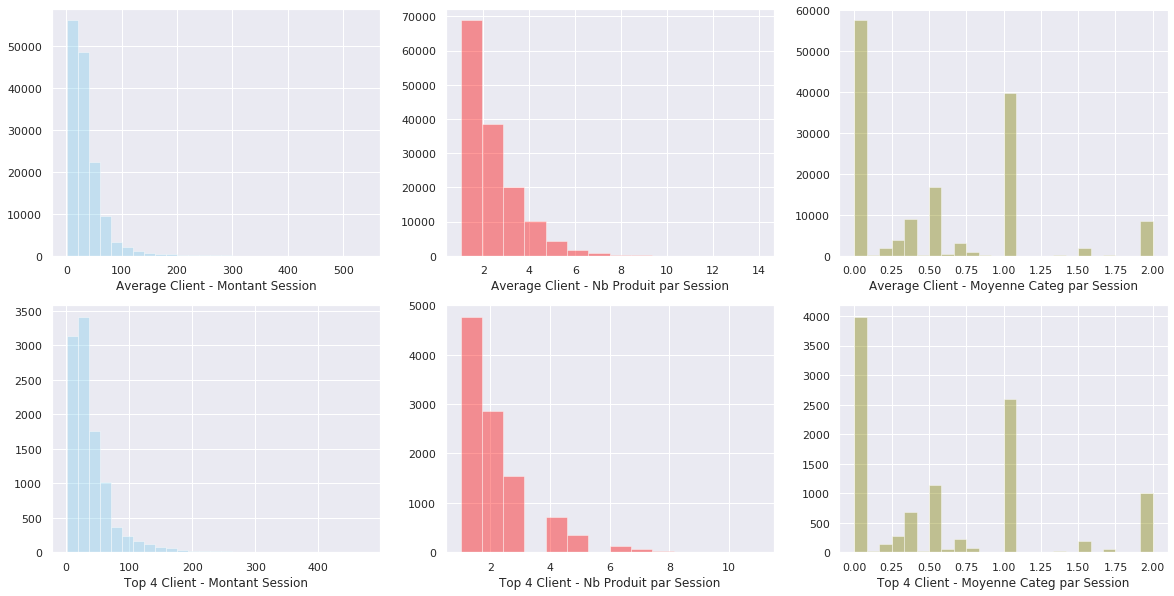

In [59]:
f, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4].drop_duplicates('session_id')['session_amount'], axlabel='Average Client - Montant Session', color="skyblue", kde=False, bins=27, ax=axes[0, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4].drop_duplicates('session_id')['session_nb_produit'], axlabel='Average Client - Nb Produit par Session', color="red", kde=False, bins=14, ax=axes[0, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4].drop_duplicates('session_id')['session_categ_mean'], axlabel='Average Client - Moyenne Categ par Session', color="olive", kde=False, bins=24, ax=axes[0, 2])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5].drop_duplicates('session_id')['session_amount'], axlabel='Top 4 Client - Montant Session', color="skyblue", kde=False, bins=27, ax=axes[1, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5].drop_duplicates('session_id')['session_nb_produit'], axlabel='Top 4 Client - Nb Produit par Session', color="red", kde=False, bins=14, ax=axes[1, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5].drop_duplicates('session_id')['session_categ_mean'], axlabel='Top 4 Client - Moyenne Categ par Session', color="olive", kde=False, bins=24, ax=axes[1, 2])

### E. Conclusion

Nous avons 4 gros clients qui représentent plus de 7 % du montant des transactions et plus de 6 % du total des transactions, ils ont malgré tout, peu d'influence sur le profil des ventes. Néanmoins, nous approfondirons cela dans la 5e partie, pour essayer de determiner le profil de ces clients.


Les principaux clients sont dans la tranche 30 - 49 ans. Après cette age, nous avons des clients ponctuels effectuant un achat souvent unique, qui semblent peu familiers avec des achats sur internet. En dessous de 30 ans, nous avons peu de clients, alors qu'ils sont généralement lecteurs, et plus connectés à Internet. Ce point devra être developpé afin de determiner les causes.


Les livres les plus vendus sont dans une fourchette de 10 et 12 euros, la majorité des ventes de livres étant entre 6 et 18 euros. Nous allons analyser ces données pour conaaître les produits les plus vendus, ainsi que la répartition par *categ*


Finalement, nous avons constaté que l'heure et le jour d'achat n'avaient pas d'influence sur le volume des ventes. Par contre, il existe deux périodes, Septembre / Octobre et Novembre / Décembre, où les ventes s'écartent de la moyenne annuelle. Nous allons, également, tâcher de comprendre les raisons de ces écarts.

## 5. Analyses des données

### A. Produits les plus vendus

#### Les livres les plus vendus en terme de prix et de volume

In [60]:
df_transactions[['id_prod', 'price', 'categ', 'book_total_price', 'book_rank_price', 'book_total_sold', 'book_rank_sold']].drop_duplicates('id_prod').nsmallest(10, 'book_rank_price')

id_prod   price  categ  book_total_price  book_rank_price  \
208941   2_135   68.99      2          31873.38              1.0   
258071   2_112   67.57      2          29122.67              2.0   
85602    2_102   59.14      2          26967.84              3.0   
175620   2_209   69.99      2          25616.34              4.0   
5983     1_369   23.99      1          25429.40              5.0   
22646    1_395   28.99      1          25047.36              6.0   
295684   2_110   62.25      2          24962.25              7.0   
149245   1_383   28.99      1          24206.65              8.0   
299693   2_166  230.04      2          23924.16              9.0   
57470    1_414   23.83      1          23782.34             10.0   

        book_total_sold  book_rank_sold  
208941              462           141.5  
258071              431           172.0  
85602               456           149.0  
175620              366           240.0  
5983               1060             1.0  
22646               864            14.0  
295684              401           198.5  
149245              835            20.0  
299693              104           840.5  
57470               998             4.0

In [61]:
df_transactions[['id_prod', 'price', 'categ', 'book_total_price', 'book_rank_price', 'book_total_sold', 'book_rank_sold']].drop_duplicates('id_prod').nsmallest(10, 'book_rank_sold')

id_prod  price  categ  book_total_price  book_rank_price  \
5983     1_369  23.99      1          25429.40              5.0   
64877    1_417  20.99      1          21619.70             20.0   
96293    1_498  23.37      1          23673.81             11.0   
57470    1_414  23.83      1          23782.34             10.0   
132687   1_425  16.99      1          16769.13             33.0   
105416   1_406  24.81      1          23023.68             14.0   
69033    1_398  10.17      1           9386.91            126.0   
45674    1_413  17.99      1          16532.81             36.0   
33372    1_403  17.99      1          16514.82             37.0   
1882     1_407  15.99      1          14598.87             51.0   

        book_total_sold  book_rank_sold  
5983               1060             1.0  
64877              1030             2.0  
96293              1013             3.0  
57470               998             4.0  
132687              987             5.0  
105416              928             6.0  
69033               923             7.0  
45674               919             8.0  
33372               918             9.0  
1882                913            10.0

#### Les livres les plus vendus en terme de volume

In [62]:
df_transactions[['id_prod', 'price', 'categ', 'cat_age', 'book_total_price', 'book_rank_price', 'book_total_sold', 'book_rank_sold']].drop_duplicates('id_prod').nsmallest(100, 'book_rank_sold')['categ'].value_counts()

1    67
0    33
Name: categ, dtype: int64

Pour cette partie, nous allons prendre l'ancien Data Frame pour mettre en évidence le volume de vente nulle de *categ* 1 en Octobre.

In [63]:
df_transactions_w_october[['id_prod','price']].groupby('id_prod').count().nlargest(10, 'price')

price
id_prod       
1_369     1081
1_417     1062
1_498     1036
1_414     1027
1_425     1013
1_398      952
1_406      946
1_413      944
1_403      939
1_407      933

In [64]:
bestProduct = df_transactions_w_october.groupby('id_prod').count().nlargest(10, 'price').index
df_transactions_best_product = df_transactions_w_october[df_transactions_w_october['id_prod'].isin(bestProduct)]
df_transactions_best_product[['id_prod', 'price', 'categ']].drop_duplicates('id_prod')

id_prod  price  categ
2073     1_407  15.99      1
6509     1_369  23.99      1
36122    1_403  17.99      1
49351    1_413  17.99      1
62012    1_414  23.83      1
70003    1_417  20.99      1
74517    1_398  10.17      1
103857   1_498  23.37      1
113812   1_406  24.81      1
143520   1_425  16.99      1

Les 10 produits les plus vendus font tous partie de la *categ* 1, avec un prix variant de 10.17 à 24.81. Le premier livre d'une autre *categ* est en 43ème position.

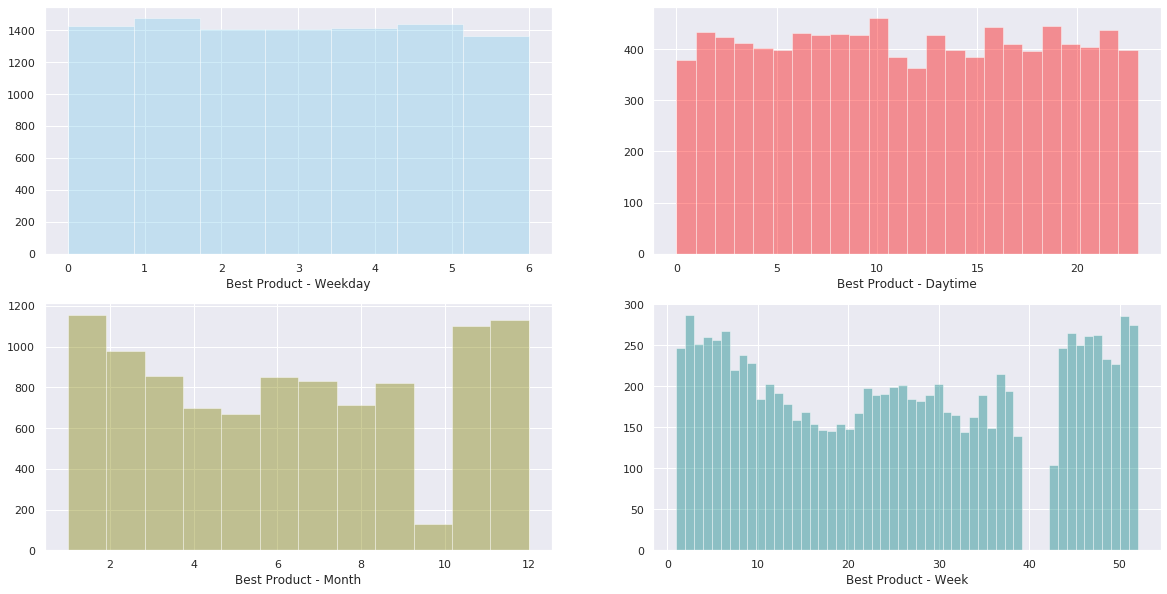

In [65]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions_best_product['weekday'], axlabel='Best Product - Weekday', color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions_best_product['daytime'], axlabel='Best Product - Daytime', color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions_best_product['month'], axlabel='Best Product - Month', color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions_best_product['week'], axlabel='Best Product - Week', color="teal", kde=False, bins=52, ax=axes[1, 1])

Nous remarquons, dans le dernier graphique, qu'il n'y a pas eu de ventes pendant 3 semaines en Octobre. Est-ce simplement les meilleurs produits, ou cela s'étends sur d'autres produits ?

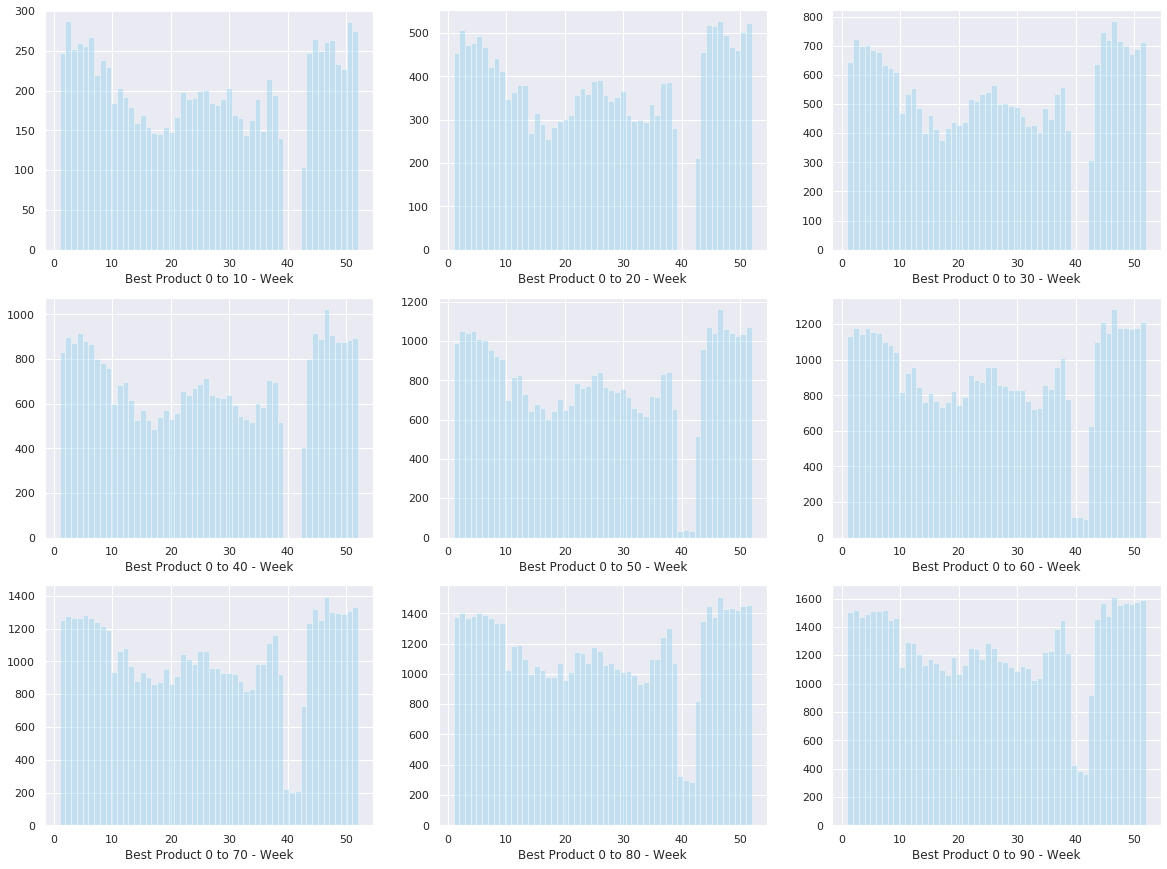

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for i in range(9):
    j = i + 1
    df = df_transactions_w_october[df_transactions_w_october['id_prod'].isin(df_transactions_w_october.groupby('id_prod').count().nlargest(j * 10, 'price').index)]
    sns.distplot(df['week'], axlabel=f'Best Product 0 to {j * 10} - Week', color="skyblue", kde=False, bins=52, ax=axes[i//3, i%3])

Nous voyons que progrssivement, à partir du 40e produit, nous avons de nouveau des ventes en prendant ces trois semaines en Octobre. Nous allons regarder cette période.

In [67]:
df_transactions_w_october[df_transactions_w_october['week'].between(40, 42)].drop_duplicates('id_prod').describe()

birth        price        categ          age      cat_age  \
count  1736.000000  1736.000000  1736.000000  1736.000000  1736.000000   
mean   1979.790899    17.429487     0.156682    41.209101     1.967742   
std      10.291573    26.712932     0.537570    10.291573     0.367399   
min    1931.000000     0.620000     0.000000    17.000000     1.000000   
25%    1975.000000     6.250000     0.000000    35.000000     2.000000   
50%    1980.000000    10.990000     0.000000    41.000000     2.000000   
75%    1986.000000    16.052500     0.000000    46.000000     2.000000   
max    2004.000000   247.220000     2.000000    90.000000     3.000000   

         cat_age_2    cat_price      weekday      daytime   month  \
count  1736.000000  1736.000000  1736.000000  1736.000000  1736.0   
mean      2.047811     1.939516     3.166475    11.421083    10.0   
std       0.509863     0.548852     1.988568     7.030243     0.0   
min       1.000000     1.000000     0.000000     0.000000    10.0   
25%       2.000000     2.000000     1.000000     5.000000    10.0   
50%       2.000000     2.000000     3.000000    11.000000    10.0   
75%       2.000000     2.000000     5.000000    18.000000    10.0   
max       3.000000     3.000000     6.000000    23.000000    10.0   

              week    year  
count  1736.000000  1736.0  
mean     40.985023  2021.0  
std       0.804028     0.0  
min      40.000000  2021.0  
25%      40.000000  2021.0  
50%      41.000000  2021.0  
75%      42.000000  2021.0  
max      42.000000  2021.0

Nous allons calculer le pourcentage de produits vendu par rapport à la moyenne habituelle.

In [68]:
sell_product = []
for i in range (1, 52):
    sell_product.append(df_transactions_w_october[df_transactions_w_october['week'].between(i, i+2)].drop_duplicates('id_prod').shape[0] / products.count()['id_prod'] * 100)
    
moy_product = np.mean(sell_product)

In [69]:
f"Nous avons vendu seulement {(df_transactions_w_october[df_transactions_w_october['week'].between(40, 42)].drop_duplicates('id_prod').shape[0]) / products.count()['id_prod'] * 100:0.2f} % de l'ensemble des produits présents sur le site au lieu de {moy_product:0.2f} %"

"Nous avons vendu seulement 52.81 % de l'ensemble des produits présents sur le site au lieu de 67.80 %"

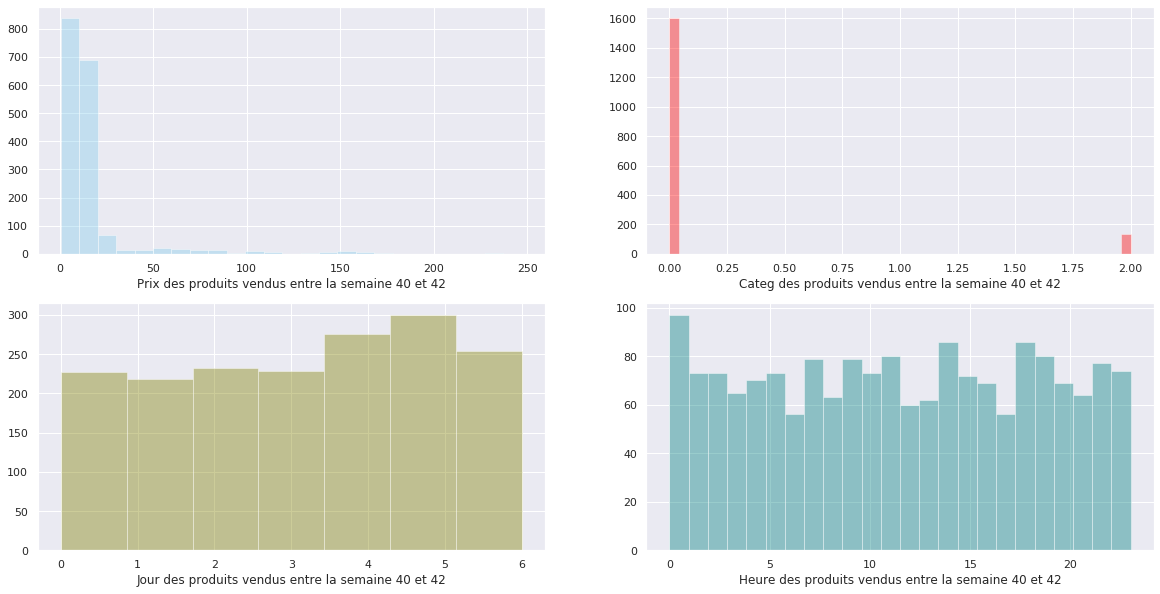

In [70]:
df = df_transactions_w_october[df_transactions_w_october['week'].between(40, 42)].drop_duplicates('id_prod')

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df['price'], axlabel='Prix des produits vendus entre la semaine 40 et 42', color="skyblue", kde=False, bins=25, ax=axes[0, 0])
sns.distplot(df['categ'], axlabel='Categ des produits vendus entre la semaine 40 et 42', color="red", kde=False, bins=50, ax=axes[0, 1])
sns.distplot(df['weekday'], axlabel='Jour des produits vendus entre la semaine 40 et 42', color="olive", kde=False, bins=7, ax=axes[1, 0])
sns.distplot(df['daytime'], axlabel='Heure des produits vendus entre la semaine 40 et 42', color="teal", kde=False, bins=24, ax=axes[1, 1])

Nous remarquons qu'aucun livre de *categ* 1 n'a été vendu durant cette période. Est-ce une erreur ? Nous allons comparer le pourcentage de vente de *categ* 1 sur l'année et le comparer à la différence sur cette période.

In [71]:
sell_product = []
sell_product_categ_0 = []
sell_product_categ_1 = []
sell_product_categ_2 = []

for i in range (1, 53):
    sell_product.append(df_transactions_w_october[(df_transactions_w_october['week'] == i)].drop_duplicates('id_prod').shape[0] / products.count()['id_prod'] * 100)
    sell_product_categ_0.append(df_transactions_w_october[(df_transactions_w_october['week'] == i) & (df_transactions_w_october['categ'] == 0)].shape[0] / df_transactions_w_october[df_transactions_w_october['week'] == i].count()['id_prod'] * 100)
    sell_product_categ_1.append(df_transactions_w_october[(df_transactions_w_october['week'] == i) & (df_transactions_w_october['categ'] == 1)].shape[0] / df_transactions_w_october[df_transactions_w_october['week'] == i].count()['id_prod'] * 100)
    sell_product_categ_2.append(df_transactions_w_october[(df_transactions_w_october['week'] == i) & (df_transactions_w_october['categ'] == 2)].shape[0] / df_transactions_w_october[df_transactions_w_october['week'] == i].count()['id_prod'] * 100)
    
moy_product = np.mean(sell_product_categ_1)

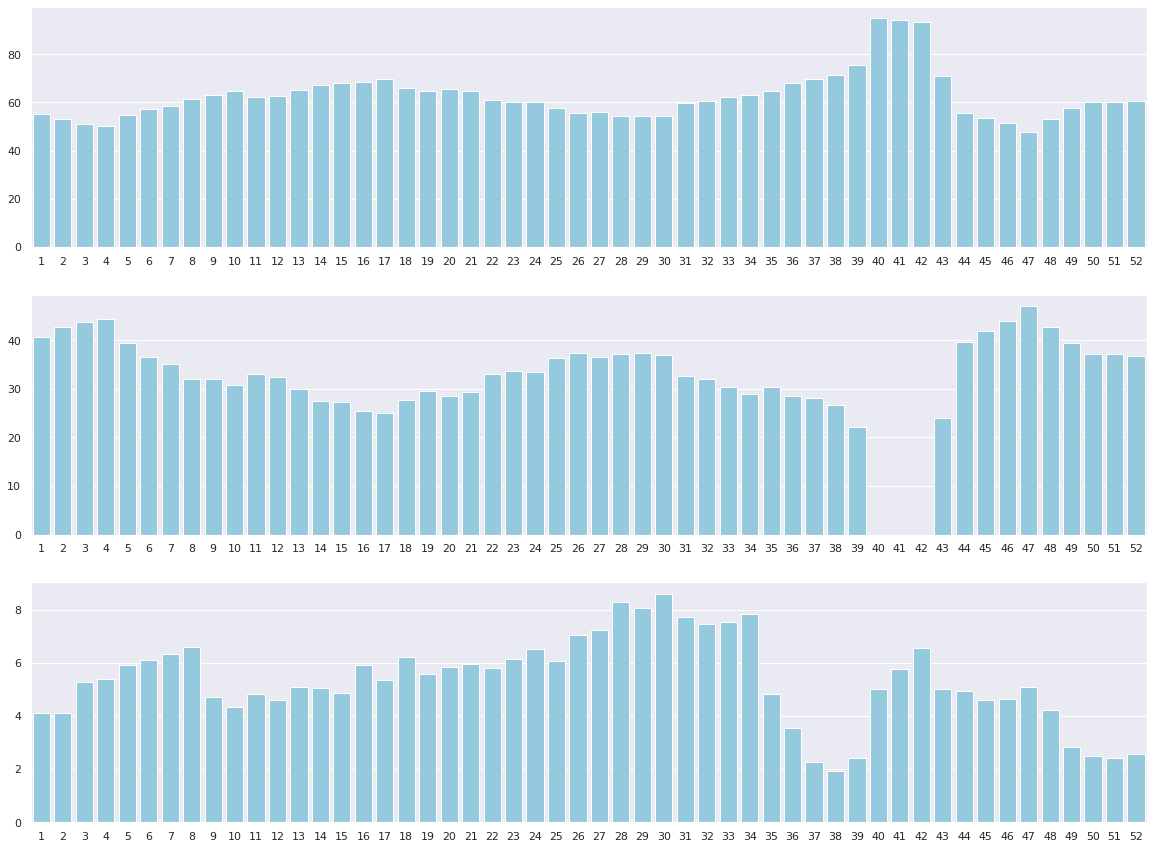

In [72]:
x = pd.Series(range(1,53))

fig, axes = plt.subplots(3, 1, figsize=(20, 15))
sns.barplot(x=x, y=pd.Series(sell_product_categ_0), color="skyblue", ax=axes[0])
sns.barplot(x=x, y=pd.Series(sell_product_categ_1), color="skyblue", ax=axes[1])
sns.barplot(x=x, y=pd.Series(sell_product_categ_2), color="skyblue", ax=axes[2])

Nous constatons bien le fait qu'il n'y ai pas eu de vente durant les semaines 40 à 42, et un volume plus faible durant les semaines 39 et 43. Ainsi, pour garder un data Frame homogène, nous avons enlever ses 5 semaines.

Nous allons reprendre notre Data Frame corrigé pour reprendre l'analyse des données

#### Analyse par rapport l'age des acheteurs

##### Pour tous les livres

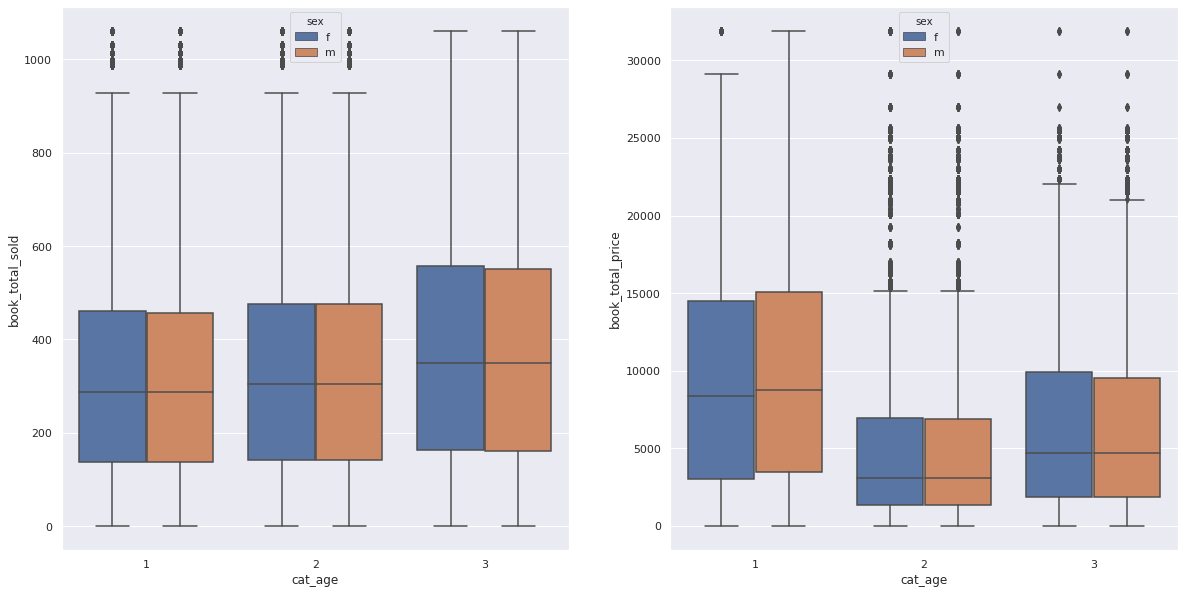

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions, hue= 'sex', ax=axes[0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions, hue= 'sex', ax=axes[1])

Nous constatons que, pour le volume d'age, les quantité sont sensiblement les même pour chaque catégorie d'age. Par contre, nous voyons que la catégorie d'age des moins de 30 ans ont une dispersion et une médiane plus grande que les autres catégories pour le montant dépensé.

##### Pour le top 100

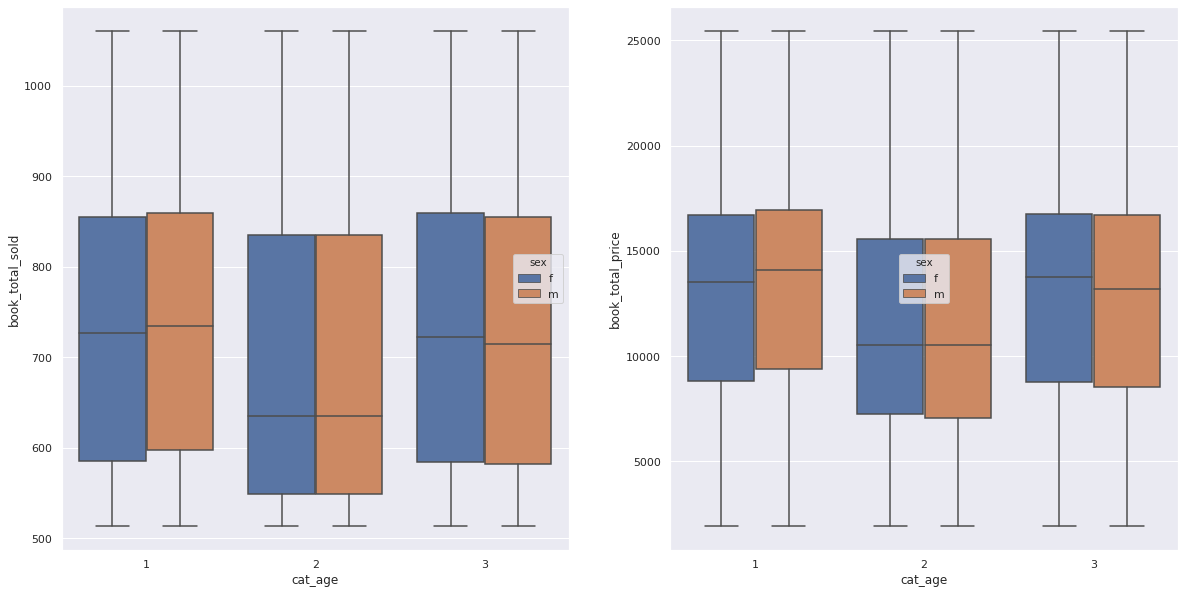

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[1])

Nous voyons que la catégorie d'age intermédiaire a une dispersion et une médiane plus petite que les autres catégorie pour le montant dépensé et le volume acheté pour les livres les plus achetés

##### Pour les livres autres que le Top 100

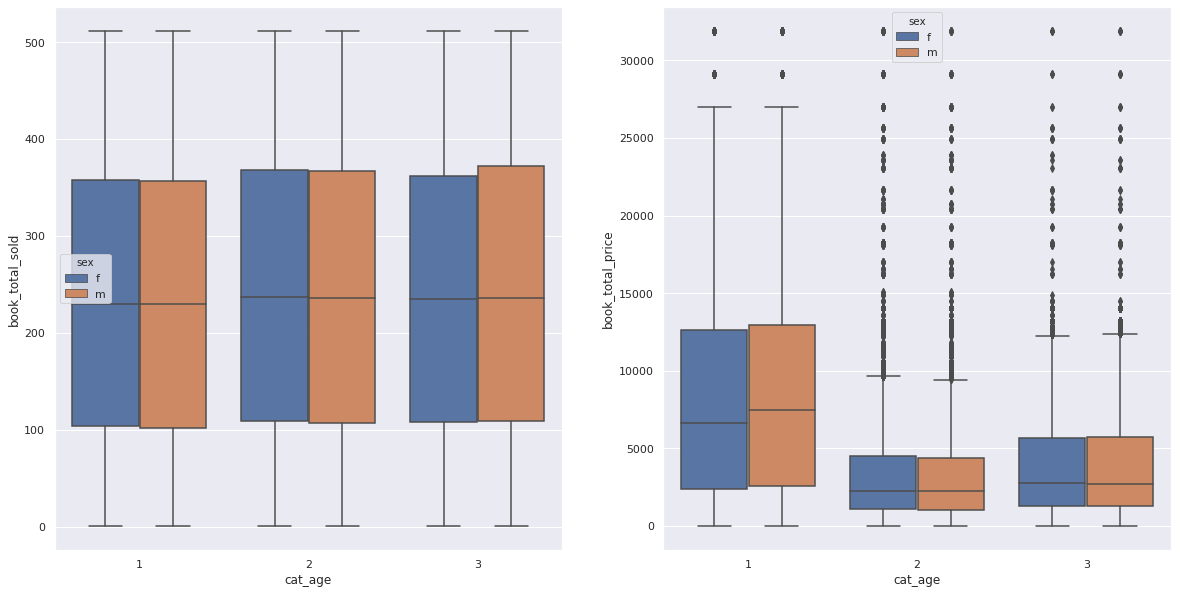

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[1])

Nous voyons que la catégorie d'age des moins de 30 ans a une dispersion et une médiane plus grande que les autres catégorie pour le montant dépensé pour les autres livres que ceux du Top 100.

##### Avec et sans les Top 4 Clients pour tous les livres

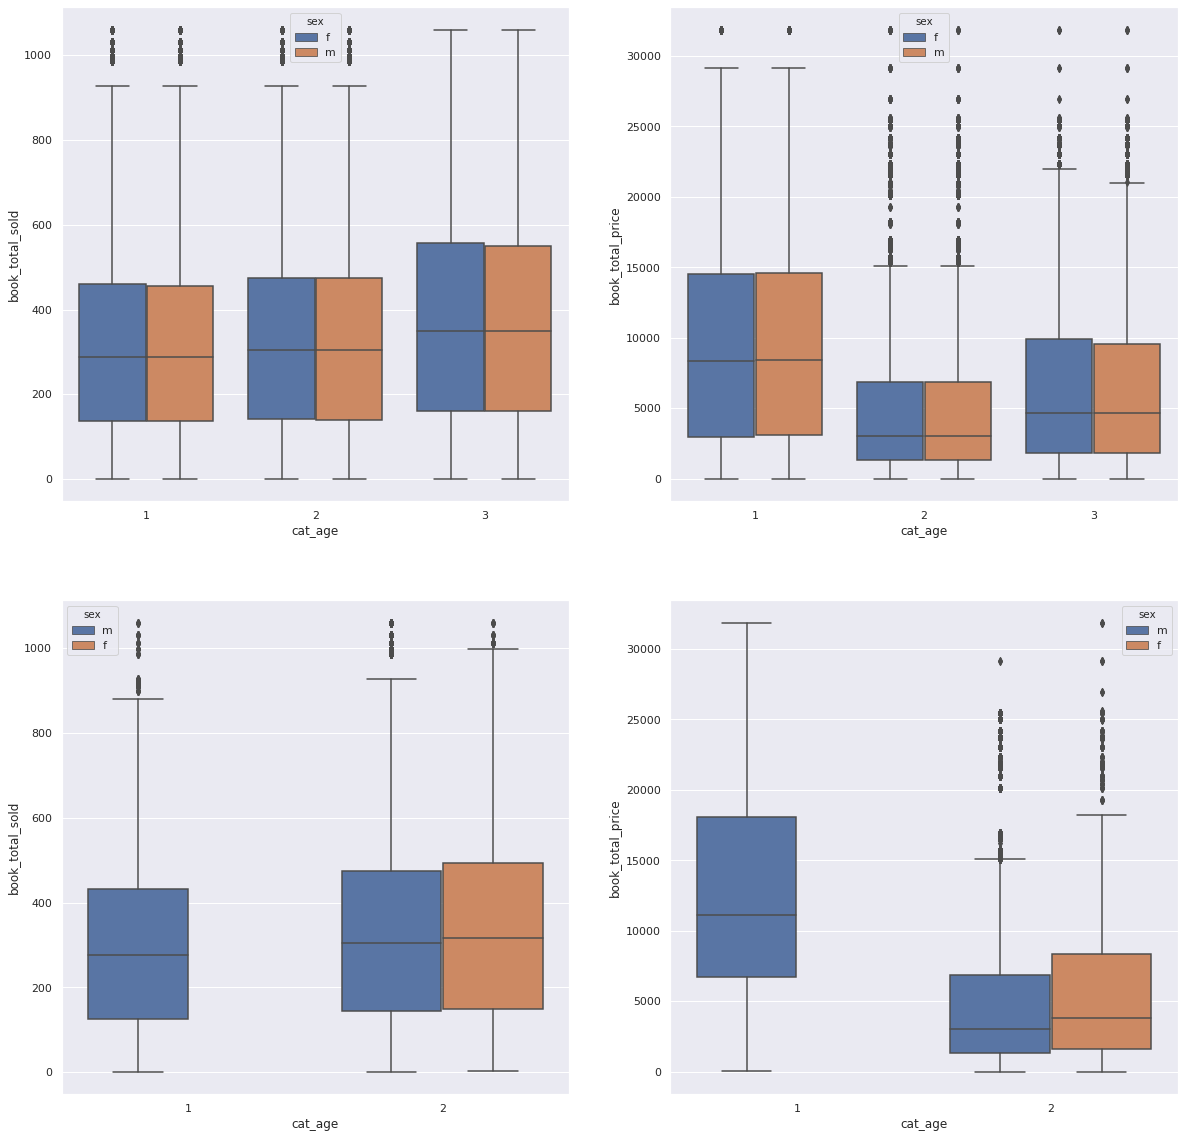

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions[df_transactions['montant_total_rang'] > 4], hue='sex', ax=axes[0, 0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions[df_transactions['montant_total_rang'] > 4], hue='sex', ax=axes[0, 1])
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions[df_transactions['montant_total_rang'] < 5], hue='sex', ax=axes[1, 0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions[df_transactions['montant_total_rang'] < 5], hue='sex', ax=axes[1, 1])

Nous retrouvons la même représentations des acheteurs avec ou sans le Top 4 clients. De plus, ces clients se comportent de la même façon que leur categorie d'age.

##### Avec et sans les Top 4 Clients pour le Top 100

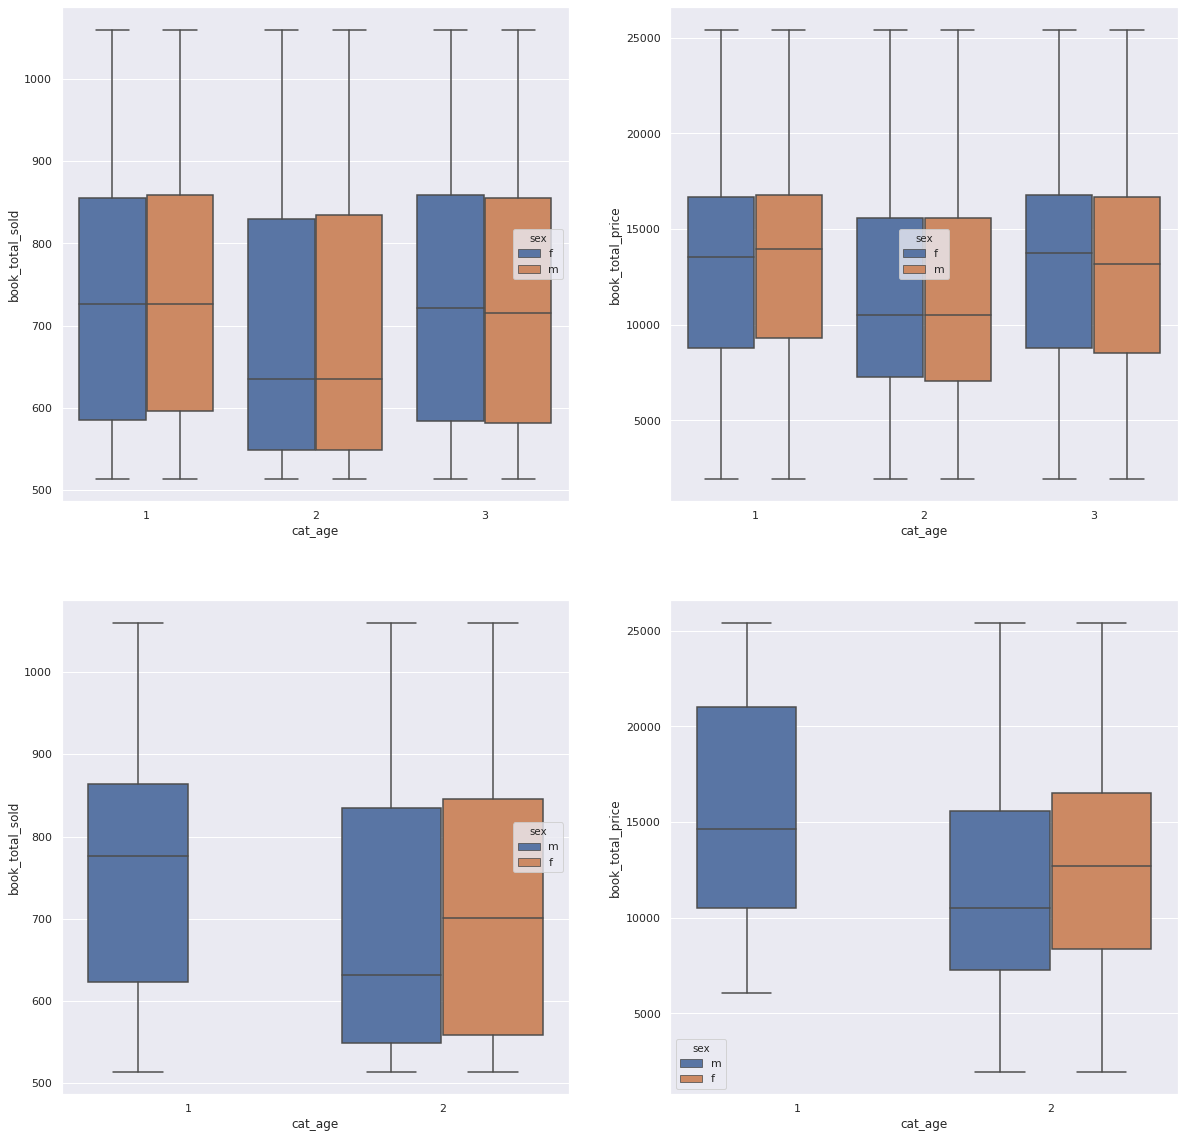

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='cat_age', y='book_total_sold', data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['book_rank_sold'] < 101)], hue= 'sex', ax=axes[0, 0])
sns.boxplot(x='cat_age', y='book_total_price', data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['book_rank_sold'] < 101)], hue= 'sex', ax=axes[0, 1])
sns.boxplot(x='cat_age', y='book_total_sold', data=df_transactions[(df_transactions['montant_total_rang'] < 5) & (df_transactions['book_rank_sold'] < 101)], hue= 'sex', ax=axes[1, 0])
sns.boxplot(x='cat_age', y='book_total_price', data=df_transactions[(df_transactions['montant_total_rang'] < 5) & (df_transactions['book_rank_sold'] < 101)], hue= 'sex', ax=axes[1, 1])

Nous retrouvons la même représentations des acheteurs avec ou sans le Top 4 clients.


##### Avec et sans les Top 4 Clients pour les livres autres que le Top 100

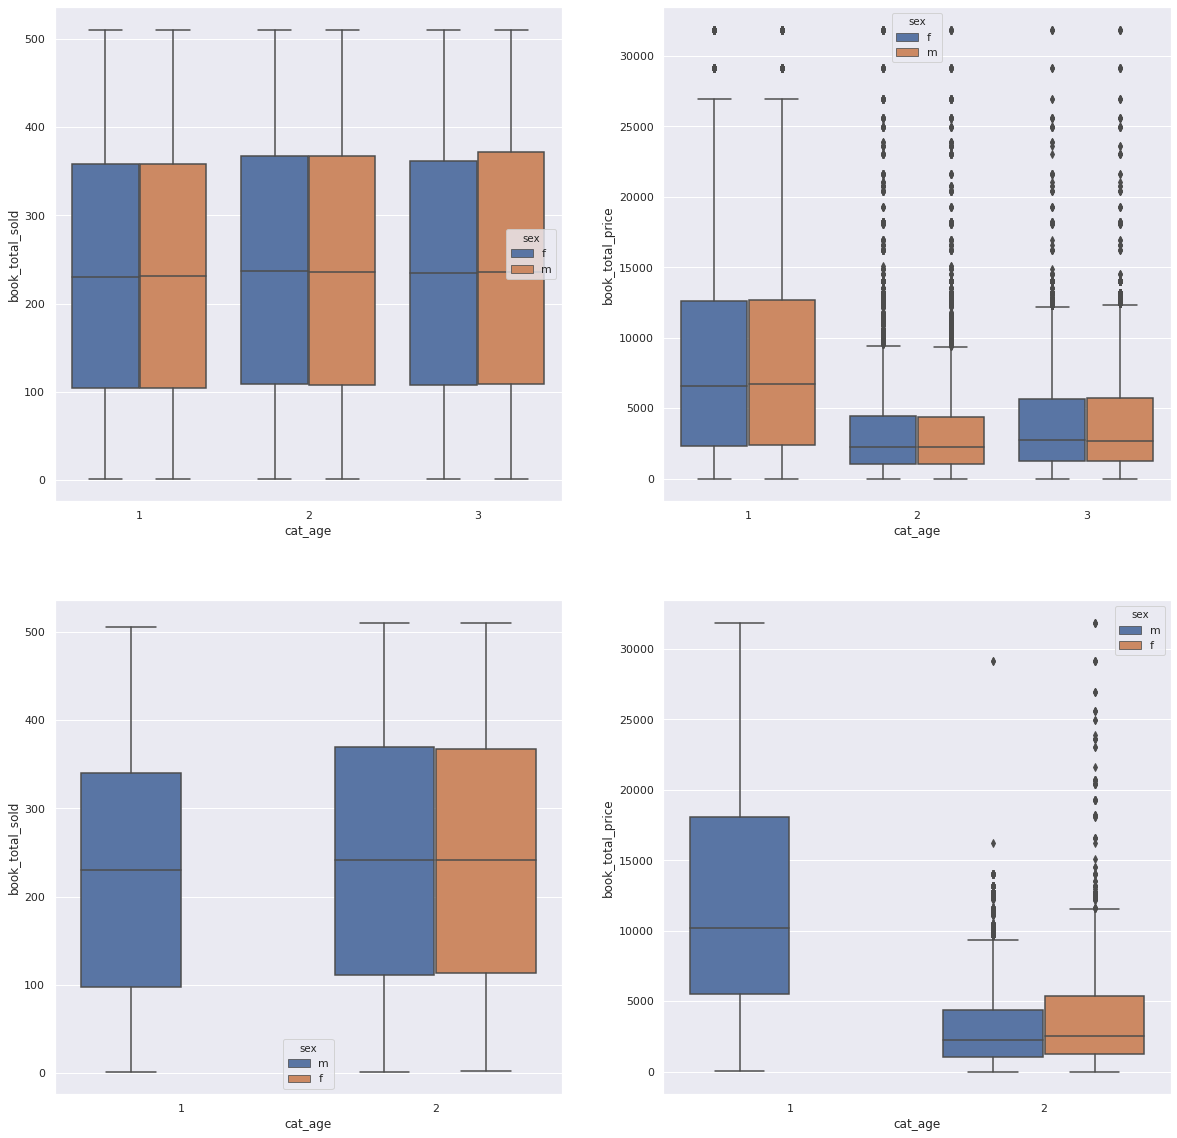

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='cat_age', y='book_total_sold', data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['book_rank_sold'] > 100)], hue= 'sex', ax=axes[0, 0])
sns.boxplot(x='cat_age', y='book_total_price', data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['book_rank_sold'] > 100)], hue= 'sex', ax=axes[0, 1])
sns.boxplot(x='cat_age', y='book_total_sold', data=df_transactions[(df_transactions['montant_total_rang'] < 5) & (df_transactions['book_rank_sold'] > 100)], hue= 'sex', ax=axes[1, 0])
sns.boxplot(x='cat_age', y='book_total_price', data=df_transactions[(df_transactions['montant_total_rang'] < 5) & (df_transactions['book_rank_sold'] > 100)], hue= 'sex', ax=axes[1, 1])

Pour conclure, nous pouvons dire que la catégorie d'age n'a que peu d'influence sur le volume des ventes, mais que la catégorie d'age des moins de 30 ans avait une médiane de montant d'achat plus élevée que les autres catégories.

#### Analyse par rapport la catégorie des articles

##### Pour tous les livres

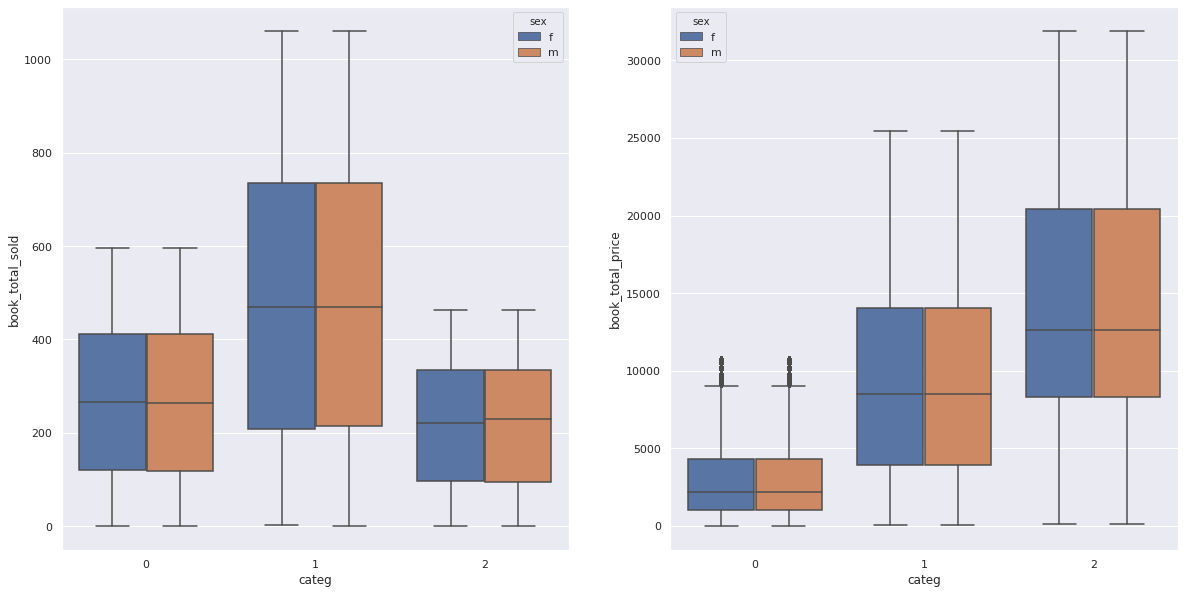

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='categ', y='book_total_sold',data=df_transactions, hue='sex', ax=axes[0])
sns.boxplot(x='categ', y='book_total_price',data=df_transactions, hue='sex', ax=axes[1])

Nouc constatons que la dispersion est plus grande et la médiane plus élevée pour les livres de la *categ* 1 pour les volumes vendus. Sans surprise, pour les montants ce sont les livres de la *categ* 2 qui ont la plus grande dispersion.

##### Pour le top 100

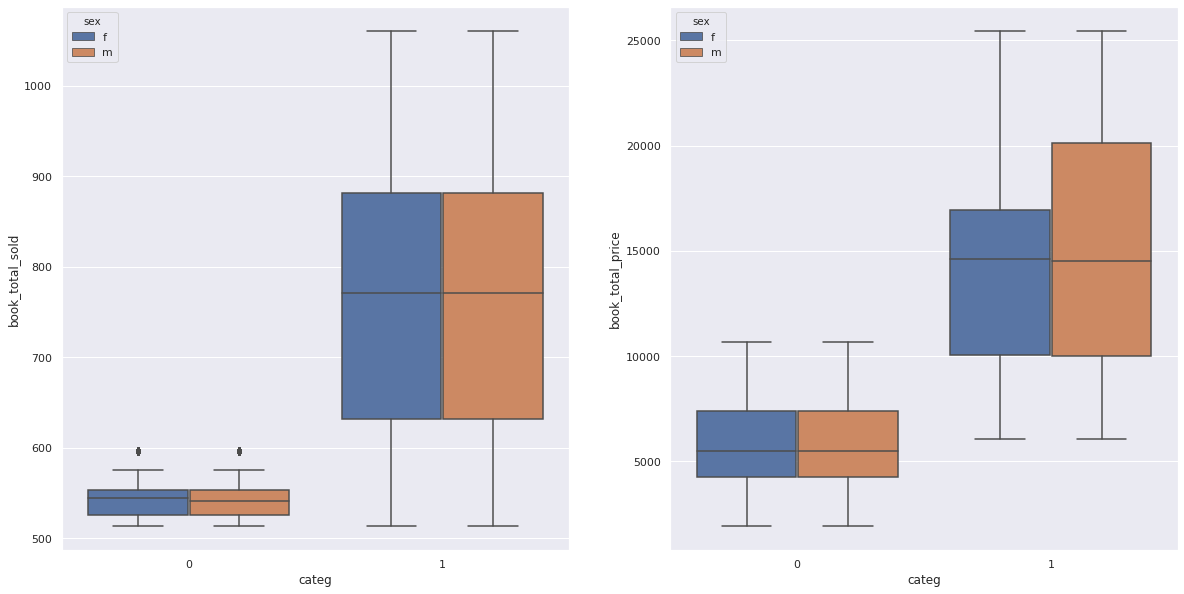

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='categ', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[0])
sns.boxplot(x='categ', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[1])

Nous remarquons que la dispersion chez les hommes achetant la *categ* 1 du Top 100 des livres est plus grande pour les 50 % des montant des achats.

##### Pour les livres autres que le Top 100

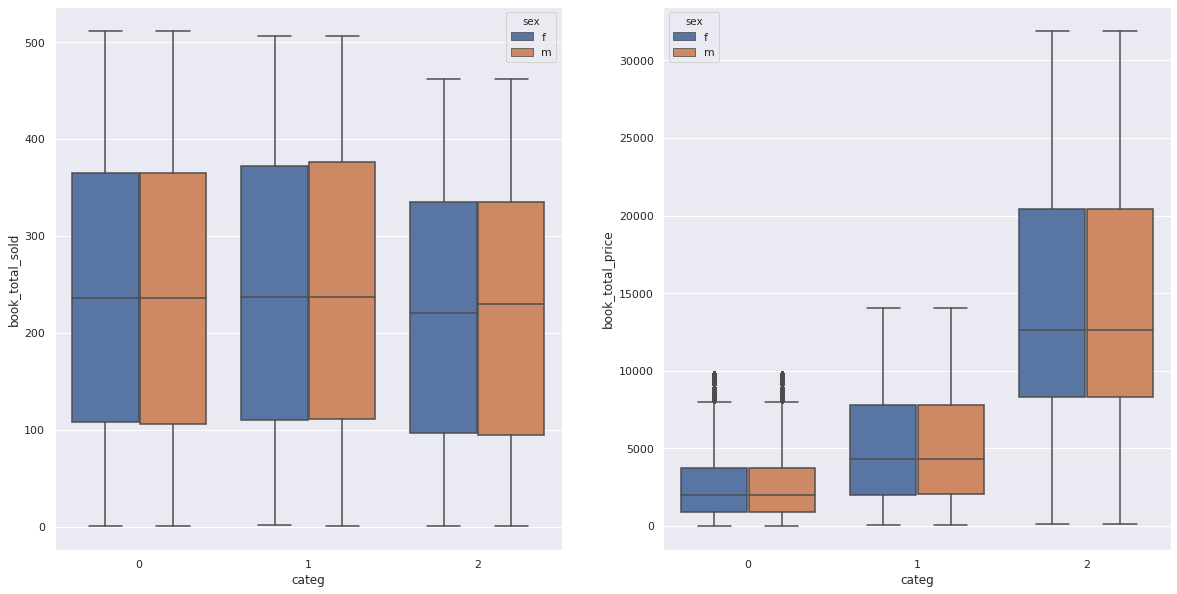

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='categ', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[0])
sns.boxplot(x='categ', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[1])

Nous constatons que, pour les livres n'appartenant pas au Top 100, les comportements d'achat en volume sont les mêmes quel que soit la *categ*

#### Analyse par rapport aux achats

##### Pour tous les livres

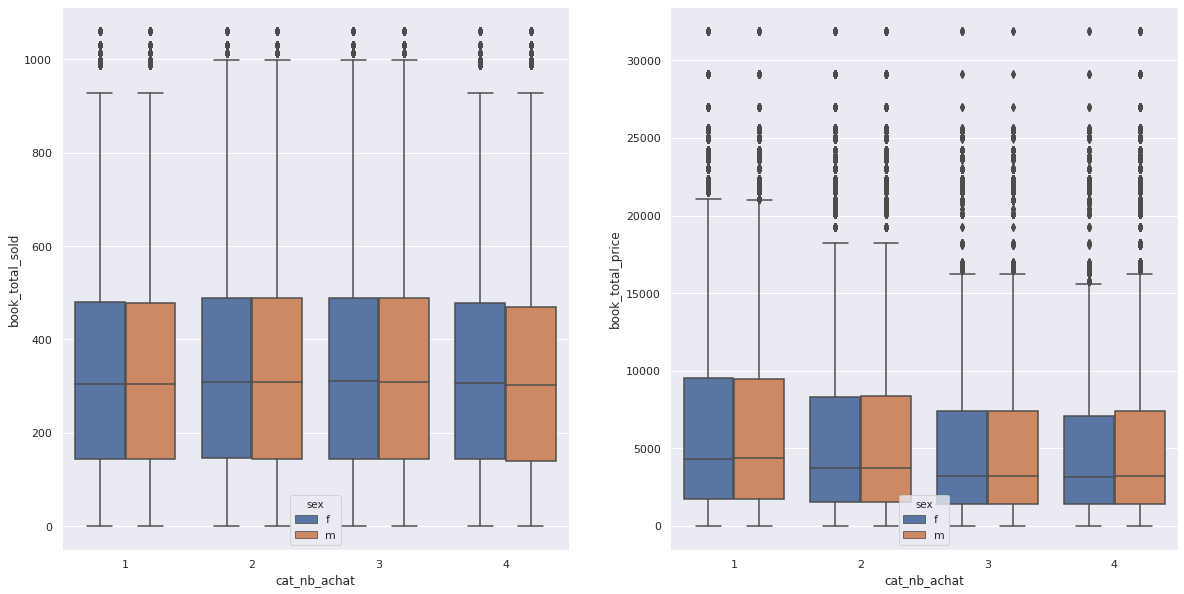

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_nb_achat', y='book_total_sold',data=df_transactions, hue='sex', ax=axes[0])
sns.boxplot(x='cat_nb_achat', y='book_total_price',data=df_transactions, hue='sex', ax=axes[1])

Les comportement d'achat sont les mêmes quel que soit le nombre de sessions des clients. Il semble que la médiane des clients ayant le moins de session est plus élevée que les autres catégories.

##### Pour le top 100

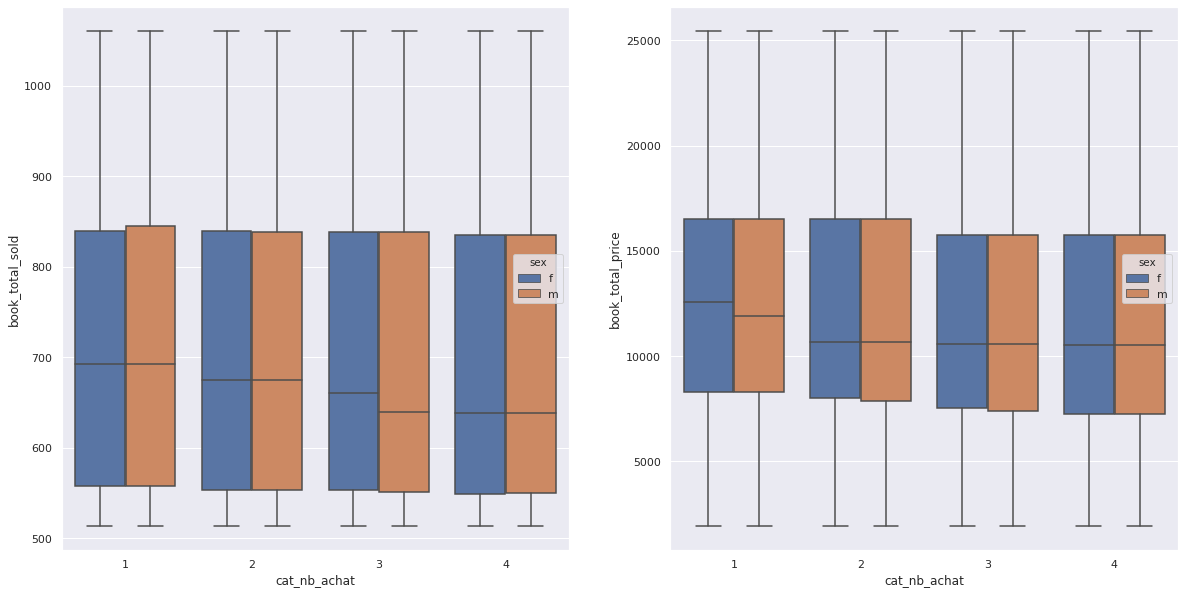

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_nb_achat', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[0])
sns.boxplot(x='cat_nb_achat', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[1])

Les comportement d'achat sont les mêmes quel que soit le nombre de sessions des clients pour le top 100 des livres

##### Pour les livres autres que le Top 100

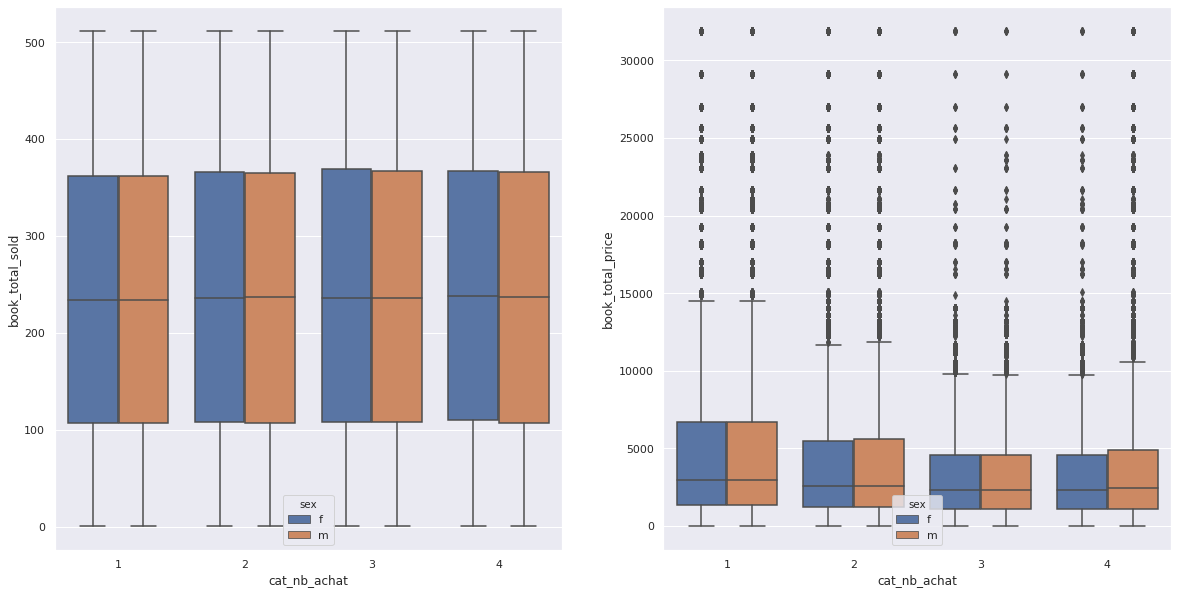

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_nb_achat', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[0])
sns.boxplot(x='cat_nb_achat', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[1])

Les comportement d'achat sont les mêmes quel que soit le nombre de sessions des clients pour les livres autre que le top 100.

### B. Les meilleurs clients

#### Analyse par rapport l'age des acheteurs

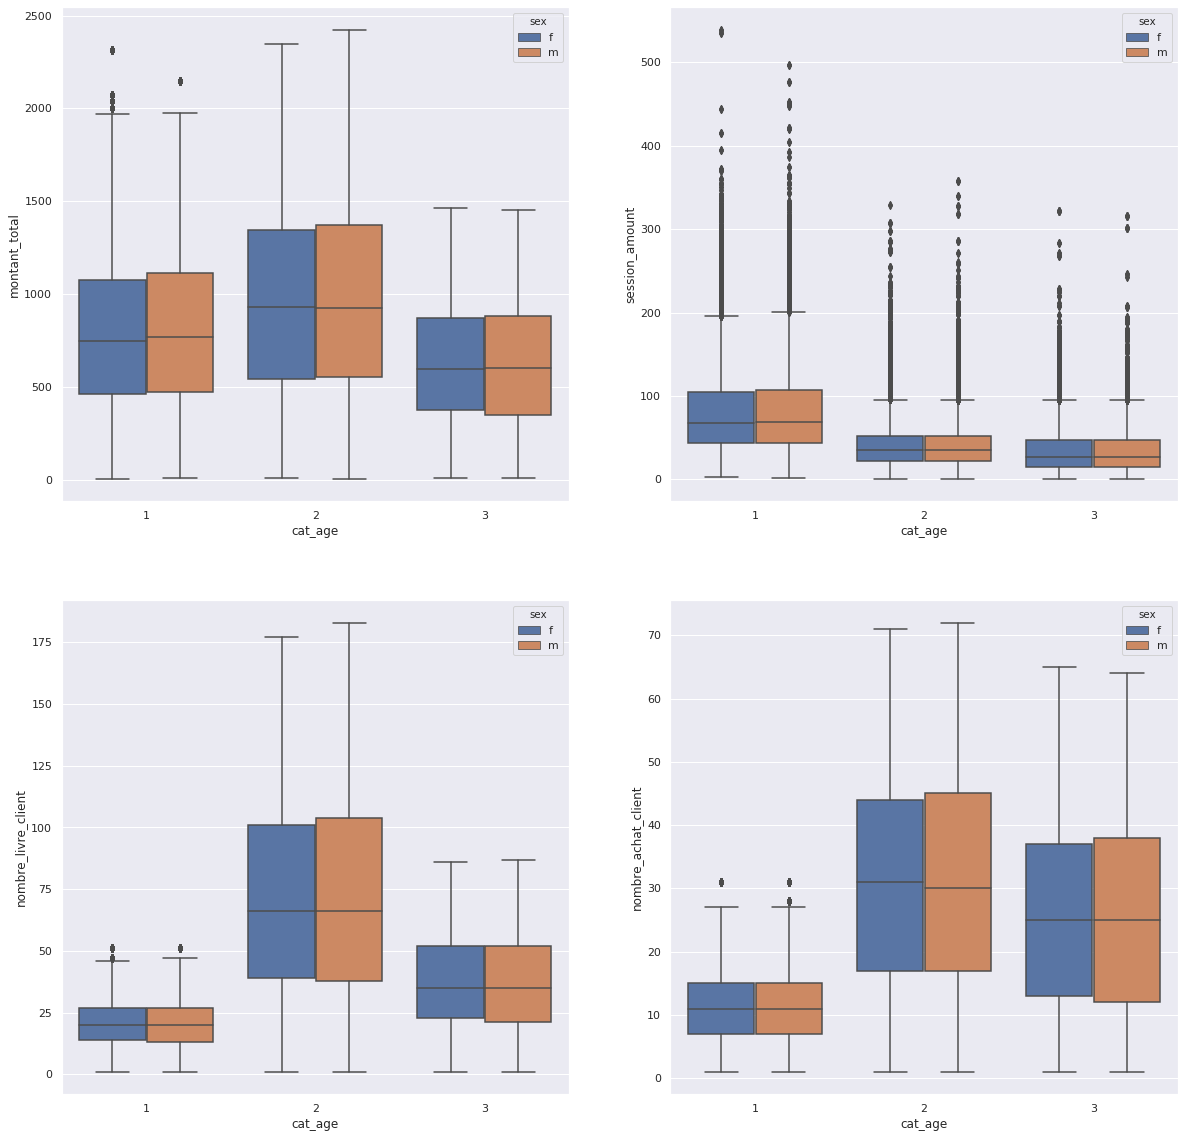

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='cat_age', y='montant_total',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[0, 0])
sns.boxplot(x='cat_age', y='session_amount',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[0, 1])
sns.boxplot(x='cat_age', y='nombre_livre_client',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[1, 0])
sns.boxplot(x='cat_age', y='nombre_achat_client',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[1, 1])

Nous constatons que la catégorie d'age intermédiaire, sans le Top 4 client, a une médiane la plus élevée pour les achats totaux, le nombre de livre acheté et le nombre de livre par client, alors que les moins de 30 ans ont une médiane pour le montant de panier plus élevée.

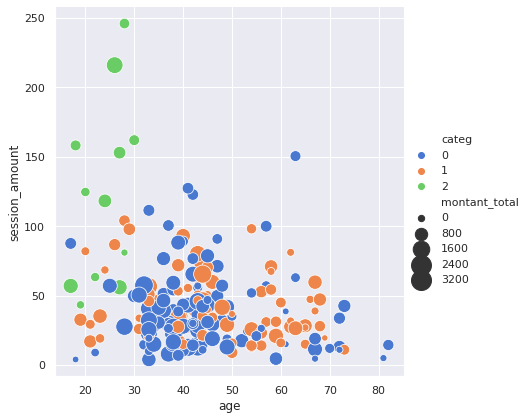

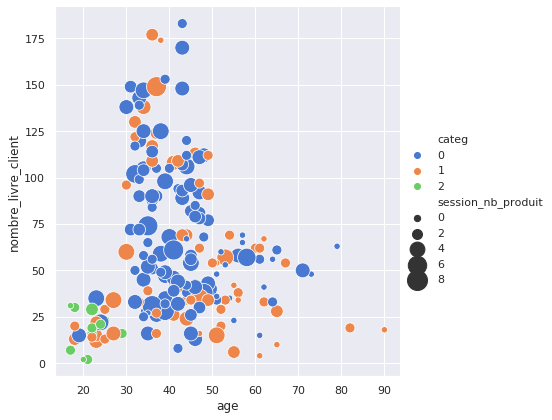

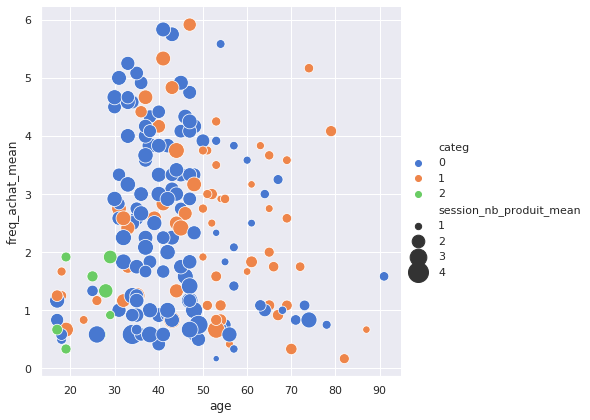

In [86]:
sns.relplot(x="age", y="session_amount", size="montant_total",
            sizes=(40, 400), alpha=1, hue='categ', palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200))
sns.relplot(x="age", y="nombre_livre_client", size="session_nb_produit",
            sizes=(40, 400), alpha=1, hue='categ', palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200))
sns.relplot(x="age", y="freq_achat_mean", size="session_nb_produit_mean",
            sizes=(40, 400), alpha=1, hue='categ', palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200))

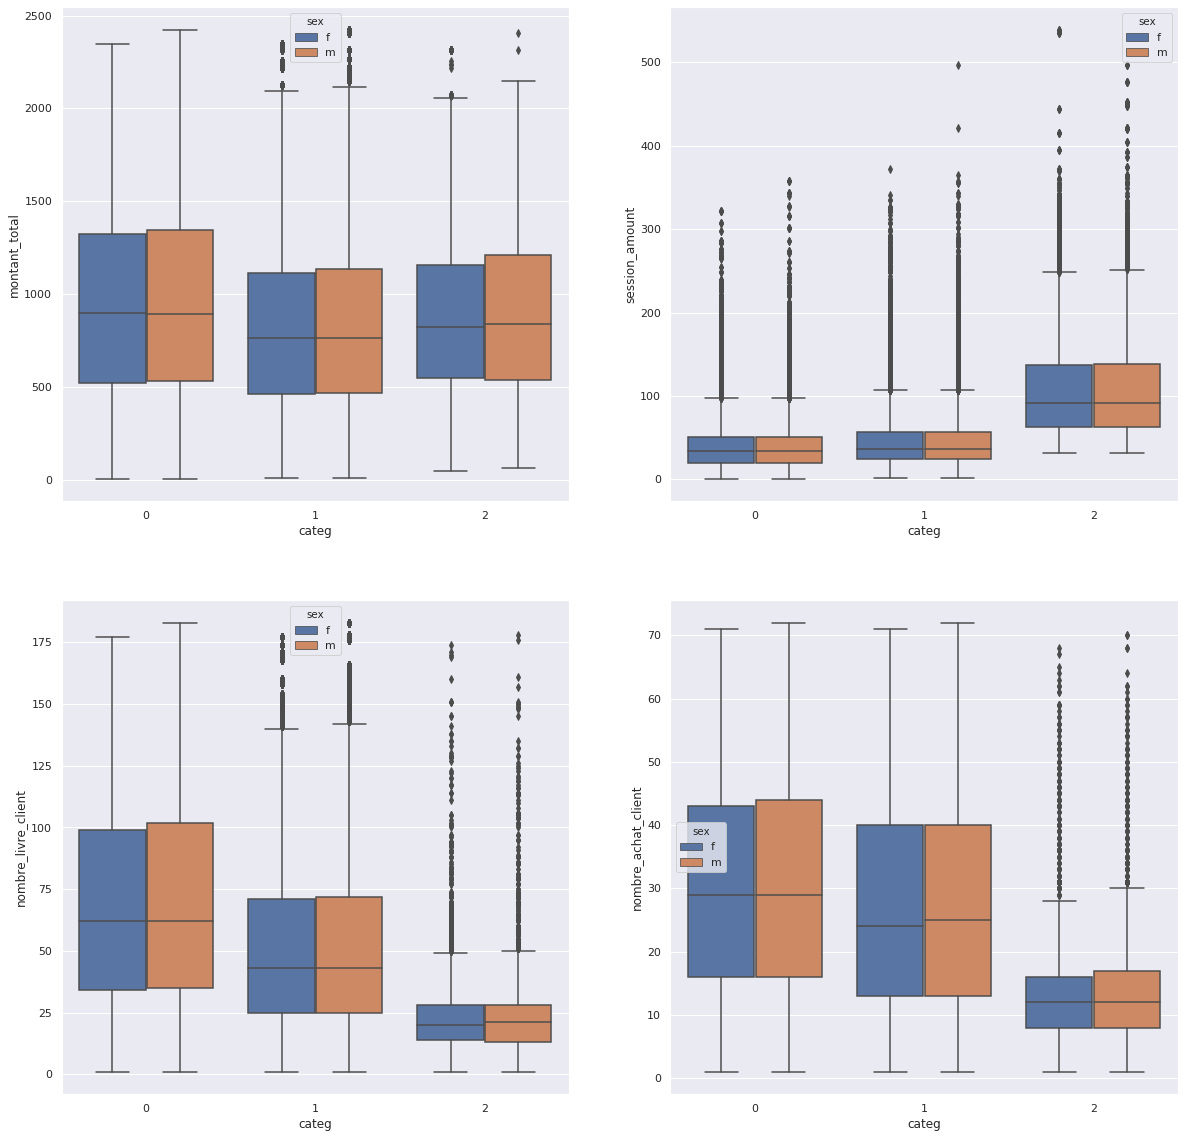

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='categ', y='montant_total',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[0, 0])
sns.boxplot(x='categ', y='session_amount',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[0, 1])
sns.boxplot(x='categ', y='nombre_livre_client',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[1, 0])
sns.boxplot(x='categ', y='nombre_achat_client',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[1, 1])

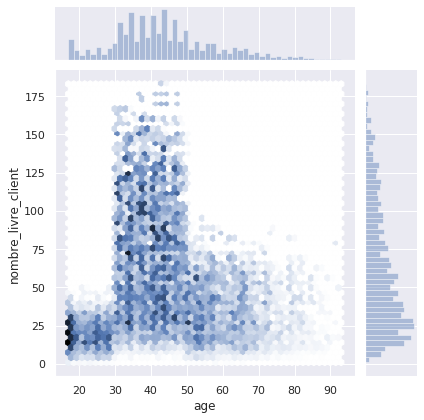

In [88]:
sns.jointplot(x='age', y='nombre_livre_client', kind="hex", data = df_transactions[(df_transactions['montant_total_rang'] > 4)])

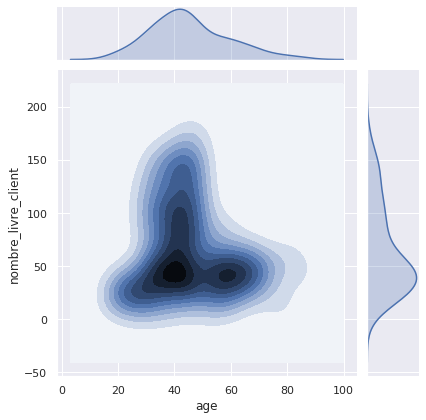

In [89]:
sns.jointplot(x="age", y="nombre_livre_client", data=df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200), kind="kde");

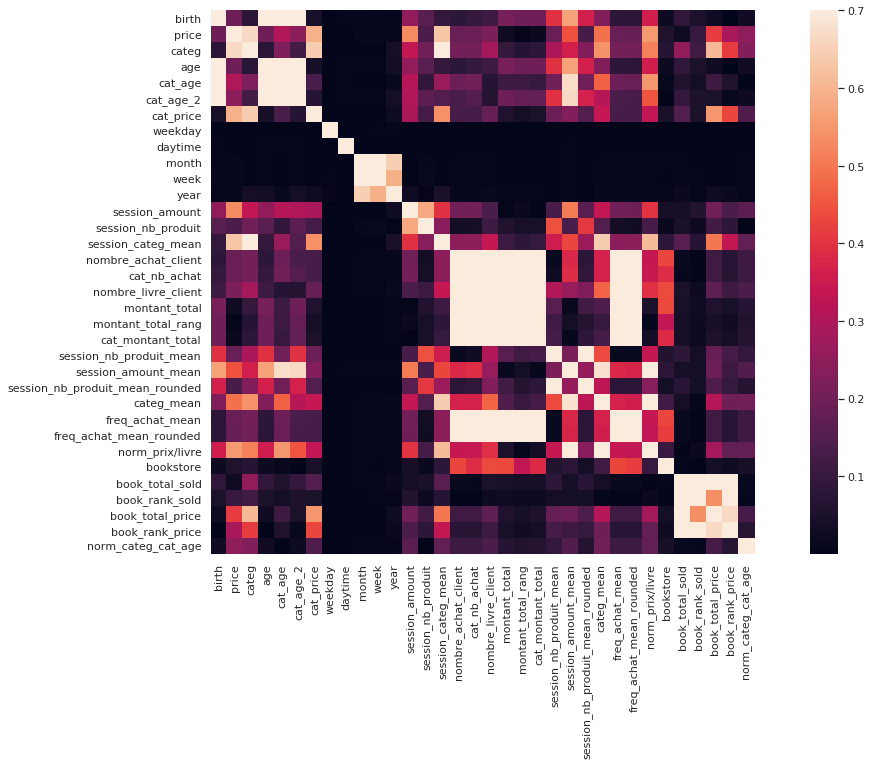

In [90]:
corrmat = np.abs(df_transactions[(df_transactions['montant_total_rang'] > 4)].corr())
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=0.7, square=True)

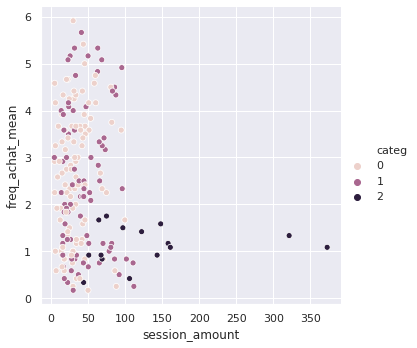

In [91]:
sns.relplot(x="session_amount", y="freq_achat_mean", hue = "categ", data = df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200))

In [92]:
df_transactions.columns

Index(['id_prod', 'date', 'session_id', 'client_id', 'sex', 'birth', 'price',
       'categ', 'age', 'cat_age', 'cat_age_2', 'cat_price', 'weekday',
       'daytime', 'month', 'week', 'year', 'session_amount',
       'session_nb_produit', 'session_categ_mean', 'nombre_achat_client',
       'cat_nb_achat', 'nombre_livre_client', 'montant_total',
       'montant_total_rang', 'cat_montant_total', 'session_nb_produit_mean',
       'session_amount_mean', 'session_nb_produit_mean_rounded', 'categ_mean',
       'freq_achat_mean', 'freq_achat_mean_rounded', 'norm_prix/livre',
       'bookstore', 'book_total_sold', 'book_rank_sold', 'book_total_price',
       'book_rank_price', 'norm_categ_cat_age'],
      dtype='object')

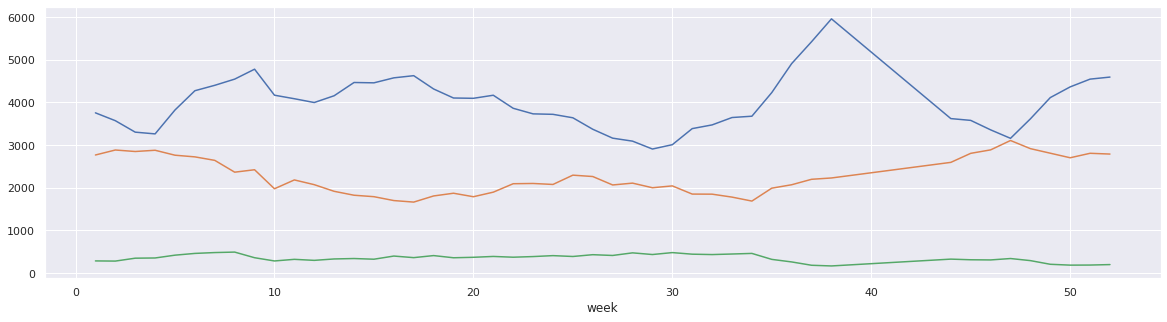

In [93]:
counter = (df_transactions.groupby(['categ', 'week'])['id_prod'].count())
counter_0 = counter.xs(0)
counter_1 = counter.xs(1)
counter_2 = counter.xs(2)

fig, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(x=counter_0.index, y=counter_0.values)
sns.lineplot(x=counter_1.index, y=counter_1.values)
sns.lineplot(x=counter_2.index, y=counter_2.values)


In [94]:
counter_0

week
1     3754
2     3570
3     3301
4     3260
5     3821
6     4273
7     4400
8     4545
9     4778
10    4168
11    4085
12    3996
13    4155
14    4466
15    4458
16    4575
17    4626
18    4314
19    4102
20    4095
21    4167
22    3861
23    3730
24    3719
25    3638
26    3369
27    3160
28    3090
29    2905
30    3007
31    3384
32    3471
33    3644
34    3675
35    4230
36    4910
37    5423
38    5959
44    3619
45    3577
46    3355
47    3156
48    3613
49    4112
50    4363
51    4545
52    4593
Name: id_prod, dtype: int64

In [95]:
df_transactions

id_prod                       date session_id client_id sex  birth  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450   f   1977   
1       0_1483 2021-12-27 11:11:12.123067   s_140787    c_5433   f   1981   
2       0_1483 2021-07-04 06:43:45.676567    s_57626    c_3679   f   1989   
3       0_1483 2021-09-19 08:45:43.735331    s_92165    c_1609   m   1980   
4       0_1483 2021-07-22 20:45:15.286364    s_65805    c_1609   m   1980   
...        ...                        ...        ...       ...  ..    ...   
310085    2_93 2022-01-13 07:55:08.588434   s_149109     c_497   m   1998   
310086  0_1920 2021-04-13 18:36:10.252971    s_20115    c_7088   m   1987   
310087  0_1920 2021-05-30 02:37:22.371278    s_41465    c_7748   f   1989   
310088    2_28 2021-05-11 01:31:34.932056    s_32812    c_7613   f   1993   
310089    2_98 2021-03-08 21:10:32.250919     s_3637    c_5967   f   2003   

         price  categ  age  cat_age  ...  categ_mean  freq_achat_mean  \
0         4.99      0   44        2  ...    0.333333         3.250000   
1         4.99      0   40        2  ...    0.305556         3.000000   
2         4.99      0   32        2  ...    0.240000         4.166667   
3         4.99      0   41        2  ...    0.267979       414.833333   
4         4.99      0   41        2  ...    0.267979       414.833333   
...        ...    ...  ...      ...  ...         ...              ...   
310085   78.99      2   24        1  ...    1.333333         0.500000   
310086   25.16      0   34        2  ...    0.240000         2.083333   
310087   25.16      0   32        2  ...    0.333333         1.250000   
310088  103.50      2   28        1  ...    1.363636         0.916667   
310089  149.74      2   18        1  ...    2.000000         0.166667   

        freq_achat_mean_rounded  norm_prix/livre  bookstore  book_total_sold  \
0                           3.0        12.255435          0              354   
1                           3.0        13.643023          0              354   
2                           4.0        12.181967          0              354   
3                         415.0        12.743842          1              354   
4                         415.0        12.743842          1              354   
...                         ...              ...        ...              ...   
310085                      0.0        34.486000          0                1   
310086                      2.0        14.232329          0                2   
310087                      1.0        14.990667          0                2   
310088                      1.0        48.621176          0                1   
310089                      0.0       106.285000          0                1   

        book_rank_sold  book_total_price  book_rank_price  norm_categ_cat_age  
0                257.5           1766.46            742.0            0.061403  
1                257.5           1766.46            742.0            0.061403  
2                257.5           1766.46            742.0            0.061403  
3                257.5           1766.46            742.0            0.061403  
4                257.5           1766.46            742.0            0.061403  
...                ...               ...              ...                 ...  
310085          3221.5             78.99           2626.0            0.675584  
310086          3126.0             50.32           2830.0            0.061403  
310087          3126.0             50.32           2830.0            0.061403  
310088          3221.5            103.50           2473.0            0.675584  
310089          3221.5            149.74           2206.0            0.675584  

[310090 rows x 39 columns]

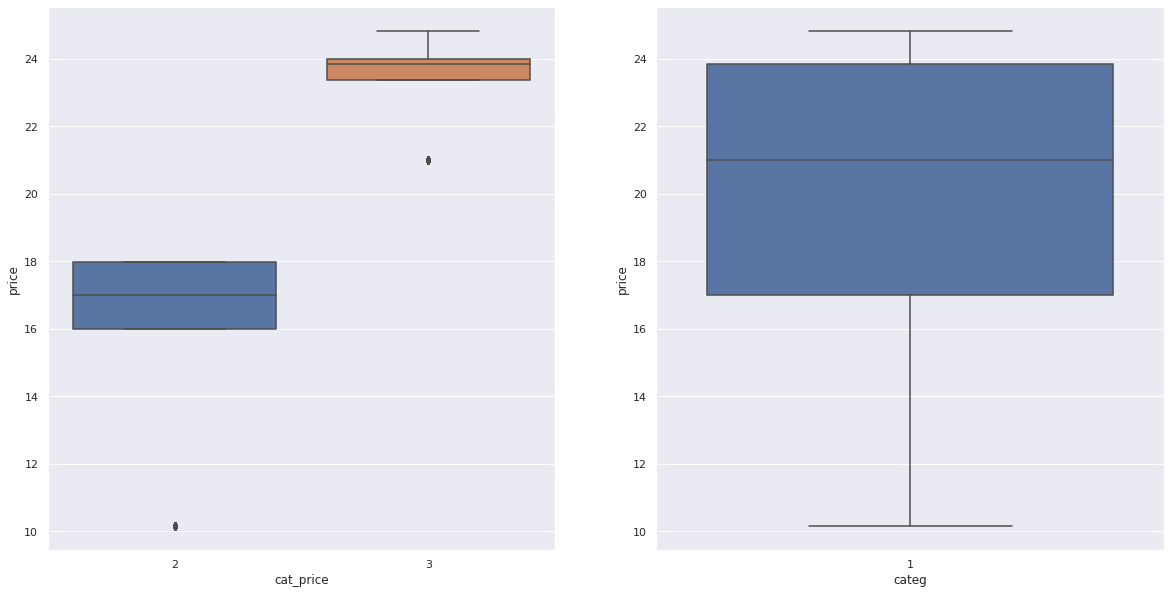

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x=df_transactions_best_product['cat_price'], y=df_transactions_best_product['price'],data=df_transactions_best_product, ax=axes[0])
sns.boxplot(x=df_transactions_best_product['categ'], y=df_transactions_best_product['price'],data=df_transactions_best_product, ax=axes[1])

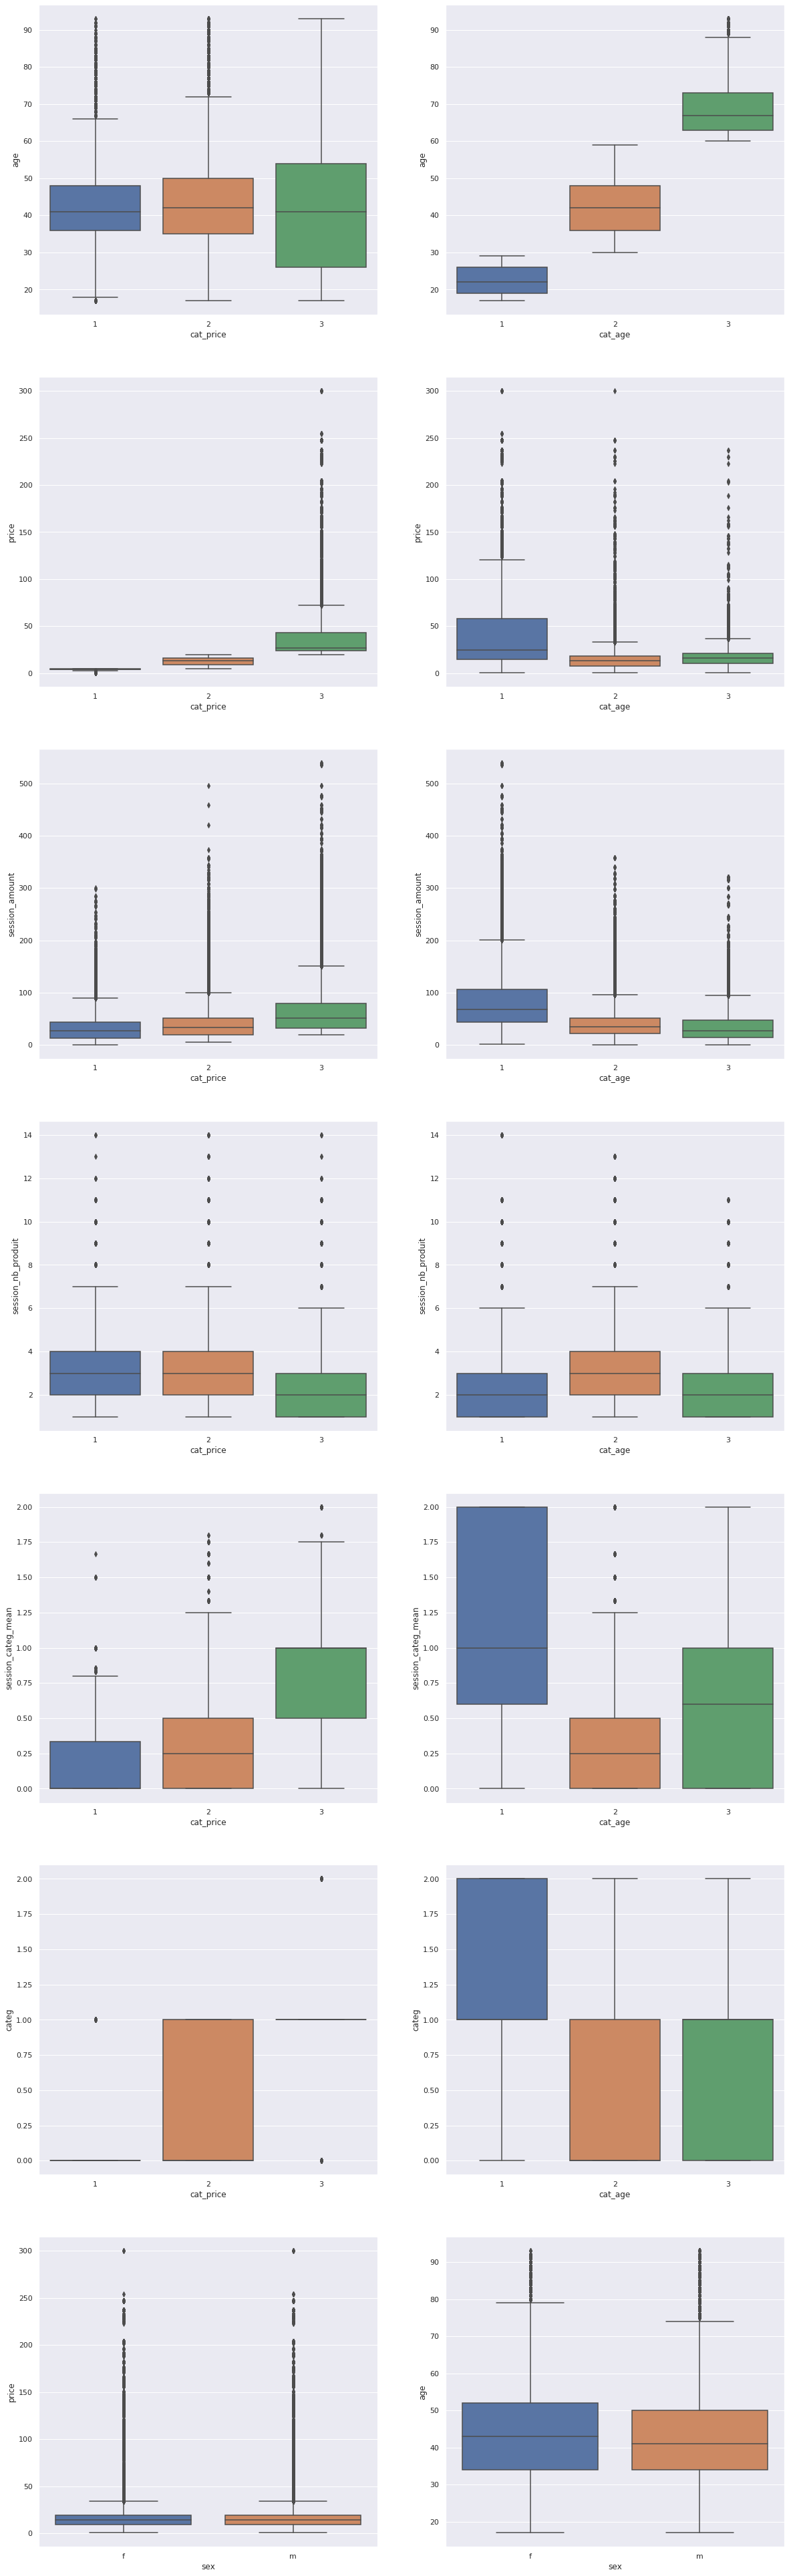

In [97]:
fig, axes = plt.subplots(7, 2, figsize=(20, 70))
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['age'],data=df_transactions, ax=axes[0, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['age'],data=df_transactions, ax=axes[0, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['price'],data=df_transactions, ax=axes[1, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['price'],data=df_transactions, ax=axes[1, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['session_amount'],data=df_transactions, ax=axes[2, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['session_amount'],data=df_transactions, ax=axes[2, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['session_nb_produit'],data=df_transactions, ax=axes[3, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['session_nb_produit'],data=df_transactions, ax=axes[3, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['session_categ_mean'],data=df_transactions, ax=axes[4, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['session_categ_mean'],data=df_transactions, ax=axes[4, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['categ'],data=df_transactions, ax=axes[5, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['categ'],data=df_transactions, ax=axes[5, 1])
sns.boxplot(x=df_transactions['sex'], y=df_transactions['price'],data=df_transactions, ax=axes[6, 0])
sns.boxplot(x=df_transactions['sex'], y=df_transactions['age'],data=df_transactions, ax=axes[6, 1])

In [98]:
df_transactions

id_prod                       date session_id client_id sex  birth  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450   f   1977   
1       0_1483 2021-12-27 11:11:12.123067   s_140787    c_5433   f   1981   
2       0_1483 2021-07-04 06:43:45.676567    s_57626    c_3679   f   1989   
3       0_1483 2021-09-19 08:45:43.735331    s_92165    c_1609   m   1980   
4       0_1483 2021-07-22 20:45:15.286364    s_65805    c_1609   m   1980   
...        ...                        ...        ...       ...  ..    ...   
310085    2_93 2022-01-13 07:55:08.588434   s_149109     c_497   m   1998   
310086  0_1920 2021-04-13 18:36:10.252971    s_20115    c_7088   m   1987   
310087  0_1920 2021-05-30 02:37:22.371278    s_41465    c_7748   f   1989   
310088    2_28 2021-05-11 01:31:34.932056    s_32812    c_7613   f   1993   
310089    2_98 2021-03-08 21:10:32.250919     s_3637    c_5967   f   2003   

         price  categ  age  cat_age  ...  categ_mean  freq_achat_mean  \
0         4.99      0   44        2  ...    0.333333         3.250000   
1         4.99      0   40        2  ...    0.305556         3.000000   
2         4.99      0   32        2  ...    0.240000         4.166667   
3         4.99      0   41        2  ...    0.267979       414.833333   
4         4.99      0   41        2  ...    0.267979       414.833333   
...        ...    ...  ...      ...  ...         ...              ...   
310085   78.99      2   24        1  ...    1.333333         0.500000   
310086   25.16      0   34        2  ...    0.240000         2.083333   
310087   25.16      0   32        2  ...    0.333333         1.250000   
310088  103.50      2   28        1  ...    1.363636         0.916667   
310089  149.74      2   18        1  ...    2.000000         0.166667   

        freq_achat_mean_rounded  norm_prix/livre  bookstore  book_total_sold  \
0                           3.0        12.255435          0              354   
1                           3.0        13.643023          0              354   
2                           4.0        12.181967          0              354   
3                         415.0        12.743842          1              354   
4                         415.0        12.743842          1              354   
...                         ...              ...        ...              ...   
310085                      0.0        34.486000          0                1   
310086                      2.0        14.232329          0                2   
310087                      1.0        14.990667          0                2   
310088                      1.0        48.621176          0                1   
310089                      0.0       106.285000          0                1   

        book_rank_sold  book_total_price  book_rank_price  norm_categ_cat_age  
0                257.5           1766.46            742.0            0.061403  
1                257.5           1766.46            742.0            0.061403  
2                257.5           1766.46            742.0            0.061403  
3                257.5           1766.46            742.0            0.061403  
4                257.5           1766.46            742.0            0.061403  
...                ...               ...              ...                 ...  
310085          3221.5             78.99           2626.0            0.675584  
310086          3126.0             50.32           2830.0            0.061403  
310087          3126.0             50.32           2830.0            0.061403  
310088          3221.5            103.50           2473.0            0.675584  
310089          3221.5            149.74           2206.0            0.675584  

[310090 rows x 39 columns]

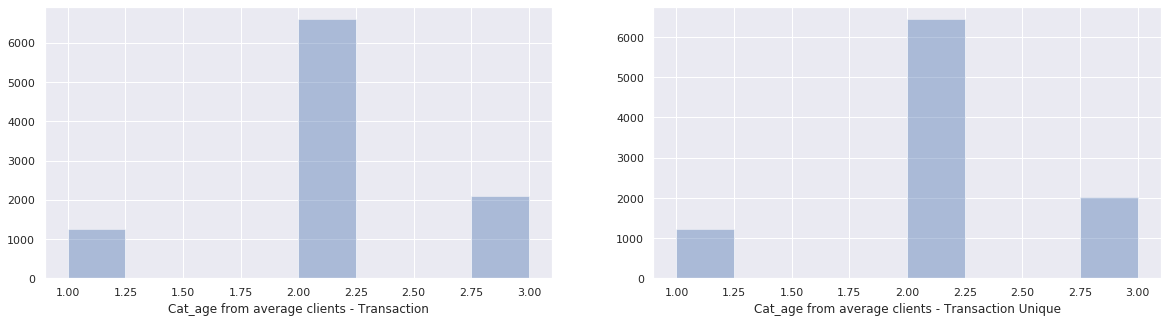

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(df_transactions_best_product['cat_age'], axlabel='Cat_age from average clients - Transaction', kde=False, bins=8, ax=axes[0])
sns.distplot(df_transactions_best_product.drop_duplicates('session_id')['cat_age'], axlabel='Cat_age from average clients - Transaction Unique', kde=False, bins=8, ax=axes[1])

In [100]:
df_transactions.drop_duplicates('session_id').groupby('cat_age').mean()['nombre_achat_client']

cat_age
1    163.863858
2    331.404130
3     27.080238
Name: nombre_achat_client, dtype: float64

In [101]:
df_transactions[df_transactions['client_id'] == 'c_1609']

id_prod                       date session_id client_id sex  birth  \
3       0_1483 2021-09-19 08:45:43.735331    s_92165    c_1609   m   1980   
4       0_1483 2021-07-22 20:45:15.286364    s_65805    c_1609   m   1980   
5       0_1483 2021-05-08 06:20:05.395325    s_31519    c_1609   m   1980   
6       0_1483 2021-04-17 06:01:35.017859    s_21725    c_1609   m   1980   
7       0_1483 2021-06-06 13:42:00.282408    s_44891    c_1609   m   1980   
...        ...                        ...        ...       ...  ..    ...   
291303   0_793 2021-09-04 18:29:16.065113    s_85062    c_1609   m   1980   
291314   1_725 2021-09-22 22:22:12.619872    s_93931    c_1609   m   1980   
291357   0_728 2021-05-19 23:50:05.092047    s_36827    c_1609   m   1980   
291362   1_132 2021-07-23 10:26:51.125918    s_66067    c_1609   m   1980   
291412   0_479 2021-11-23 06:41:59.849027   s_123736    c_1609   m   1980   

        price  categ  age  cat_age  ...  categ_mean  freq_achat_mean  \
3        4.99      0   41        2  ...    0.267979       414.833333   
4        4.99      0   41        2  ...    0.267979       414.833333   
5        4.99      0   41        2  ...    0.267979       414.833333   
6        4.99      0   41        2  ...    0.267979       414.833333   
7        4.99      0   41        2  ...    0.267979       414.833333   
...       ...    ...  ...      ...  ...         ...              ...   
291303   9.99      0   41        2  ...    0.267979       414.833333   
291314   8.99      1   41        2  ...    0.267979       414.833333   
291357  30.58      0   41        2  ...    0.267979       414.833333   
291362  14.41      1   41        2  ...    0.267979       414.833333   
291412  10.99      0   41        2  ...    0.267979       414.833333   

        freq_achat_mean_rounded  norm_prix/livre  bookstore  book_total_sold  \
3                         415.0        12.743842          1              354   
4                         415.0        12.743842          1              354   
5                         415.0        12.743842          1              354   
6                         415.0        12.743842          1              354   
7                         415.0        12.743842          1              354   
...                         ...              ...        ...              ...   
291303                    415.0        12.743842          1               11   
291314                    415.0        12.743842          1               43   
291357                    415.0        12.743842          1                5   
291362                    415.0        12.743842          1               50   
291412                    415.0        12.743842          1               22   

        book_rank_sold  book_total_price  book_rank_price  norm_categ_cat_age  
3                257.5           1766.46            742.0            0.061403  
4                257.5           1766.46            742.0            0.061403  
5                257.5           1766.46            742.0            0.061403  
6                257.5           1766.46            742.0            0.061403  
7                257.5           1766.46            742.0            0.061403  
...                ...               ...              ...                 ...  
291303          2183.5            109.89           2427.0            0.061403  
291314          1335.0            386.57           1603.0            0.141651  
291357          2722.0            152.90           2185.0            0.061403  
291362          1236.0            720.50           1257.0            0.141651  
291412          1725.0            241.78           1891.0            0.061403  

[11641 rows x 39 columns]

In [102]:
df_transactions_best_product[df_transactions_best_product['client_id'] == 'c_1609']

id_prod                       date session_id client_id sex  birth  \
2079     1_407 2021-12-12 03:17:12.469234   s_133074    c_1609   m   1980   
2080     1_407 2021-12-25 06:52:16.919924   s_139670    c_1609   m   1980   
2081     1_407 2021-09-22 16:02:09.863450    s_93814    c_1609   m   1980   
2082     1_407 2022-01-09 22:02:51.738637   s_147475    c_1609   m   1980   
2083     1_407 2021-05-29 16:11:19.011667    s_41258    c_1609   m   1980   
...        ...                        ...        ...       ...  ..    ...   
143545   1_425 2021-12-23 14:43:18.602269   s_138807    c_1609   m   1980   
143546   1_425 2021-06-18 01:43:56.894257    s_50130    c_1609   m   1980   
143547   1_425 2022-01-11 12:12:47.830947   s_148232    c_1609   m   1980   
143548   1_425 2021-03-18 11:46:41.408098     s_8025    c_1609   m   1980   
143549   1_425 2021-05-08 05:07:20.027852    s_31495    c_1609   m   1980   

        price  categ  age  cat_age  cat_age_2  cat_price  weekday  daytime  \
2079    15.99      1   41        2          2          2        6        3   
2080    15.99      1   41        2          2          2        5        6   
2081    15.99      1   41        2          2          2        2       16   
2082    15.99      1   42        2          2          2        6       22   
2083    15.99      1   41        2          2          2        5       16   
...       ...    ...  ...      ...        ...        ...      ...      ...   
143545  16.99      1   41        2          2          2        3       14   
143546  16.99      1   41        2          2          2        4        1   
143547  16.99      1   42        2          2          2        1       12   
143548  16.99      1   41        2          2          2        3       11   
143549  16.99      1   41        2          2          2        5        5   

        month  week  year  
2079       12    49  2021  
2080       12    51  2021  
2081        9    38  2021  
2082        1     1  2022  
2083        5    21  2021  
...       ...   ...   ...  
143545     12    51  2021  
143546      6    24  2021  
143547      1     2  2022  
143548      3    11  2021  
143549      5    18  2021  

[225 rows x 17 columns]